In [1]:
# regex
import re

#time
import pytz as tz
from datetime import datetime

#data explore
import numpy as np

import pandas as pd

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

#defaults
plt.rcParams['figure.figsize'] = (20.0, 20.0)
plt.rcParams.update({'font.size': 10})
plt.rcParams['xtick.major.pad']='5'
plt.rcParams['ytick.major.pad']='5'

plt.style.use('ggplot')

In [3]:
df = pd.read_csv('C:\\Users\\marcp\\OneDrive\\Documents\\DataCup\\Dataframes\\DataFrame_Final2.csv')
df_predict = pd.read_csv('C:\\Users\\marcp\\OneDrive\\Documents\\DataCup\\Dataframes\\DataFrameTest.csv')

#df = pd.read_csv('DataFrame_Final2.csv')
#df_predict = pd.read_csv('DataFrameTest.csv')

In [4]:
print("Explanatory variables:  {}".format(len(df.columns)-1))
print("Number of Observations: {}".format(df.shape[0]))

df['Default'] = df['Default'].astype('category')

# create a 'target' column for our own convenience
print("Target variable: '{}' -> '{}'".format('default payment next year', 'Default'))

Explanatory variables:  54
Number of Observations: 11900
Target variable: 'default payment next year' -> 'Default'


In [5]:
pattern = re.compile("^DelqCycle_month_[0-9]+$")
pay_status_columns = [ x for x in df.columns if (pattern.match(x))]

df[pay_status_columns].head()

,DelqCycle_month_1,DelqCycle_month_2,DelqCycle_month_3,DelqCycle_month_4,DelqCycle_month_5,DelqCycle_month_6,DelqCycle_month_7,DelqCycle_month_8,DelqCycle_month_9,DelqCycle_month_10,DelqCycle_month_11,DelqCycle_month_12,DelqCycle_month_13
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,2,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0


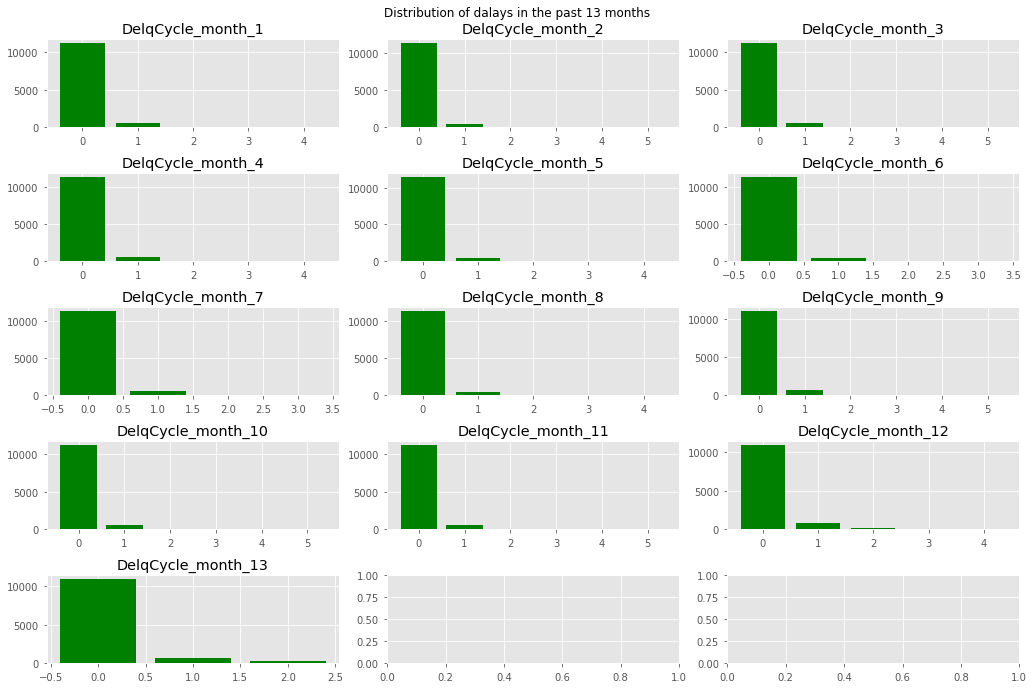

In [6]:
# pay status columns
pattern = re.compile("^DelqCycle_month_[0-9]+$")
pay_status_columns = [ x for x in df.columns if (pattern.match(x))]

fig, ax = plt.subplots(5,3)
fig.set_size_inches(15,10)
fig.suptitle('Distribution of dalays in the past 13 months')

for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d  = df[pay_status_columns[i]].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='g')
    ax[row,col].set_title(pay_status_columns[i])

plt.tight_layout(pad=3.0, w_pad=0.5, h_pad=1.0)
plt.show()

In [7]:
# bill columns
pattern = re.compile("^CurrentTotalBalance_month_[0-9]+$")
bill_columns = [ x for x in df.columns if (pattern.match(x))]
df[bill_columns].describe()

,CurrentTotalBalance_month_1,CurrentTotalBalance_month_2,CurrentTotalBalance_month_3,CurrentTotalBalance_month_4,CurrentTotalBalance_month_5,CurrentTotalBalance_month_6,CurrentTotalBalance_month_7,CurrentTotalBalance_month_8,CurrentTotalBalance_month_9,CurrentTotalBalance_month_10,CurrentTotalBalance_month_11,CurrentTotalBalance_month_12,CurrentTotalBalance_month_13
count,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000
mean,2453.702857,2450.690000,2388.149778,2441.601539,2484.910157,2551.082613,2626.718535,2661.433488,2677.986791,2787.199703,2791.954050,2838.772817,2945.579359
std,3727.227175,3775.163162,3764.768217,3815.424821,3817.706691,3879.083346,3962.154382,4024.767464,4094.999281,4134.062853,4207.712405,4263.837379,4332.793996
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,341.367500,320.035000,301.997500,320.120000,333.900000,362.677500,385.960000,386.867500,381.397500,420.675000,407.880000,406.985000,447.015000
50%,1006.985000,988.000000,892.350000,932.840000,1003.830000,1043.900000,1085.755000,1078.980000,1076.250000,1173.790000,1124.845000,1150.090000,1251.120000
75%,2866.060000,2844.180000,2689.597500,2766.450000,2874.647500,2955.117500,3031.367500,3088.840000,3067.807500,3209.595000,3209.745000,3279.850000,3421.665000
max,60238.860000,60122.140000,53568.360000,59245.590000,56904.740000,57308.160000,61218.360000,62879.200000,59398.560000,53433.540000,52767.930000,58537.560000,57351.430000


In [8]:
# pay status columns
pattern = re.compile("^TRANSACTION_AMT_month_[0-9]+$")
pay_amount_columns = [ x for x in df.columns if (pattern.match(x))]
df[pay_amount_columns].describe()

,TRANSACTION_AMT_month_1,TRANSACTION_AMT_month_2,TRANSACTION_AMT_month_3,TRANSACTION_AMT_month_4,TRANSACTION_AMT_month_5,TRANSACTION_AMT_month_6,TRANSACTION_AMT_month_7,TRANSACTION_AMT_month_8,TRANSACTION_AMT_month_9,TRANSACTION_AMT_month_10,TRANSACTION_AMT_month_11,TRANSACTION_AMT_month_12,TRANSACTION_AMT_month_13
count,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000
mean,49.096527,1108.607426,945.299311,1051.483387,1092.411270,1139.077190,1120.780929,1185.926696,1110.893351,1043.371548,1125.944572,1088.214398,1105.821534
std,383.212228,1770.095193,1696.052824,1747.289992,1811.853025,1799.518515,1913.736010,1931.344952,2026.415532,1903.745721,1991.467925,1812.943638,1880.936562
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,235.272500,171.150000,217.217500,214.000000,239.997500,212.220000,257.437500,230.557500,200.000000,228.237500,214.000000,204.000000
50%,0.000000,622.595000,505.000000,561.560000,606.000000,634.290000,604.565000,657.730000,612.380000,554.365000,612.530000,599.120000,595.400000
75%,0.000000,1335.045000,1112.000000,1260.175000,1320.760000,1413.660000,1353.825000,1428.310000,1341.197500,1256.000000,1358.647500,1324.985000,1358.000000
max,19943.000000,54320.000000,46293.400000,51857.000000,49347.650000,51456.690000,60349.720000,63990.260000,118084.860000,92180.000000,75560.000000,54407.140000,68565.250000


In [9]:
df[pay_amount_columns].head(10)

,TRANSACTION_AMT_month_1,TRANSACTION_AMT_month_2,TRANSACTION_AMT_month_3,TRANSACTION_AMT_month_4,TRANSACTION_AMT_month_5,TRANSACTION_AMT_month_6,TRANSACTION_AMT_month_7,TRANSACTION_AMT_month_8,TRANSACTION_AMT_month_9,TRANSACTION_AMT_month_10,TRANSACTION_AMT_month_11,TRANSACTION_AMT_month_12,TRANSACTION_AMT_month_13
0,0.0,262.50,303.00,200.00,288.80,176.80,303.00,618.00,267.50,226.60,244.80,250.00,273.00
1,0.0,494.60,0.00,0.00,1076.25,454.50,412.00,884.00,252.50,393.90,476.89,0.00,0.00
2,0.0,429.07,144.45,742.64,970.78,792.38,371.28,257.25,185.64,433.63,317.10,1311.69,831.10
3,0.0,1074.75,463.05,2123.44,1137.76,640.56,0.00,2132.52,0.00,1899.86,159.67,605.54,971.70
4,0.0,1129.00,0.00,894.40,2307.54,0.00,1168.12,1416.78,3281.55,0.00,1238.00,1723.28,1165.84
5,0.0,1849.60,1410.79,493.00,953.32,95.17,430.29,609.15,551.38,1599.93,430.22,1836.04,1889.59
6,0.0,202.00,262.75,2905.05,540.57,652.00,208.00,2259.10,668.50,1155.00,1973.90,321.00,310.00
7,0.0,0.00,1472.00,1024.59,1769.54,0.00,599.96,714.48,895.59,395.90,1173.79,651.00,1416.45
8,0.0,204.00,206.00,204.00,312.00,2040.00,400.00,500.00,420.00,782.25,343.74,0.00,1203.09
9,0.0,360.00,342.39,437.58,388.41,506.94,348.74,508.20,802.70,0.00,552.30,204.00,227.85


In [10]:
# pay status columns
pattern = re.compile("^CashBalance_month_[0-9]+$")
pay_amount_columns = [ x for x in df.columns if (pattern.match(x))]
df[pay_amount_columns].describe()

,CashBalance_month_1,CashBalance_month_2,CashBalance_month_3,CashBalance_month_4,CashBalance_month_5,CashBalance_month_6,CashBalance_month_7,CashBalance_month_8,CashBalance_month_9,CashBalance_month_10,CashBalance_month_11,CashBalance_month_12,CashBalance_month_13
count,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000
mean,88.278865,90.969730,93.382460,97.103634,95.422595,93.761534,98.501786,98.460611,107.745553,115.916637,118.464271,121.212502,124.735218
std,467.012758,475.114842,495.055449,504.568718,514.730228,495.563022,497.795561,506.371634,550.858261,594.802569,615.328495,642.692908,683.630438
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11335.150000,11307.920000,11082.240000,10703.760000,12611.870000,10795.050000,12291.700000,14471.760000,16992.560000,16640.000000,16044.000000,15148.640000,15983.400000


In [11]:
df[pay_amount_columns].head()

,CashBalance_month_1,CashBalance_month_2,CashBalance_month_3,CashBalance_month_4,CashBalance_month_5,CashBalance_month_6,CashBalance_month_7,CashBalance_month_8,CashBalance_month_9,CashBalance_month_10,CashBalance_month_11,CashBalance_month_12,CashBalance_month_13
0,0.0,350.00,1148.45,2567.25,3307.33,4293.12,5224.44,5127.54,4753.35,4616.46,4786.08,4818.48,4791.44
1,0.0,236.08,0.00,0.00,1.01,0.00,0.00,0.00,0.00,0.00,0.00,20.00,0.00
2,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [12]:
df['CreditLimit'].describe()

count    11900.000000
mean      7347.699244
std       6610.368903
min        300.000000
25%       2100.000000
50%       5300.000000
75%      10300.000000
max      80200.000000
Name: CreditLimit, dtype: float64

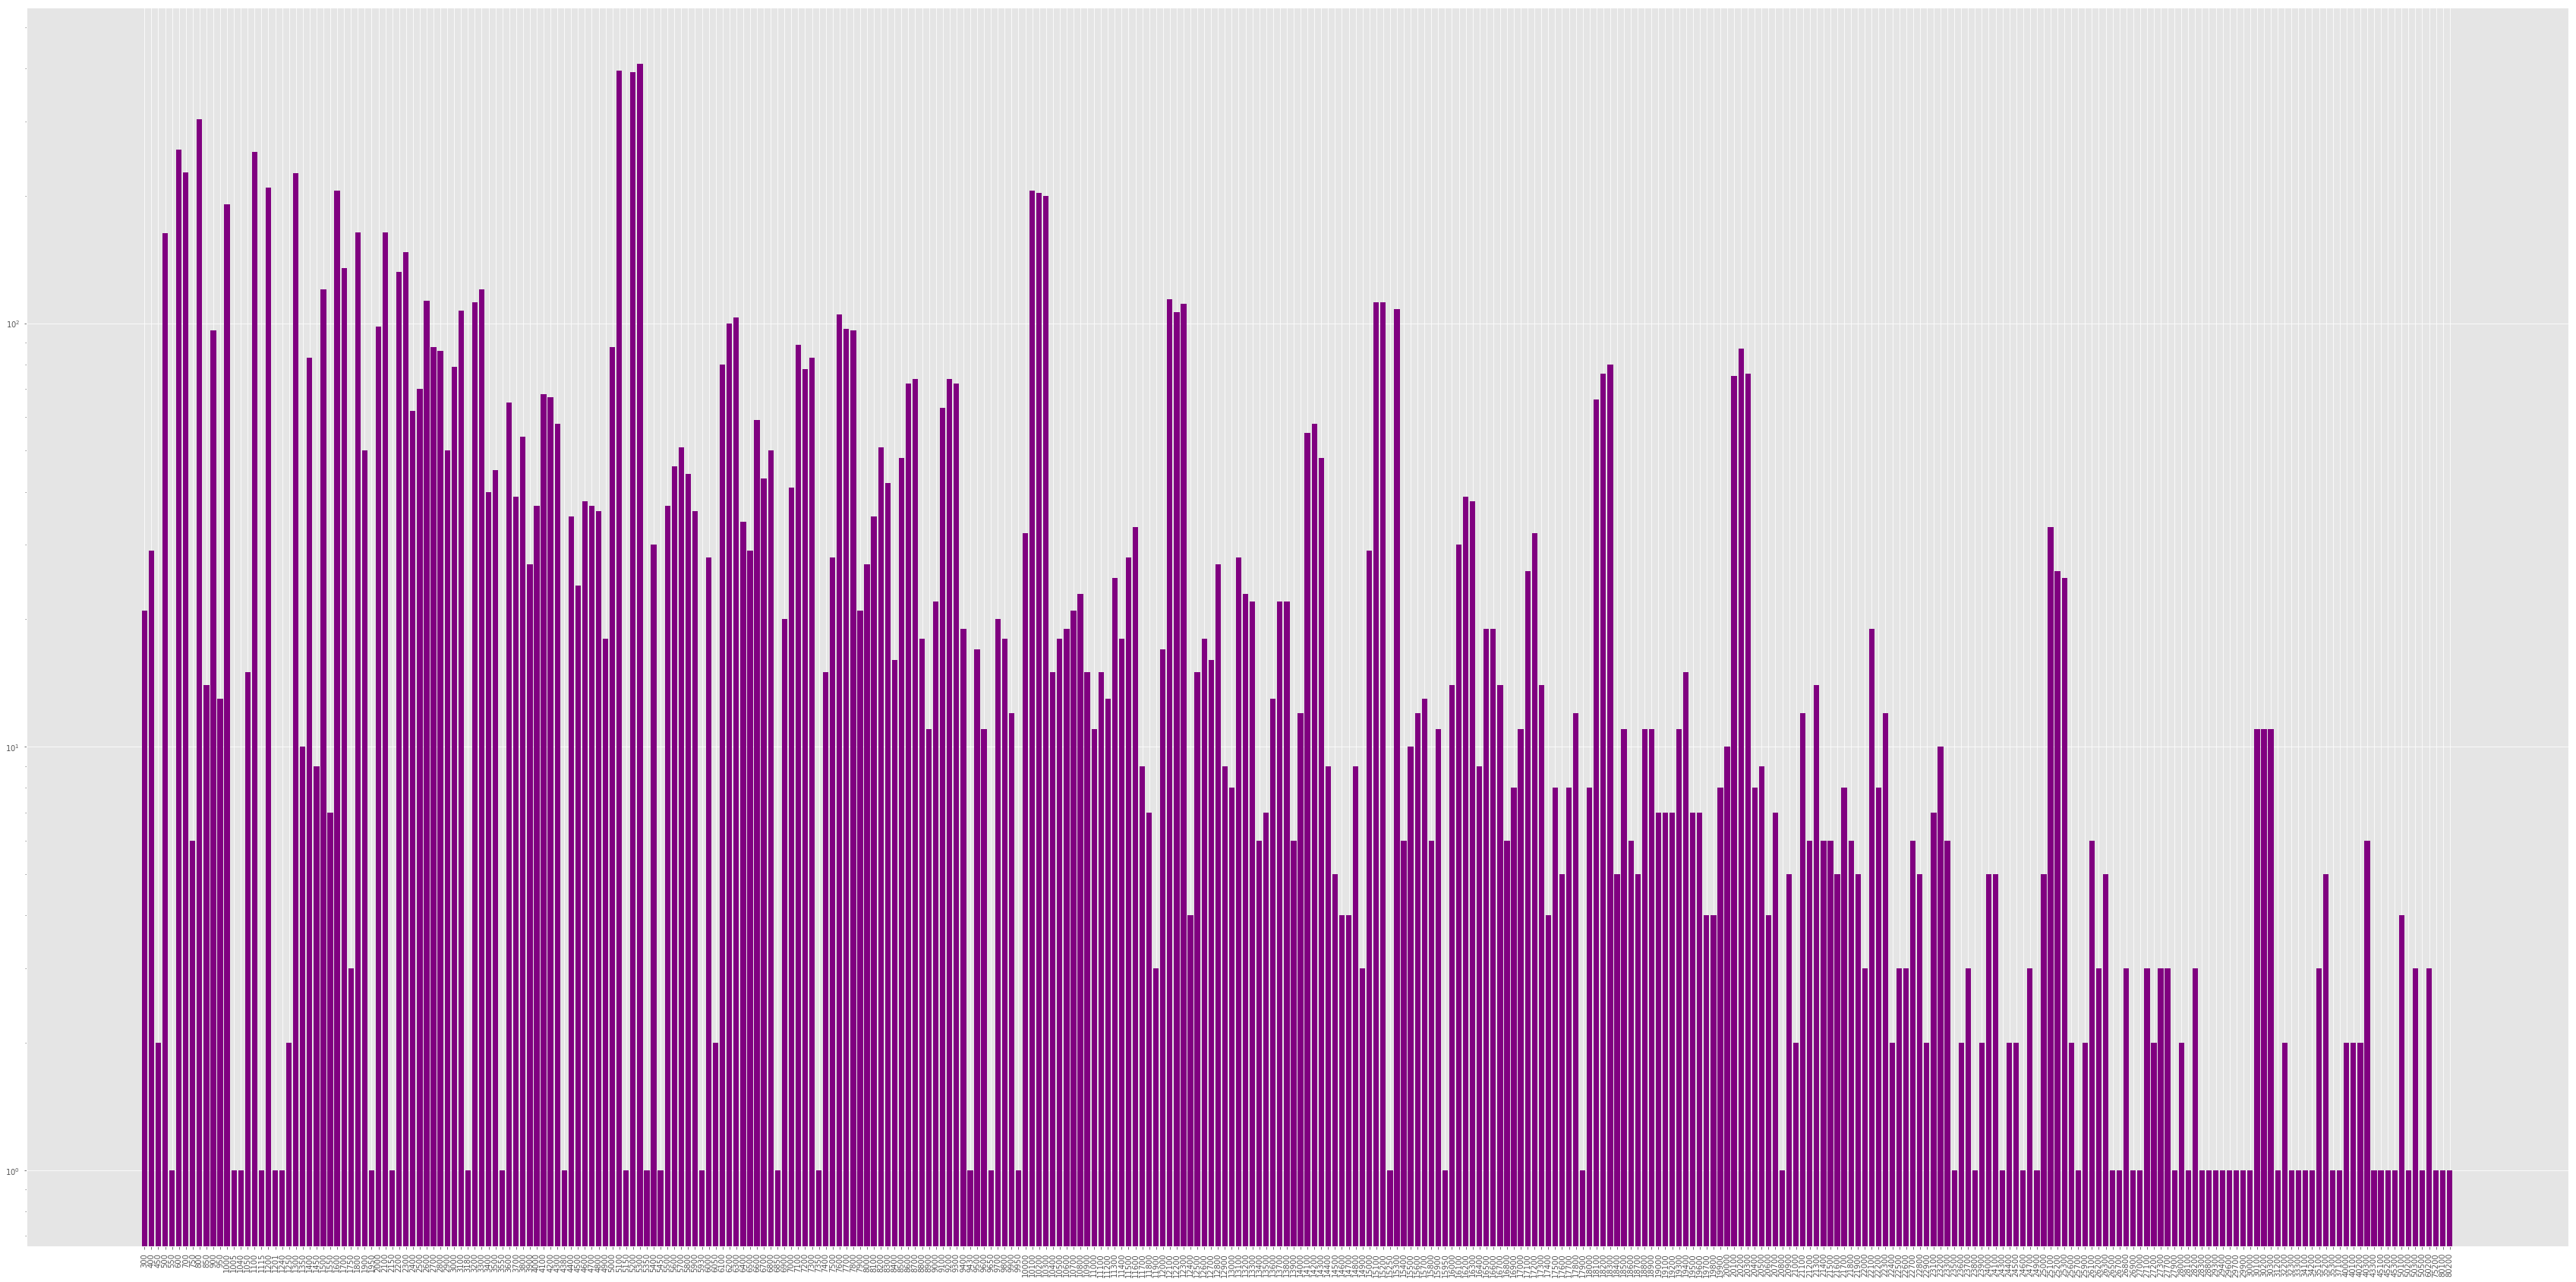

In [13]:
fig = plt.figure()
fig.set_size_inches(60,30)
ax = fig.add_subplot(111)
fbins = [0,10000,20000,30000,40000,50000,60000,70000,80000,90000,10000]

d = df.groupby(['CreditLimit']).size()
ax.set_yscale("log")
ax.set_xticks(np.arange(len(d)))
ax.set_xticklabels(['%d' % i for i in d.index], rotation='vertical')
p = ax.bar(np.arange(len(d)), d, color='purple')

defaulting accounts are 19.33613445378151% out of 11900 observations


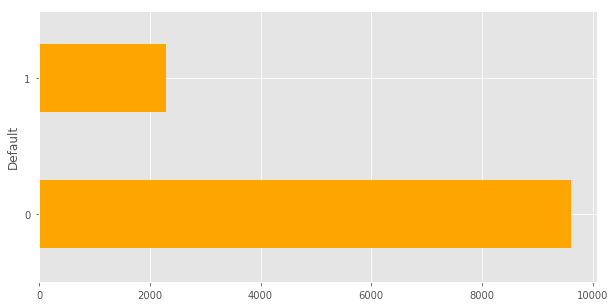

In [14]:
fig = plt.figure()
fig.set_size_inches(10,5)
d = df.groupby(['Default']).size()

print("defaulting accounts are {}% out of {} observations".format(100* d[1]/(d[1]+d[0]), d[1]+d[0]))
p = d.plot(kind='barh', color='orange')

In [15]:
# help func
def selcols(prefix, a=1, b=13):
    return [prefix+str(i) for i in np.arange(a,b+1)]

In [16]:
from math import log

# average and standard deviation payment status
df['DelqCycle_avg'] = df[selcols('DelqCycle_month_')].mean(axis=1)
df['DelqCycle_std'] = df[selcols('DelqCycle_month_')].std(axis=1)
df.head()

,ID_CPTE,CreditLimit,Default,CurrentTotalBalance_month_1,CurrentTotalBalance_month_2,CurrentTotalBalance_month_3,CurrentTotalBalance_month_4,CurrentTotalBalance_month_5,CurrentTotalBalance_month_6,CurrentTotalBalance_month_7,...,TRANSACTION_AMT_month_6,TRANSACTION_AMT_month_7,TRANSACTION_AMT_month_8,TRANSACTION_AMT_month_9,TRANSACTION_AMT_month_10,TRANSACTION_AMT_month_11,TRANSACTION_AMT_month_12,TRANSACTION_AMT_month_13,DelqCycle_avg,DelqCycle_std
0,99690111,16200.0,0,1151.85,2298.96,4045.67,5926.20,6916.62,8497.84,10790.95,...,176.80,303.00,618.00,267.50,226.60,244.80,250.00,273.00,0.000000,0.000000
1,57427180,2800.0,0,219.00,233.58,234.00,809.12,1058.84,260.00,210.08,...,454.50,412.00,884.00,252.50,393.90,476.89,0.00,0.00,0.230769,0.599145
2,29617912,5800.0,0,301.04,428.00,135.00,739.32,613.00,451.54,382.20,...,792.38,371.28,257.25,185.64,433.63,317.10,1311.69,831.10,0.000000,0.000000
3,61632809,1600.0,0,914.64,1087.77,1616.77,1389.15,766.38,485.48,766.48,...,640.56,0.00,2132.52,0.00,1899.86,159.67,605.54,971.70,0.000000,0.000000
4,14117855,3800.0,0,833.27,1186.50,884.77,853.30,1386.00,1180.21,1389.00,...,0.00,1168.12,1416.78,3281.55,0.00,1238.00,1723.28,1165.84,0.000000,0.000000


In [17]:
# average payment
df['TRANSACTION_AMT_avg'] = df[selcols('TRANSACTION_AMT_month_')].mean(axis=1)
# log of average
df['TRANSACTION_AMT_avg_log'] = df['TRANSACTION_AMT_avg'].apply(lambda x: log(x+1))

In [18]:
#amounts relative to the average payment
for i in np.arange(1,14):
    df['TRANSACTION_relAMT_month_'+str(i)] = df['TRANSACTION_AMT_month_'+str(i)]/df['TRANSACTION_AMT_avg']

# log of payments
for i in np.arange(1,14):
    df['TRANSACTION_logAMT_month_'+str(i)] = df['TRANSACTION_AMT_month_'+str(i)].apply(lambda x: log(x+1))
df.fillna(0, inplace=True)

In [197]:
# average bill
df['CurrentTotalBalance_avg'] = df[selcols('CurrentTotalBalance_month_')].mean(axis=1)
df['CurrentTotalBalance_avg_log'] = df['CurrentTotalBalance_avg'].apply(lambda x: log(x+1) if x>0 else 0)

# bill sign as a separate feature
for i in np.arange(1,14):
    df['CurrentTotalBalance_sign_month_'+str(i)] = df['CurrentTotalBalance_month_'+str(i)].apply(lambda x: float(x>0))
    
# bill log as a separate feature (0 if bill is negative)
for i in np.arange(1,14):
    df['CurrentTotalBalance_log_month_'+str(i)] = df['CurrentTotalBalance_month_'+str(i)].apply(lambda x: log(x+1) if x>0 else 0)
# bill log to the power of 2
for i in np.arange(1,14):
    df['CurrentTotalBalance_log_month_'+str(i)] = df['CurrentTotalBalance_month_'+str(i)].apply(lambda x: x^2)
for i in np.arange(1,14):
    df['CurrentTotalBalance_log_month_'+str(i)] = df['CurrentTotalBalance_month_'+str(i)].apply(lambda x: x^3)
#bill amounts relative to the limit
for i in np.arange(1,14):
    df['CurrentTotalBalance_rel_month_'+str(i)] = df['CurrentTotalBalance_month_'+str(i)]/df['CreditLimit']


0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
6        1.0
7        1.0
8        1.0
9        1.0
10       1.0
11       1.0
12       1.0
13       1.0
14       0.0
15       1.0
16       1.0
17       0.0
18       1.0
19       1.0
20       1.0
21       1.0
22       1.0
23       1.0
24       1.0
25       1.0
26       1.0
27       1.0
28       1.0
29       1.0
        ... 
11870    1.0
11871    1.0
11872    1.0
11873    1.0
11874    1.0
11875    1.0
11876    1.0
11877    1.0
11878    1.0
11879    1.0
11880    1.0
11881    1.0
11882    1.0
11883    1.0
11884    1.0
11885    1.0
11886    1.0
11887    1.0
11888    1.0
11889    1.0
11890    1.0
11891    1.0
11892    1.0
11893    1.0
11894    1.0
11895    1.0
11896    1.0
11897    1.0
11898    1.0
11899    1.0
Name: CurrentTotalBalance_sign_month_1, Length: 11900, dtype: float64

In [198]:
#log of credit limit
df['CreditLimit_log'] = df['CreditLimit'].apply(lambda x: log(x+1))
df['CreditLimit_cat'] = pd.cut(df['CreditLimit'], range(0, 120000, 10000), right=False, include_lowest=True)
df_predict.head()

,ID_CPTE,CreditLimit,CurrentTotalBalance_month_1,CurrentTotalBalance_month_2,CurrentTotalBalance_month_3,CurrentTotalBalance_month_4,CurrentTotalBalance_month_5,CurrentTotalBalance_month_6,CurrentTotalBalance_month_7,CurrentTotalBalance_month_8,...,CurrentTotalBalance_rel_month_6,CurrentTotalBalance_rel_month_7,CurrentTotalBalance_rel_month_8,CurrentTotalBalance_rel_month_9,CurrentTotalBalance_rel_month_10,CurrentTotalBalance_rel_month_11,CurrentTotalBalance_rel_month_12,CurrentTotalBalance_rel_month_13,CreditLimit_log,CreditLimit_cat
0,71424379,3200.0,1623.28,1020.24,595.35,707.70,845.30,785.89,706.00,2244.00,...,0.245591,0.220625,0.701250,0.342338,0.296297,0.337403,0.289112,0.216203,8.071219,"[0, 10000)"
1,64887111,5100.0,1363.00,1646.40,816.00,298.86,662.50,657.30,542.88,417.90,...,0.128882,0.106447,0.081941,0.025000,0.111694,0.094361,0.219035,0.261051,8.537192,"[0, 10000)"
2,69431075,9200.0,6126.75,5780.25,5772.15,5369.70,4695.60,4685.10,4692.00,5585.69,...,0.509250,0.510000,0.607140,0.609893,0.620609,0.696143,0.749028,0.703647,9.127067,"[0, 10000)"
3,31823308,3100.0,38.11,57.75,69.96,445.00,284.96,94.94,59.16,151.50,...,0.030626,0.019084,0.048871,0.000987,0.117097,0.019223,0.007494,0.006842,8.039480,"[0, 10000)"
4,39407834,4200.0,1355.00,2231.09,2141.36,2299.44,2700.88,2938.00,2968.39,3062.80,...,0.699524,0.706760,0.729238,0.903750,0.837402,0.806500,0.724081,0.764000,8.343078,"[0, 10000)"


c:\users\marcp\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


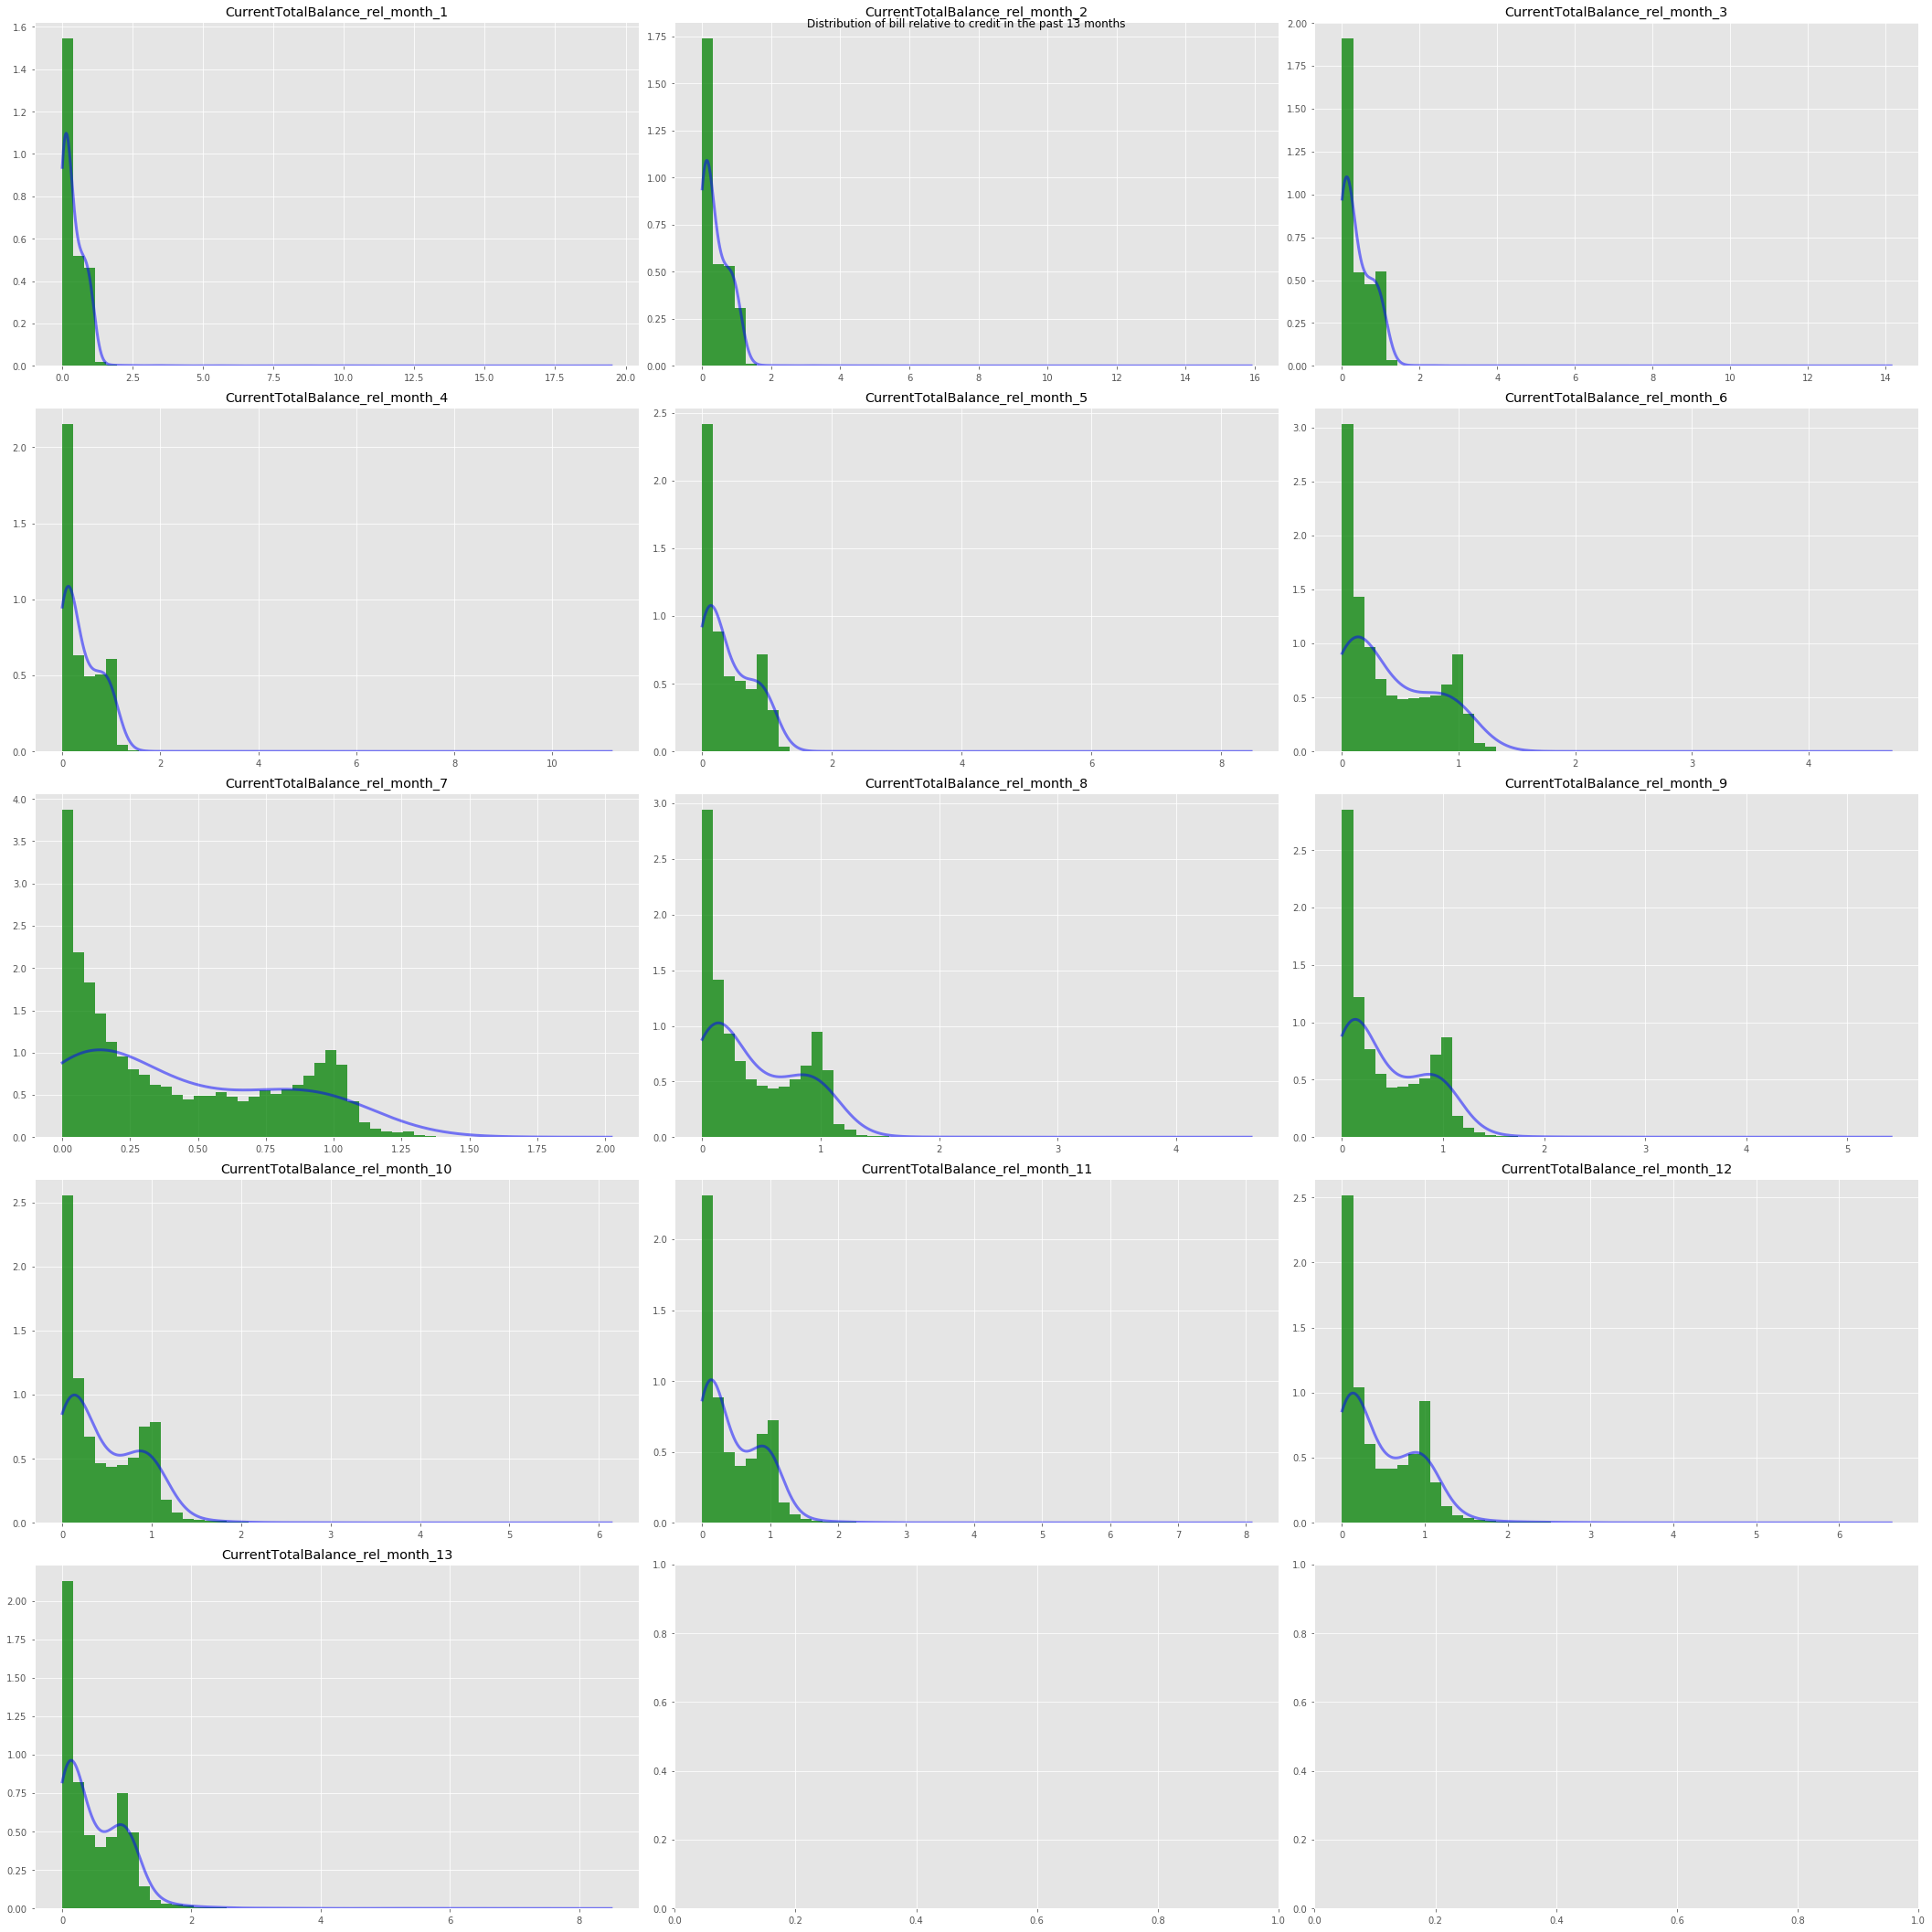

In [21]:
from sklearn.neighbors.kde import KernelDensity

pattern = re.compile("^CurrentTotalBalance_rel_month_[0-9]+$")
columns = [ x for x in df.columns if (pattern.match(x))]

fig, ax = plt.subplots(5,3)
fig.set_size_inches(30,30)
fig.suptitle('Distribution of bill relative to credit in the past 13 months')

for i in range(len(columns)):
    row,col = int(i/3), i%3

    d = df[columns[i]]
    # the histogram of the data
    n, bins, patches = ax[row,col].hist(d, 50, normed=1, facecolor='green', alpha=0.75)

    # kernel density estimation
    kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(d.values.reshape(-1, 1))
    x_grid = np.linspace(d.min(), d.max(), 1000)
    log_pdf = kde.score_samples(x_grid.reshape(-1, 1))

    # add the density line
    ax[row,col].plot(x_grid, np.exp(log_pdf), color='blue', alpha=0.5, lw=3)
    ax[row,col].set_title(columns[i])

plt.tight_layout(pad=3.0, w_pad=0.5, h_pad=1.0)
plt.show()

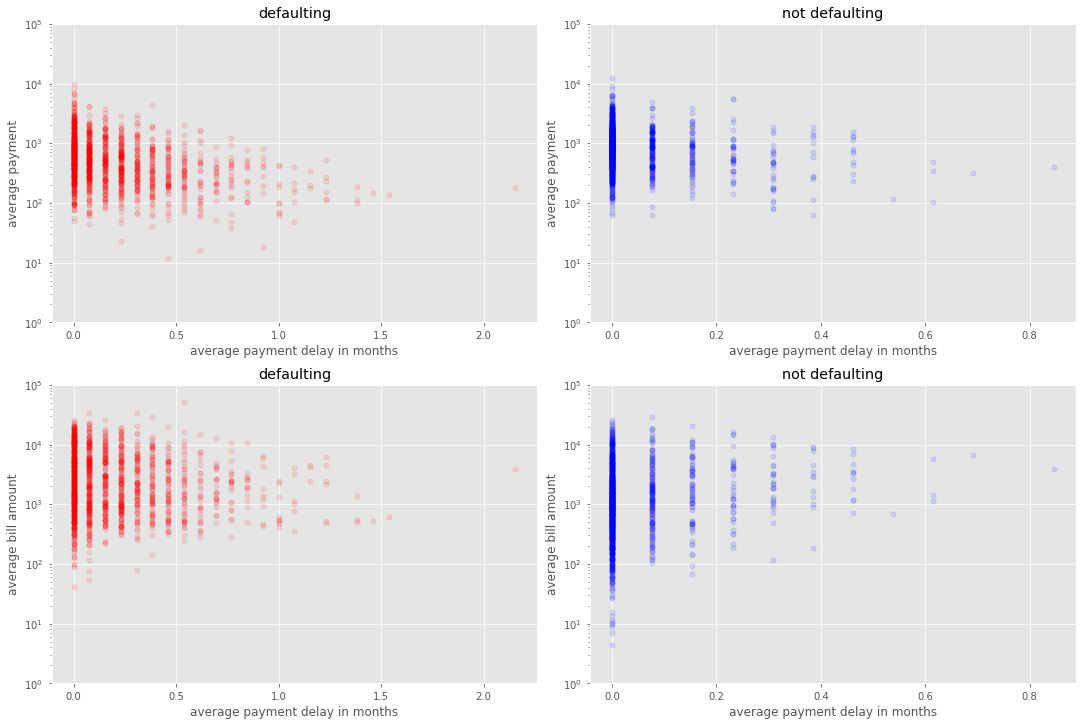

In [22]:
def_no = df[df['Default']==0].sample(1500)
def_yes  = df[df['Default']==1].sample(1500)

fig,ax = plt.subplots(2,2)
fig.set_size_inches(15,10)

ax[0,0].set_ylim([1,1e5])
ax[0,0].set_title('defaulting')
ax[0,0].set_ylabel('average payment')
ax[0,0].set_xlabel('average payment delay in months')
p = ax[0,0].semilogy(def_yes['DelqCycle_avg'], def_yes['TRANSACTION_AMT_avg'], 'ro', markersize=5, alpha=0.1)

ax[0,1].set_ylim([1,1e5])
ax[0,1].set_title('not defaulting')
ax[0,1].set_ylabel('average payment')
ax[0,1].set_xlabel('average payment delay in months')
p = ax[0,1].semilogy(def_no['DelqCycle_avg'], def_no['TRANSACTION_AMT_avg'], 'bo', markersize=5, alpha=0.1)

ax[1,0].set_ylim([1,1e5])
ax[1,0].set_title('defaulting')
ax[1,0].set_ylabel('average bill amount')
ax[1,0].set_xlabel('average payment delay in months')
p = ax[1,0].semilogy(def_yes['DelqCycle_avg'], def_yes['CurrentTotalBalance_avg'], 'ro', markersize=5, alpha=0.1)

ax[1,1].set_ylim([1,1e5])
ax[1,1].set_title('not defaulting')
ax[1,1].set_ylabel('average bill amount')
ax[1,1].set_xlabel('average payment delay in months')
p = ax[1,1].semilogy(def_no['DelqCycle_avg'], def_no['CurrentTotalBalance_avg'], 'bo', markersize=5, alpha=0.1)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

In [23]:
df_predict.isnull().any()

ID_CPTE                              False
CreditLimit                          False
CurrentTotalBalance_month_1          False
CurrentTotalBalance_month_2          False
CurrentTotalBalance_month_3          False
CurrentTotalBalance_month_4          False
CurrentTotalBalance_month_5          False
CurrentTotalBalance_month_6          False
CurrentTotalBalance_month_7          False
CurrentTotalBalance_month_8          False
CurrentTotalBalance_month_9          False
CurrentTotalBalance_month_10         False
CurrentTotalBalance_month_11         False
CurrentTotalBalance_month_12         False
CurrentTotalBalance_month_13         False
CashBalance_month_1                  False
CashBalance_month_2                  False
CashBalance_month_3                  False
CashBalance_month_4                  False
CashBalance_month_5                  False
CashBalance_month_6                  False
CashBalance_month_7                  False
CashBalance_month_8                  False
CashBalance

In [24]:
df.to_csv('C:\\Users\\marcp\\OneDrive\\Documents\\DataCup\\Dataframes\\DataFrame_temp.csv', sep=',', index = False)
df = pd.read_csv('C:\\Users\\marcp\\OneDrive\\Documents\\DataCup\\Dataframes\\DataFrame_temp.csv')

In [25]:
from patsy import dmatrices

formula  = 'ID_CPTE ~ '

# original features
##formula += 'C(sex) + C(marriage) +  C(education) + age'
##formula += '+' + '+'.join(selcols('pay_'))

#pay delays
formula += 'DelqCycle_avg+DelqCycle_std'
formula += '+' + '+'.join(selcols('DelqCycle_month_'))

#### engineered / normalized features

# categorical age and credit limit (binned)
##formula += '+' + 'C(age_cat)'
formula += '+' + 'C(CreditLimit_cat)+CreditLimit_log'
    
#pay_amt
formula += '+' + 'TRANSACTION_AMT_avg_log'
formula += '+' + '+'.join(selcols('TRANSACTION_relAMT_month_'))
formula += '+' + '+'.join(selcols('TRANSACTION_logAMT_month_'))

# bill amounts
formula += '+' + 'CurrentTotalBalance_avg_log'
formula += '+' + '+'.join(selcols('CurrentTotalBalance_rel_month_'))
formula += '+' + '+'.join(selcols('CurrentTotalBalance_sign_month_'))
formula += '+' + '+'.join(selcols('CurrentTotalBalance_log_month_'))

#print(formula)

predict_y, predict_X = dmatrices(formula, data=df_predict, return_type='dataframe')
predict_y = predict_y.iloc[:, 0]
#predict_y.to_csv('C:\\Users\\marcp\\OneDrive\\Documents\\DataCup\\Dataframes\\predict_order.csv', sep=',', index = False)

In [26]:
formula  = 'C(Default) ~ '

# original features
##formula += 'C(sex) + C(marriage) +  C(education) + age'
##formula += '+' + '+'.join(selcols('pay_'))

#pay delays
formula += 'DelqCycle_avg+DelqCycle_std'
formula += '+' + '+'.join(selcols('DelqCycle_month_'))

#### engineered / normalized features

# categorical age and credit limit (binned)
##formula += '+' + 'C(age_cat)'
formula += '+' + 'C(CreditLimit_cat)+CreditLimit_log'
    
#pay_amt
formula += '+' + 'TRANSACTION_AMT_avg_log'
formula += '+' + '+'.join(selcols('TRANSACTION_relAMT_month_'))
formula += '+' + '+'.join(selcols('TRANSACTION_logAMT_month_'))

# bill amounts
formula += '+' + 'CurrentTotalBalance_avg_log'
formula += '+' + '+'.join(selcols('CurrentTotalBalance_rel_month_'))
formula += '+' + '+'.join(selcols('CurrentTotalBalance_sign_month_'))
formula += '+' + '+'.join(selcols('CurrentTotalBalance_log_month_'))

#print(formula)

y, X = dmatrices(formula, data=df, return_type='dataframe')
y = y.iloc[:, 1]

In [27]:
#predict_y
#X.to_csv('C:\\Users\\marcp\\OneDrive\\Documents\\DataCup\\Dataframes\\X.csv', sep=',', index = False)
#predict_X.to_csv('C:\\Users\\marcp\\OneDrive\\Documents\\DataCup\\Dataframes\\predict_X.csv', sep=',', index = False)
for z in list(X):
    if z not in list(predict_X):
        predict_X[z]=0
for z in list(predict_X):
    if z not in list(X):
        X[z]=0
X.columns.difference(predict_X.columns)        

Index([], dtype='object')

In [28]:
import itertools
from sklearn.metrics import roc_curve, auc, roc_auc_score, log_loss, accuracy_score, confusion_matrix

def plot_cm(ax, y_true, y_pred, classes, title, th=0.5, cmap=plt.cm.Blues):
    y_pred_labels = (y_pred>th).astype(int)
    
    cm = confusion_matrix(y_true, y_pred_labels)
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)

    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

def plot_auc(ax, y_train, y_train_pred, y_test, y_test_pred, th=0.5):

    y_train_pred_labels = (y_train_pred>th).astype(int)
    y_test_pred_labels  = (y_test_pred>th).astype(int)

    fpr_train, tpr_train, _ = roc_curve(y_train,y_train_pred)
    roc_auc_train = auc(fpr_train, tpr_train)
    acc_train = accuracy_score(y_train, y_train_pred_labels)

    fpr_test, tpr_test, _ = roc_curve(y_test,y_test_pred)
    roc_auc_test = auc(fpr_test, tpr_test)
    acc_test = accuracy_score(y_test, y_test_pred_labels)

    ax.plot(fpr_train, tpr_train)
    ax.plot(fpr_test, tpr_test)

    ax.plot([0, 1], [0, 1], 'k--')

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC curve')
    
    train_text = 'train acc = {:.3f}, auc = {:.2f}'.format(acc_train, roc_auc_train)
    test_text = 'test acc = {:.3f}, auc = {:.4f}'.format(acc_test, roc_auc_test)
    ax.legend([train_text, test_text])

In [118]:
import warnings
warnings.simplefilter(action='ignore', category=(UserWarning,RuntimeWarning))
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import preprocessing

scaler90 = preprocessing.MinMaxScaler()
scaler45 = preprocessing.MinMaxScaler()
scalerraw = preprocessing.MinMaxScaler()

selector90 = SelectKBest(f_classif, 90)
selector45 = SelectKBest(f_classif, 90)

selector90.fit(X, y)
selector45.fit(X, y)

top_indices90 = np.nan_to_num(selector90.scores_).argsort()[-90:][::-1]
top_indices45 = np.nan_to_num(selector45.scores_).argsort()[-45:][::-1]

selector90.scores_[top_indices90]
selector45.scores_[top_indices45]

X90_idx = X.columns[top_indices90]
X45_idx = X.columns[top_indices45]

predict_X90_idx = X.columns[top_indices90]
predict_X45_idx = X.columns[top_indices45]



X90 = X[X90_idx]
X45 = X[X45_idx]

scaler90.fit(X90)
scaler45.fit(X45)
scalerraw.fit(df.drop(df[['Default','CreditLimit_cat']],1))

np_scaled_X90 = scaler90.transform(X90)
np_scaled_X45 = scaler45.transform(X45)

predict_X90 = predict_X[X90_idx]
predict_X45 = predict_X[X45_idx]
np_scaled_predict_X90 = scaler90.transform(predict_X90)
np_scaled_predict_X45 = scaler45.transform(predict_X45)

np_raw_X = np.array(df.drop(df[['Default','CreditLimit_cat']],1))
np_rawpredict_X = np.array(df_predict.drop('CreditLimit_cat',1))
np_scaled_raw_X = scalerraw.transform(df.drop(df[['Default','CreditLimit_cat']],1))
np_scaled_rawpredict_X = scalerraw.transform(df_predict.drop('CreditLimit_cat',1))

np_X90 = X90.values
np_X45 = X45.values
np_predict_X90 = predict_X90.values
np_predict_X45 = predict_X45.values
np_y = y.values

array(['DelqCycle_std', 'DelqCycle_month_3', 'DelqCycle_month_1',
       'DelqCycle_month_2', 'DelqCycle_month_6'], dtype=object)

In [30]:
from sklearn.model_selection import KFold # import KFold

kf = KFold(n_splits=4) # Define the split - into 2 folds 
kf.get_n_splits(np_scaled_X90) # returns the number of splitting iterations in the cross-validator

print(kf.get_n_splits(np_scaled_X90))

4


In [31]:
from sklearn.neighbors import KNeighborsClassifier
train_preds_df = pd.DataFrame().reindex(index=range(0,11900))
test_preds_df = pd.DataFrame()
temp_test_preds_df = pd.DataFrame()

kk90 = [1,3,7]
kk45 = [1,3,7]
rawkk = [1,3,7]

kf.get_n_splits(np_scaled_X90)
for k in kk90:
    count = 0
    for train_index, test_index in kf.split(np_scaled_X90):
        KFold_X_train, KFold_X_test = np_scaled_X90[train_index], np_scaled_X90[test_index]
        KFold_y_train, KFold_y_test = np_y[train_index], np_y[test_index]
    
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(KFold_X_train, KFold_y_train)
    
        train_pred = knn.predict_proba(KFold_X_test)
        test_pred = knn.predict_proba(np_scaled_predict_X90)
                
        name = 'scaled_X90_k{}'.format(k)
        temp_name = 'temp_scaled_X90_k{}_{}'.format(k,count)
    
        train_preds_df.loc[test_index,name] = train_pred[:, 1].tolist()
        temp_test_preds_df[temp_name] = test_pred[:, 1].tolist()
        count += 1
    test_preds_df[name] = 0.25*temp_test_preds_df['temp_scaled_X90_k{}_0'.format(k)] + 0.25*temp_test_preds_df['temp_scaled_X90_k{}_1'.format(k)] + 0.25*temp_test_preds_df['temp_scaled_X90_k{}_2'.format(k)] + 0.25*temp_test_preds_df['temp_scaled_X90_k{}_3'.format(k)]
    print('Did k={}'.format(k))

for k in kk45:
    count = 0
    for train_index, test_index in kf.split(np_scaled_X45):
        KFold_X_train, KFold_X_test = np_scaled_X45[train_index], np_scaled_X45[test_index]
        KFold_y_train, KFold_y_test = np_y[train_index], np_y[test_index]
    
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(KFold_X_train, KFold_y_train)
    
        train_pred = knn.predict_proba(KFold_X_test)
        test_pred = knn.predict_proba(np_scaled_predict_X45)
               
        name = 'scaled_X45_k{}'.format(k)
        temp_name = 'temp_scaled_X45_k{}_{}'.format(k,count)
    
        train_preds_df.loc[test_index,name] = train_pred[:, 1].tolist()
        temp_test_preds_df[temp_name] = test_pred[:, 1].tolist()
        count += 1
    test_preds_df[name] = 0.25*temp_test_preds_df['temp_scaled_X45_k{}_0'.format(k)] + 0.25*temp_test_preds_df['temp_scaled_X45_k{}_1'.format(k)] + 0.25*temp_test_preds_df['temp_scaled_X45_k{}_2'.format(k)] + 0.25*temp_test_preds_df['temp_scaled_X45_k{}_3'.format(k)]
    print('Did k={}'.format(k))

for k in rawkk:
    count = 0
    for train_index, test_index in kf.split(np_scaled_raw_X):
        KFold_X_train, KFold_X_test = np_scaled_raw_X[train_index], np_scaled_raw_X[test_index]
        KFold_y_train, KFold_y_test = np_y[train_index], np_y[test_index]
    
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(KFold_X_train, KFold_y_train)
    
        train_pred = knn.predict_proba(KFold_X_test)
        test_pred = knn.predict_proba(np_scaled_rawpredict_X)
        
        
        name = 'scaled_rawX_k{}'.format(k)
        temp_name = 'temp_scaled_rawX_k{}_{}'.format(k,count)
    
        train_preds_df.loc[test_index,name] = train_pred[:, 1].tolist()
        temp_test_preds_df[temp_name] = test_pred[:, 1].tolist()
        count += 1
    test_preds_df[name] = 0.25*temp_test_preds_df['temp_scaled_rawX_k{}_0'.format(k)] + 0.25*temp_test_preds_df['temp_scaled_rawX_k{}_1'.format(k)] + 0.25*temp_test_preds_df['temp_scaled_rawX_k{}_2'.format(k)] + 0.25*temp_test_preds_df['temp_scaled_rawX_k{}_3'.format(k)]
    print('Did k={}'.format(k))

Did k=1
Did k=3
Did k=7
Did k=1
Did k=3
Did k=7
Did k=1
Did k=3
Did k=7


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score, log_loss, accuracy_score

rf = RandomForestClassifier(bootstrap = False,
    max_depth= 15,
    max_features= 8,
    min_samples_leaf= 2,
    min_samples_split=2,
    n_estimators= 302)

count = 0
for train_index, test_index in kf.split(np_scaled_raw_X):
    KFold_X_train, KFold_X_test = np_scaled_raw_X[train_index], np_scaled_raw_X[test_index]
    KFold_y_train, KFold_y_test = np_y[train_index], np_y[test_index]

    rf.fit(KFold_X_train, KFold_y_train)
    
    train_pred = rf.predict_proba(KFold_X_test)
    test_pred = rf.predict_proba(np_scaled_rawpredict_X)
                
    name = 'scaled_rawX_rf'
    temp_name = 'temp_scaled_rawX_{}'.format(count)
    
    train_preds_df.loc[test_index,name] = train_pred[:, 1].tolist()
    temp_test_preds_df[temp_name] = test_pred[:, 1].tolist()
    count += 1
test_preds_df[name] = 0.25*temp_test_preds_df['temp_scaled_rawX_0'] + 0.25*temp_test_preds_df['temp_scaled_rawX_1'] + 0.25*temp_test_preds_df['temp_scaled_rawX_2'] + 0.25*temp_test_preds_df['temp_scaled_rawX_3']

In [33]:
import xgboost as xgb
from sklearn.metrics import log_loss, accuracy_score
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from xgboost.sklearn import XGBClassifier

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 12, 4

c:\users\marcp\appdata\local\programs\python\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\users\marcp\appdata\local\programs\python\python36\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [171]:
def modelfit(alg, xinput, yinput, predictors, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):

    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(xinput.values, label=yinput.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds, verbose_eval=True,  stratified=False)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(xinput.values, yinput.values,eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(xinput.values)
    dtrain_predprob = alg.predict_proba(xinput.values)[:,1]
    
    best_auc_mean = cvresult['test-auc-mean'].iloc[alg.get_params()['n_estimators']-1]
    
    #Print model report:
    print("\nModel Report")
    print("Model best iteration : {} with an auc score of : {}".format(alg.get_params()['n_estimators'], best_auc_mean))
    print("Accuracy : {}".format(metrics.accuracy_score(yinput.values, dtrain_predictions)))
    print("AUC Score (Train): {}".format(metrics.roc_auc_score(yinput, dtrain_predprob)))  
                    
    #feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False))
    feat_imp = pd.Series(alg.get_booster().get_score(importance_type='weight')).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

[0]	train-auc:0.84041+0.00837578	test-auc:0.831235+0.0206979
[1]	train-auc:0.865834+0.00323774	test-auc:0.854236+0.0072206
[2]	train-auc:0.872772+0.00504304	test-auc:0.862214+0.00795916
[3]	train-auc:0.876391+0.00575325	test-auc:0.864848+0.00684078
[4]	train-auc:0.878437+0.00569263	test-auc:0.867236+0.0078524
[5]	train-auc:0.881614+0.00390053	test-auc:0.870857+0.00738543
[6]	train-auc:0.882388+0.00442334	test-auc:0.871624+0.00779807
[7]	train-auc:0.88345+0.00428323	test-auc:0.873122+0.00920093
[8]	train-auc:0.883802+0.00391835	test-auc:0.873671+0.00925437
[9]	train-auc:0.8852+0.00218254	test-auc:0.87559+0.00814721
[10]	train-auc:0.885359+0.00219326	test-auc:0.875611+0.00818884
[11]	train-auc:0.886277+0.0009512	test-auc:0.876527+0.00725696
[12]	train-auc:0.886355+0.00104416	test-auc:0.876559+0.00694595
[13]	train-auc:0.886524+0.000954742	test-auc:0.876623+0.00710094
[14]	train-auc:0.88699+0.000955335	test-auc:0.877486+0.00660711
[15]	train-auc:0.887234+0.000774784	test-auc:0.877659+0.00

[128]	train-auc:0.899114+0.000889262	test-auc:0.885998+0.00481678
[129]	train-auc:0.899245+0.000874921	test-auc:0.886203+0.0047003
[130]	train-auc:0.899308+0.00086589	test-auc:0.886228+0.00466434
[131]	train-auc:0.89932+0.000908758	test-auc:0.886313+0.00462745
[132]	train-auc:0.899397+0.000916357	test-auc:0.886365+0.0046816
[133]	train-auc:0.89945+0.000911702	test-auc:0.886375+0.00472905
[134]	train-auc:0.899516+0.000907538	test-auc:0.886416+0.00474952
[135]	train-auc:0.899609+0.000917232	test-auc:0.886487+0.00474608
[136]	train-auc:0.899681+0.00093925	test-auc:0.886438+0.00472234
[137]	train-auc:0.899713+0.000948172	test-auc:0.886448+0.00469779
[138]	train-auc:0.899753+0.000950918	test-auc:0.886552+0.00486496
[139]	train-auc:0.899774+0.000929964	test-auc:0.886664+0.00486914
[140]	train-auc:0.899834+0.000978759	test-auc:0.886681+0.00486805
[141]	train-auc:0.899972+0.000912937	test-auc:0.886758+0.00476035
[142]	train-auc:0.900014+0.000894289	test-auc:0.88687+0.00480098
[143]	train-auc:0

[253]	train-auc:0.906832+0.000708735	test-auc:0.890533+0.00372
[254]	train-auc:0.906909+0.00071503	test-auc:0.890587+0.00373244
[255]	train-auc:0.906953+0.000695949	test-auc:0.89059+0.00372953
[256]	train-auc:0.907033+0.000669187	test-auc:0.890605+0.00370874
[257]	train-auc:0.9071+0.000693013	test-auc:0.89062+0.00371688
[258]	train-auc:0.907159+0.000671504	test-auc:0.890625+0.00363898
[259]	train-auc:0.907202+0.000661356	test-auc:0.890617+0.00365216
[260]	train-auc:0.907269+0.000664629	test-auc:0.890669+0.00365724
[261]	train-auc:0.907319+0.000667782	test-auc:0.890648+0.00364148
[262]	train-auc:0.90738+0.000672823	test-auc:0.890692+0.00361117
[263]	train-auc:0.907459+0.00064001	test-auc:0.890694+0.00361401
[264]	train-auc:0.907508+0.000622373	test-auc:0.890761+0.00359537
[265]	train-auc:0.90756+0.000624809	test-auc:0.890751+0.00356814
[266]	train-auc:0.907617+0.000599505	test-auc:0.890758+0.00354586
[267]	train-auc:0.907668+0.000619389	test-auc:0.890763+0.00356195
[268]	train-auc:0.907

[378]	train-auc:0.913335+0.000489633	test-auc:0.892979+0.00330669
[379]	train-auc:0.913374+0.000480823	test-auc:0.892979+0.00330312
[380]	train-auc:0.913432+0.000461039	test-auc:0.892996+0.00329119
[381]	train-auc:0.913482+0.000448228	test-auc:0.893023+0.00333245
[382]	train-auc:0.913545+0.000453501	test-auc:0.893039+0.00333271
[383]	train-auc:0.913584+0.000441656	test-auc:0.893062+0.0033631
[384]	train-auc:0.913618+0.000454964	test-auc:0.893063+0.00337478
[385]	train-auc:0.913684+0.000437387	test-auc:0.893071+0.00333341
[386]	train-auc:0.91373+0.000436509	test-auc:0.893087+0.00334075
[387]	train-auc:0.913761+0.000438864	test-auc:0.893075+0.00333892
[388]	train-auc:0.9138+0.000458407	test-auc:0.893047+0.00334441
[389]	train-auc:0.913844+0.000456467	test-auc:0.893052+0.00332382
[390]	train-auc:0.913904+0.000441415	test-auc:0.893084+0.00331318
[391]	train-auc:0.913934+0.000427829	test-auc:0.893102+0.00329778
[392]	train-auc:0.913968+0.000421444	test-auc:0.893116+0.00328518
[393]	train-au

[504]	train-auc:0.918739+0.000586991	test-auc:0.894409+0.00289824
[505]	train-auc:0.91878+0.000580305	test-auc:0.894417+0.00289538
[506]	train-auc:0.918818+0.00057091	test-auc:0.894415+0.00292387
[507]	train-auc:0.91886+0.000572939	test-auc:0.894435+0.00293064
[508]	train-auc:0.918906+0.000569761	test-auc:0.894455+0.00293286
[509]	train-auc:0.918942+0.000562845	test-auc:0.894436+0.00290622
[510]	train-auc:0.918996+0.000553901	test-auc:0.894453+0.00291462
[511]	train-auc:0.919021+0.000558694	test-auc:0.894468+0.00292806
[512]	train-auc:0.919055+0.000562027	test-auc:0.894485+0.00291906
[513]	train-auc:0.919095+0.00056676	test-auc:0.894477+0.00292097
[514]	train-auc:0.919138+0.000572588	test-auc:0.894496+0.00293994
[515]	train-auc:0.919161+0.000582197	test-auc:0.894496+0.00293892
[516]	train-auc:0.919202+0.000580525	test-auc:0.894485+0.00296057
[517]	train-auc:0.91926+0.000590497	test-auc:0.894465+0.00296886
[518]	train-auc:0.919306+0.000589101	test-auc:0.894449+0.00299151
[519]	train-auc

[629]	train-auc:0.923584+0.000572179	test-auc:0.894951+0.00282889
[630]	train-auc:0.923615+0.00057532	test-auc:0.894939+0.00284918
[631]	train-auc:0.92365+0.000574959	test-auc:0.894908+0.00284333
[632]	train-auc:0.923699+0.00057509	test-auc:0.894901+0.00282305
[633]	train-auc:0.923733+0.000578968	test-auc:0.894908+0.00281164
[634]	train-auc:0.923763+0.000576948	test-auc:0.894908+0.00281535
[635]	train-auc:0.923786+0.00058238	test-auc:0.894936+0.00281712
[636]	train-auc:0.923823+0.000577584	test-auc:0.894922+0.00280306
[637]	train-auc:0.923861+0.000578198	test-auc:0.894892+0.00280046
[638]	train-auc:0.923879+0.000586445	test-auc:0.894905+0.00278918
[639]	train-auc:0.923905+0.00059052	test-auc:0.894898+0.00279426
[640]	train-auc:0.923952+0.000599872	test-auc:0.894895+0.00280679
[641]	train-auc:0.923989+0.000599588	test-auc:0.894906+0.00278291
[642]	train-auc:0.924028+0.000598315	test-auc:0.894901+0.00278207
[643]	train-auc:0.924057+0.000592276	test-auc:0.894905+0.00278853
[644]	train-auc

[754]	train-auc:0.927934+0.000692587	test-auc:0.895313+0.00282172
[755]	train-auc:0.927967+0.00068877	test-auc:0.895307+0.00280444
[756]	train-auc:0.927996+0.000684555	test-auc:0.895315+0.00280928
[757]	train-auc:0.928034+0.000688221	test-auc:0.895339+0.00281854
[758]	train-auc:0.928071+0.000690306	test-auc:0.895316+0.0028203
[759]	train-auc:0.928092+0.000687511	test-auc:0.89533+0.00281921
[760]	train-auc:0.928121+0.000691997	test-auc:0.895332+0.00281158
[761]	train-auc:0.92816+0.000709036	test-auc:0.895307+0.00281561
[762]	train-auc:0.928207+0.000710396	test-auc:0.895323+0.00280065
[763]	train-auc:0.928251+0.000709103	test-auc:0.895323+0.00278859
[764]	train-auc:0.928276+0.000702868	test-auc:0.895327+0.00280953
[765]	train-auc:0.928316+0.000698148	test-auc:0.895339+0.00282679
[766]	train-auc:0.928355+0.000700949	test-auc:0.895327+0.00284842
[767]	train-auc:0.928386+0.000691814	test-auc:0.895316+0.0028423
[768]	train-auc:0.928427+0.000705243	test-auc:0.895319+0.00284112
[769]	train-auc

c:\users\marcp\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Model best iteration : 752 with an auc score of : 0.8953514
Accuracy : 0.8835854341736694
AUC Score (Train): 0.9233707524984536
[0]	train-auc:0.838087+0.00808447	test-auc:0.826074+0.0150769
[1]	train-auc:0.85974+0.00785694	test-auc:0.84396+0.00938236
[2]	train-auc:0.869581+0.00324606	test-auc:0.855716+0.00429737
[3]	train-auc:0.87269+0.00238235	test-auc:0.860191+0.0062837
[4]	train-auc:0.874398+0.00289603	test-auc:0.862946+0.00564782
[5]	train-auc:0.876619+0.00230877	test-auc:0.865262+0.00581342
[6]	train-auc:0.87831+0.00258148	test-auc:0.866418+0.00520433
[7]	train-auc:0.878998+0.00250715	test-auc:0.867184+0.00499557
[8]	train-auc:0.879774+0.00263939	test-auc:0.868232+0.00468111
[9]	train-auc:0.880108+0.00263922	test-auc:0.868717+0.0043513
[10]	train-auc:0.880404+0.00261838	test-auc:0.869629+0.00400691
[11]	train-auc:0.880604+0.00252975	test-auc:0.869287+0.00396029
[12]	train-auc:0.880925+0.00244371	test-auc:0.869609+0.00406797
[13]	train-auc:0.880879+0.00258814	test-auc

[127]	train-auc:0.893036+0.00161839	test-auc:0.877771+0.0058439
[128]	train-auc:0.893085+0.00157399	test-auc:0.877852+0.00583415
[129]	train-auc:0.893263+0.00151504	test-auc:0.877982+0.00596754
[130]	train-auc:0.893358+0.00145696	test-auc:0.878004+0.0059915
[131]	train-auc:0.893445+0.00150463	test-auc:0.878027+0.00595158
[132]	train-auc:0.893434+0.00146885	test-auc:0.878032+0.00596895
[133]	train-auc:0.893608+0.00137635	test-auc:0.87841+0.00578934
[134]	train-auc:0.893722+0.00139007	test-auc:0.878407+0.00580606
[135]	train-auc:0.893769+0.00140552	test-auc:0.878453+0.00580357
[136]	train-auc:0.893878+0.00143402	test-auc:0.878381+0.005637
[137]	train-auc:0.893925+0.00142999	test-auc:0.878372+0.00573743
[138]	train-auc:0.893968+0.00143911	test-auc:0.87834+0.00570022
[139]	train-auc:0.894051+0.00141669	test-auc:0.878389+0.00573539
[140]	train-auc:0.894149+0.00143759	test-auc:0.878368+0.00574396
[141]	train-auc:0.894263+0.00150863	test-auc:0.878615+0.00557696
[142]	train-auc:0.894296+0.0015

[255]	train-auc:0.901486+0.00114189	test-auc:0.882371+0.00560508
[256]	train-auc:0.901565+0.00116388	test-auc:0.882413+0.0055894
[257]	train-auc:0.901635+0.00115921	test-auc:0.882452+0.00558976
[258]	train-auc:0.901697+0.00114888	test-auc:0.882492+0.00561665
[259]	train-auc:0.901739+0.00114393	test-auc:0.882511+0.00558974
[260]	train-auc:0.901795+0.00114021	test-auc:0.882539+0.00560907
[261]	train-auc:0.901831+0.00114174	test-auc:0.882569+0.00562505
[262]	train-auc:0.901879+0.0011459	test-auc:0.882596+0.0056137
[263]	train-auc:0.901917+0.00115137	test-auc:0.882582+0.00560371
[264]	train-auc:0.901975+0.0011464	test-auc:0.882799+0.00570487
[265]	train-auc:0.902029+0.00115788	test-auc:0.882771+0.00570866
[266]	train-auc:0.902077+0.00117679	test-auc:0.882802+0.00572814
[267]	train-auc:0.902159+0.0011617	test-auc:0.882874+0.00569636
[268]	train-auc:0.902219+0.00115857	test-auc:0.882891+0.00567151
[269]	train-auc:0.902263+0.00115575	test-auc:0.882947+0.00564813
[270]	train-auc:0.9023+0.00115

[382]	train-auc:0.908428+0.000982331	test-auc:0.884871+0.00549297
[383]	train-auc:0.908482+0.000990093	test-auc:0.884874+0.00546798
[384]	train-auc:0.908523+0.00098618	test-auc:0.884873+0.00545132
[385]	train-auc:0.908573+0.00097275	test-auc:0.88489+0.00547866
[386]	train-auc:0.908618+0.00098529	test-auc:0.884901+0.00549216
[387]	train-auc:0.908661+0.000984958	test-auc:0.884906+0.00552295
[388]	train-auc:0.908715+0.000972349	test-auc:0.884913+0.00551388
[389]	train-auc:0.908771+0.00097414	test-auc:0.884911+0.00550465
[390]	train-auc:0.908837+0.000990673	test-auc:0.884922+0.00550137
[391]	train-auc:0.908889+0.000984706	test-auc:0.884948+0.00551092
[392]	train-auc:0.908932+0.000992476	test-auc:0.884995+0.00548931
[393]	train-auc:0.908972+0.00101034	test-auc:0.885008+0.00547581
[394]	train-auc:0.909009+0.00100949	test-auc:0.885013+0.00545128
[395]	train-auc:0.909059+0.000999925	test-auc:0.885035+0.00544317
[396]	train-auc:0.909114+0.000986681	test-auc:0.885058+0.00542165
[397]	train-auc:0

[509]	train-auc:0.914429+0.00102003	test-auc:0.886566+0.00501795
[510]	train-auc:0.914476+0.00102454	test-auc:0.886565+0.00502073
[511]	train-auc:0.91452+0.00102437	test-auc:0.886569+0.00502949
[512]	train-auc:0.914566+0.00102669	test-auc:0.886581+0.00502302
[513]	train-auc:0.914621+0.00103095	test-auc:0.886583+0.00501164
[514]	train-auc:0.914666+0.00104732	test-auc:0.886608+0.00500536
[515]	train-auc:0.914712+0.00104547	test-auc:0.886595+0.00499366
[516]	train-auc:0.914757+0.00102443	test-auc:0.886626+0.00497409
[517]	train-auc:0.914806+0.00100284	test-auc:0.886618+0.004961
[518]	train-auc:0.914848+0.000992916	test-auc:0.886638+0.00494663
[519]	train-auc:0.914873+0.000986571	test-auc:0.886668+0.00494845
[520]	train-auc:0.914924+0.00097653	test-auc:0.886683+0.00495049
[521]	train-auc:0.914979+0.000972323	test-auc:0.886702+0.0049643
[522]	train-auc:0.915035+0.000980582	test-auc:0.886695+0.00497646
[523]	train-auc:0.915063+0.000983645	test-auc:0.886696+0.00498347
[524]	train-auc:0.915119

[635]	train-auc:0.919451+0.000978835	test-auc:0.887+0.00497427
[636]	train-auc:0.919489+0.00097138	test-auc:0.886998+0.00496535
[637]	train-auc:0.919529+0.00096622	test-auc:0.88701+0.00495204
[638]	train-auc:0.919572+0.000975907	test-auc:0.887003+0.00496846
[639]	train-auc:0.919612+0.000972945	test-auc:0.886994+0.00495079
[640]	train-auc:0.919641+0.000971424	test-auc:0.886988+0.00496519
[641]	train-auc:0.919692+0.000973451	test-auc:0.886998+0.00493775
[642]	train-auc:0.919734+0.000980099	test-auc:0.886993+0.00492305
[643]	train-auc:0.919765+0.000976044	test-auc:0.88699+0.00492387
[644]	train-auc:0.919799+0.000965995	test-auc:0.886979+0.00491525
[645]	train-auc:0.919838+0.00096794	test-auc:0.886979+0.00491896
[646]	train-auc:0.919879+0.000964182	test-auc:0.88697+0.0049183
[647]	train-auc:0.919912+0.000967629	test-auc:0.886985+0.00492357
[648]	train-auc:0.919958+0.000973063	test-auc:0.887002+0.00490811
[649]	train-auc:0.919995+0.000973232	test-auc:0.887017+0.00490069
[650]	train-auc:0.92

c:\users\marcp\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Model best iteration : 752 with an auc score of : 0.8871886
Accuracy : 0.8869467787114846
AUC Score (Train): 0.9192540033979861
[0]	train-auc:0.842724+0.00509527	test-auc:0.835831+0.00982548
[1]	train-auc:0.857922+0.00882646	test-auc:0.848747+0.0148563
[2]	train-auc:0.868524+0.00185765	test-auc:0.861458+0.00656284
[3]	train-auc:0.871609+0.00366349	test-auc:0.863606+0.00547768
[4]	train-auc:0.873416+0.00365932	test-auc:0.86552+0.00640302
[5]	train-auc:0.876137+0.00361087	test-auc:0.866611+0.00477905
[6]	train-auc:0.877445+0.00251355	test-auc:0.868157+0.00659411
[7]	train-auc:0.878175+0.0024001	test-auc:0.870268+0.00556263
[8]	train-auc:0.879099+0.00233621	test-auc:0.871039+0.00591809
[9]	train-auc:0.879441+0.00210449	test-auc:0.872081+0.00633287
[10]	train-auc:0.879646+0.00208826	test-auc:0.87193+0.00609045
[11]	train-auc:0.879989+0.00176711	test-auc:0.871999+0.00604162
[12]	train-auc:0.880149+0.00185037	test-auc:0.871864+0.00583929
[13]	train-auc:0.880563+0.00174751	test-

[126]	train-auc:0.8934+0.000657315	test-auc:0.88122+0.00483738
[127]	train-auc:0.893474+0.000660359	test-auc:0.881302+0.00487929
[128]	train-auc:0.893518+0.000643736	test-auc:0.881308+0.00487083
[129]	train-auc:0.893586+0.000629398	test-auc:0.881335+0.0048841
[130]	train-auc:0.893619+0.000601145	test-auc:0.881381+0.00496069
[131]	train-auc:0.893672+0.000558694	test-auc:0.881359+0.00500946
[132]	train-auc:0.893712+0.000558562	test-auc:0.881407+0.00509756
[133]	train-auc:0.893765+0.000546263	test-auc:0.881348+0.00507155
[134]	train-auc:0.893962+0.000655633	test-auc:0.881469+0.00487147
[135]	train-auc:0.893993+0.000678591	test-auc:0.881516+0.00488131
[136]	train-auc:0.894063+0.000699178	test-auc:0.881525+0.00486353
[137]	train-auc:0.894143+0.000694959	test-auc:0.881545+0.00488122
[138]	train-auc:0.894205+0.000727879	test-auc:0.881571+0.00486212
[139]	train-auc:0.894257+0.00074156	test-auc:0.881572+0.00492594
[140]	train-auc:0.894322+0.000758698	test-auc:0.88154+0.00508209
[141]	train-auc:

[252]	train-auc:0.90092+0.000636536	test-auc:0.884941+0.00477286
[253]	train-auc:0.900964+0.000647442	test-auc:0.884962+0.00476956
[254]	train-auc:0.901024+0.000641883	test-auc:0.884958+0.0046711
[255]	train-auc:0.901067+0.000630763	test-auc:0.884999+0.00467622
[256]	train-auc:0.901139+0.000642571	test-auc:0.884998+0.00472402
[257]	train-auc:0.901184+0.000649245	test-auc:0.885014+0.00472945
[258]	train-auc:0.901223+0.000626694	test-auc:0.885027+0.00468544
[259]	train-auc:0.901279+0.00062786	test-auc:0.885043+0.00468469
[260]	train-auc:0.901336+0.000605881	test-auc:0.885095+0.00475109
[261]	train-auc:0.901381+0.000590158	test-auc:0.885116+0.00477178
[262]	train-auc:0.901428+0.000585659	test-auc:0.885117+0.00479927
[263]	train-auc:0.901496+0.00059499	test-auc:0.88514+0.00483203
[264]	train-auc:0.901551+0.000605622	test-auc:0.885166+0.00488344
[265]	train-auc:0.901588+0.000609584	test-auc:0.885181+0.00487392
[266]	train-auc:0.901641+0.000605957	test-auc:0.885202+0.00479373
[267]	train-auc

[377]	train-auc:0.907022+0.000634542	test-auc:0.887+0.00413196
[378]	train-auc:0.907064+0.000623277	test-auc:0.887012+0.00410876
[379]	train-auc:0.907119+0.000620684	test-auc:0.886984+0.0041268
[380]	train-auc:0.907164+0.000633173	test-auc:0.886993+0.00413963
[381]	train-auc:0.907209+0.000618653	test-auc:0.887022+0.00412384
[382]	train-auc:0.907266+0.000603249	test-auc:0.887012+0.00412555
[383]	train-auc:0.907332+0.000602358	test-auc:0.88703+0.00415044
[384]	train-auc:0.907369+0.000604673	test-auc:0.887056+0.00416028
[385]	train-auc:0.907428+0.000597103	test-auc:0.887086+0.00412409
[386]	train-auc:0.907472+0.000580588	test-auc:0.887065+0.00411287
[387]	train-auc:0.907513+0.000576626	test-auc:0.887082+0.00414031
[388]	train-auc:0.907559+0.000568265	test-auc:0.887086+0.00413404
[389]	train-auc:0.907598+0.000558907	test-auc:0.887101+0.00412247
[390]	train-auc:0.907652+0.000560634	test-auc:0.887118+0.00413627
[391]	train-auc:0.907687+0.000562319	test-auc:0.887109+0.00411018
[392]	train-auc

[502]	train-auc:0.912261+0.000575114	test-auc:0.888233+0.00400196
[503]	train-auc:0.912296+0.000579849	test-auc:0.888221+0.00401295
[504]	train-auc:0.91234+0.000592399	test-auc:0.888219+0.00401159
[505]	train-auc:0.912378+0.000577713	test-auc:0.888228+0.0039966
[506]	train-auc:0.912401+0.000575954	test-auc:0.888245+0.00398229
[507]	train-auc:0.912451+0.000577619	test-auc:0.888245+0.00397713
[508]	train-auc:0.912494+0.000567589	test-auc:0.88824+0.00396207
[509]	train-auc:0.912536+0.000570584	test-auc:0.888251+0.00396123
[510]	train-auc:0.912588+0.000564969	test-auc:0.888236+0.00397357
[511]	train-auc:0.912628+0.000558806	test-auc:0.88825+0.00399795
[512]	train-auc:0.912675+0.000558447	test-auc:0.888246+0.00398033
[513]	train-auc:0.91271+0.000551926	test-auc:0.888266+0.00398259
[514]	train-auc:0.912744+0.000559072	test-auc:0.888261+0.00397376
[515]	train-auc:0.912783+0.000569016	test-auc:0.888307+0.00395866
[516]	train-auc:0.912823+0.000574095	test-auc:0.888303+0.00396907
[517]	train-auc

[627]	train-auc:0.916819+0.000629274	test-auc:0.888865+0.00374457
[628]	train-auc:0.916851+0.000631138	test-auc:0.888873+0.00372413
[629]	train-auc:0.916877+0.000630367	test-auc:0.888882+0.0037091
[630]	train-auc:0.916916+0.000622252	test-auc:0.88889+0.00370162
[631]	train-auc:0.916954+0.000613294	test-auc:0.888898+0.0037148
[632]	train-auc:0.91698+0.0006221	test-auc:0.888899+0.00371531
[633]	train-auc:0.91701+0.000614261	test-auc:0.888901+0.00372077
[634]	train-auc:0.917034+0.00062675	test-auc:0.888906+0.0037136
[635]	train-auc:0.917071+0.000625667	test-auc:0.888895+0.00371437
[636]	train-auc:0.917104+0.000619771	test-auc:0.888903+0.00372977
[637]	train-auc:0.917143+0.000626138	test-auc:0.888914+0.00372616
[638]	train-auc:0.917181+0.000631432	test-auc:0.888916+0.00372873
[639]	train-auc:0.917215+0.000631899	test-auc:0.888953+0.00373222
[640]	train-auc:0.917249+0.000632238	test-auc:0.888954+0.00371523
[641]	train-auc:0.917281+0.000635161	test-auc:0.88897+0.0037203
[642]	train-auc:0.917

c:\users\marcp\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Model best iteration : 752 with an auc score of : 0.889274
Accuracy : 0.8692436974789916
AUC Score (Train): 0.9164585794736773
[0]	train-auc:0.856018+0.00508769	test-auc:0.846555+0.00514217
[1]	train-auc:0.876492+0.0040933	test-auc:0.868626+0.00950545
[2]	train-auc:0.881844+0.00147386	test-auc:0.876834+0.00914268
[3]	train-auc:0.883627+0.00158709	test-auc:0.878458+0.00757962
[4]	train-auc:0.885621+0.00288655	test-auc:0.880634+0.00808356
[5]	train-auc:0.887136+0.00218795	test-auc:0.881194+0.00782103
[6]	train-auc:0.888199+0.00187043	test-auc:0.881734+0.0073514
[7]	train-auc:0.889321+0.00222624	test-auc:0.882661+0.00669089
[8]	train-auc:0.890567+0.00199786	test-auc:0.88289+0.00708836
[9]	train-auc:0.890708+0.0022453	test-auc:0.883183+0.0065124
[10]	train-auc:0.891143+0.00177699	test-auc:0.883097+0.0069654
[11]	train-auc:0.891712+0.00184373	test-auc:0.883302+0.00645483
[12]	train-auc:0.892009+0.00182341	test-auc:0.883878+0.00631987
[13]	train-auc:0.892009+0.00199319	test-auc

[126]	train-auc:0.90565+0.00129402	test-auc:0.895311+0.0042318
[127]	train-auc:0.905714+0.00132986	test-auc:0.895264+0.00424124
[128]	train-auc:0.905766+0.00131196	test-auc:0.895321+0.00424368
[129]	train-auc:0.906016+0.00133504	test-auc:0.895351+0.00420625
[130]	train-auc:0.906101+0.00134293	test-auc:0.895426+0.00418677
[131]	train-auc:0.906154+0.00135917	test-auc:0.895458+0.00414533
[132]	train-auc:0.906173+0.00135722	test-auc:0.895493+0.00411552
[133]	train-auc:0.906218+0.00133721	test-auc:0.895563+0.00423649
[134]	train-auc:0.906359+0.00141519	test-auc:0.895532+0.00427923
[135]	train-auc:0.906399+0.00140661	test-auc:0.895554+0.00429219
[136]	train-auc:0.90643+0.00137687	test-auc:0.895595+0.00431503
[137]	train-auc:0.906541+0.00144629	test-auc:0.895596+0.00425263
[138]	train-auc:0.906574+0.00144054	test-auc:0.895592+0.00424112
[139]	train-auc:0.906641+0.00146334	test-auc:0.895588+0.00423812
[140]	train-auc:0.906685+0.00146913	test-auc:0.895702+0.00441307
[141]	train-auc:0.906712+0.0

[253]	train-auc:0.913082+0.00134399	test-auc:0.898594+0.0043996
[254]	train-auc:0.913132+0.00136137	test-auc:0.89862+0.00442702
[255]	train-auc:0.91318+0.00135673	test-auc:0.898623+0.00440342
[256]	train-auc:0.913218+0.00134813	test-auc:0.898629+0.00440414
[257]	train-auc:0.913263+0.00133873	test-auc:0.898667+0.00438245
[258]	train-auc:0.913302+0.00132754	test-auc:0.898706+0.00439376
[259]	train-auc:0.913356+0.00133581	test-auc:0.898726+0.00439138
[260]	train-auc:0.91342+0.00135105	test-auc:0.898819+0.00431854
[261]	train-auc:0.913461+0.00135287	test-auc:0.898818+0.00429389
[262]	train-auc:0.913511+0.00133427	test-auc:0.89886+0.00427124
[263]	train-auc:0.913555+0.00133552	test-auc:0.898918+0.00428112
[264]	train-auc:0.91359+0.00133794	test-auc:0.898952+0.0042707
[265]	train-auc:0.913647+0.00134753	test-auc:0.898964+0.00426563
[266]	train-auc:0.913688+0.00133466	test-auc:0.898992+0.00429107
[267]	train-auc:0.913728+0.00133368	test-auc:0.899022+0.00425907
[268]	train-auc:0.913758+0.00132

[380]	train-auc:0.918918+0.00132442	test-auc:0.900691+0.00434758
[381]	train-auc:0.918952+0.00133747	test-auc:0.900706+0.00433337
[382]	train-auc:0.918999+0.0013381	test-auc:0.900721+0.00436069
[383]	train-auc:0.919039+0.00135251	test-auc:0.900709+0.00437696
[384]	train-auc:0.919084+0.00135114	test-auc:0.900739+0.00438695
[385]	train-auc:0.919127+0.00134204	test-auc:0.900735+0.00441849
[386]	train-auc:0.919177+0.00134859	test-auc:0.90077+0.00437172
[387]	train-auc:0.919226+0.00135433	test-auc:0.900818+0.00437058
[388]	train-auc:0.919263+0.00134832	test-auc:0.900831+0.00435849
[389]	train-auc:0.919308+0.00134095	test-auc:0.900831+0.0043609
[390]	train-auc:0.919362+0.0013416	test-auc:0.900864+0.00436275
[391]	train-auc:0.919408+0.00134318	test-auc:0.900839+0.00436301
[392]	train-auc:0.919448+0.00134144	test-auc:0.900871+0.00438133
[393]	train-auc:0.919491+0.00134929	test-auc:0.900873+0.00439688
[394]	train-auc:0.919532+0.00137249	test-auc:0.900916+0.00438954
[395]	train-auc:0.919577+0.00

[507]	train-auc:0.923992+0.00128825	test-auc:0.901634+0.00463799
[508]	train-auc:0.924037+0.00129792	test-auc:0.901638+0.00464314
[509]	train-auc:0.924069+0.00128914	test-auc:0.90164+0.0046332
[510]	train-auc:0.924103+0.00127821	test-auc:0.901641+0.00462731
[511]	train-auc:0.924146+0.00126389	test-auc:0.901681+0.00463891
[512]	train-auc:0.924176+0.0012615	test-auc:0.901712+0.00463217
[513]	train-auc:0.924224+0.00125107	test-auc:0.901717+0.0046269
[514]	train-auc:0.924265+0.00124583	test-auc:0.901725+0.00463655
[515]	train-auc:0.924305+0.00124316	test-auc:0.901712+0.00462237
[516]	train-auc:0.924345+0.00123278	test-auc:0.901715+0.00463823
[517]	train-auc:0.92439+0.00122231	test-auc:0.901722+0.00464911
[518]	train-auc:0.924416+0.00122628	test-auc:0.901716+0.00463821
[519]	train-auc:0.924447+0.00122497	test-auc:0.901738+0.00468489
[520]	train-auc:0.924485+0.00122976	test-auc:0.901749+0.00469276
[521]	train-auc:0.924526+0.00121393	test-auc:0.90173+0.00468123
[522]	train-auc:0.924561+0.0012

[634]	train-auc:0.928453+0.00116948	test-auc:0.902013+0.00493753
[635]	train-auc:0.928481+0.00116989	test-auc:0.902018+0.00495468
[636]	train-auc:0.928512+0.00117515	test-auc:0.902004+0.00495179
[637]	train-auc:0.928552+0.00116251	test-auc:0.901998+0.0049517
[638]	train-auc:0.928591+0.00116804	test-auc:0.902002+0.00494417
[639]	train-auc:0.928622+0.00116823	test-auc:0.901998+0.0049729
[640]	train-auc:0.928651+0.00117017	test-auc:0.902005+0.00497098
[641]	train-auc:0.928682+0.00116383	test-auc:0.902002+0.00497578
[642]	train-auc:0.928722+0.00117042	test-auc:0.90199+0.00498451
[643]	train-auc:0.928748+0.00118103	test-auc:0.901978+0.00498496
[644]	train-auc:0.928779+0.00119025	test-auc:0.901974+0.0049963
[645]	train-auc:0.928827+0.00118595	test-auc:0.901985+0.00498818
[646]	train-auc:0.928865+0.00117702	test-auc:0.901998+0.0049688
[647]	train-auc:0.928886+0.00118955	test-auc:0.901985+0.00496064
[648]	train-auc:0.928934+0.00119453	test-auc:0.901991+0.00497236
[649]	train-auc:0.928966+0.001

c:\users\marcp\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Model best iteration : 752 with an auc score of : 0.9022024
Accuracy : 0.8890756302521008
AUC Score (Train): 0.9286149958966906


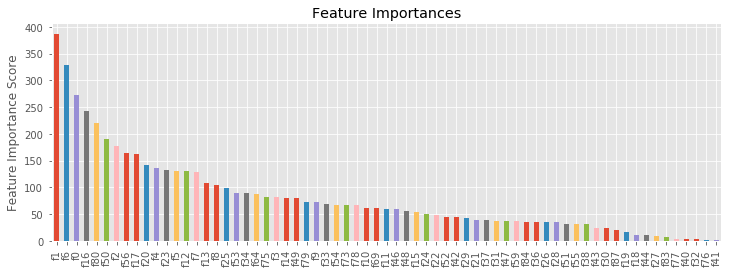

In [35]:
xgb_first = XGBClassifier(
 learning_rate =0.01,
 n_estimators=3000,
 max_depth=3,
 min_child_weight=4,
 gamma=0.35,
 subsample=0.65,
 colsample_bytree=0.75,
 reg_alpha=0.00009,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1)

predictors = [x for x in X90.columns]
count = 0

for train_index, test_index in kf.split(np_scaled_X90):
    KFold_X_train, KFold_X_test = np_scaled_X90[train_index], np_scaled_X90[test_index]
    KFold_y_train, KFold_y_test = np_y[train_index], np_y[test_index]
    
    KFold_X_train_df = pd.DataFrame(KFold_X_train.tolist())
    KFold_y_train_df = pd.DataFrame(KFold_y_train.tolist())
    KFold_X_test_df = pd.DataFrame(KFold_X_test.tolist())
    KFold_y_test_df = pd.DataFrame(KFold_y_test.tolist())
    
    modelfit(xgb_first, KFold_X_train_df, KFold_y_train_df, predictors)
    
    train_pred = xgb_first.predict_proba(KFold_X_test)
    test_pred = xgb_first.predict_proba(np_scaled_predict_X90)
                
    name = 'scaled_rawX_xgb'
    temp_name = 'temp_scaled_rawX_{}'.format(count)
    
    train_preds_df.loc[test_index,name] = train_pred[:, 1].tolist()
    temp_test_preds_df[temp_name] = test_pred[:, 1].tolist()
    count += 1
test_preds_df[name] = 0.25*temp_test_preds_df['temp_scaled_rawX_0'] + 0.25*temp_test_preds_df['temp_scaled_rawX_1'] + 0.25*temp_test_preds_df['temp_scaled_rawX_2'] + 0.25*temp_test_preds_df['temp_scaled_rawX_3']

In [36]:
from sklearn import linear_model

regr = linear_model.LogisticRegression()

count = 0
for train_index, test_index in kf.split(np_scaled_raw_X):
    KFold_X_train, KFold_X_test = np_scaled_raw_X[train_index], np_scaled_raw_X[test_index]
    KFold_y_train, KFold_y_test = np_y[train_index], np_y[test_index]

    regr.fit(KFold_X_train, KFold_y_train)
    
    train_pred = regr.predict_proba(KFold_X_test)
    test_pred = regr.predict_proba(np_scaled_rawpredict_X)
                
    name = 'scaled_X_regr'
    temp_name = 'temp_scaled_rawX_{}'.format(count)
    
    train_preds_df.loc[test_index,name] = train_pred[:, 1].tolist()
    temp_test_preds_df[temp_name] = test_pred[:, 1].tolist()
    count += 1
test_preds_df[name] = 0.25*temp_test_preds_df['temp_scaled_rawX_0'] + 0.25*temp_test_preds_df['temp_scaled_rawX_1'] + 0.25*temp_test_preds_df['temp_scaled_rawX_2'] + 0.25*temp_test_preds_df['temp_scaled_rawX_3']

In [37]:
import lightgbm as lgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=4,
                              learning_rate=0.05, n_estimators=700,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

count = 0
for train_index, test_index in kf.split(np_scaled_raw_X):
    KFold_X_train, KFold_X_test = np_scaled_raw_X[train_index], np_scaled_raw_X[test_index]
    KFold_y_train, KFold_y_test = np_y[train_index], np_y[test_index]

    model_lgb.fit(KFold_X_train, KFold_y_train)
    
    train_pred = model_lgb.predict(KFold_X_test)
    test_pred = model_lgb.predict(np_scaled_rawpredict_X)
                
    name = 'scaled_X_lgb'
    temp_name = 'temp_scaled_rawX_{}'.format(count)
    
    train_preds_df.loc[test_index,name] = train_pred#[:, 0].tolist()
    temp_test_preds_df[temp_name] = test_pred#[:, 0].tolist()
    count += 1
test_preds_df[name] = 0.25*temp_test_preds_df['temp_scaled_rawX_0'] + 0.25*temp_test_preds_df['temp_scaled_rawX_1'] + 0.25*temp_test_preds_df['temp_scaled_rawX_2'] + 0.25*temp_test_preds_df['temp_scaled_rawX_3']

In [39]:
from datetime import datetime
from sklearn.metrics import log_loss, roc_auc_score
from sklearn.model_selection import StratifiedKFold

from keras.models import load_model
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, Activation
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger, Callback
from keras.wrappers.scikit_learn import KerasClassifier

class roc_auc_callback(Callback):
    def __init__(self,training_data,validation_data):
        self.x = training_data[0]
        self.y = training_data[1]
        self.x_val = validation_data[0]
        self.y_val = validation_data[1]

    def on_train_begin(self, logs={}):
        return

    def on_train_end(self, logs={}):
        return

    def on_epoch_begin(self, epoch, logs={}):
        return

    def on_epoch_end(self, epoch, logs={}):
        y_pred = self.model.predict_proba(self.x, verbose=0)
        roc = roc_auc_score(self.y, y_pred)
        logs['roc_auc'] = roc_auc_score(self.y, y_pred)
        logs['norm_gini'] = ( roc_auc_score(self.y, y_pred) * 2 ) - 1

        y_pred_val = self.model.predict_proba(self.x_val, verbose=0)
        roc_val = roc_auc_score(self.y_val, y_pred_val)
        logs['roc_auc_val'] = roc_auc_score(self.y_val, y_pred_val)
        logs['norm_gini_val'] = ( roc_auc_score(self.y_val, y_pred_val) * 2 ) - 1

        print('\rroc_auc: %s - roc_auc_val: %s - norm_gini: %s - norm_gini_val: %s' % (str(round(roc,5)),str(round(roc_val,5)),str(round((roc*2-1),5)),str(round((roc_val*2-1),5))), end=10*' '+'\n')
        return

    def on_batch_begin(self, batch, logs={}):
        return

    def on_batch_end(self, batch, logs={}):
        return

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod(
            (datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' %
              (thour, tmin, round(tsec, 2)))

def scale_data(X, scaler=None):
    if not scaler:
        scaler = MinMaxScaler(feature_range=(-1, 1))
        scaler.fit(X)
    X = scaler.transform(X)
    return X, scaler

folds = 4
runs = 3


cv_LL = 0
cv_AUC = 0
cv_gini = 0
fpred = []
avpred = []
avreal = []
i = 0
#avids = []

patience = 20
batchsize = 32

# Let's split the data into folds. I always use the same random number for reproducibility, 
# and suggest that you do the same (you certainly don't have to use 1001).

skf = StratifiedKFold(n_splits=folds)
starttime = timer(None)
#for i, (train_index, test_index) in enumerate(skf.split(np_scaled_raw_X, np_y)):
    
    #X_train, X_val = np_scaled_raw_X[train_index], np_scaled_raw_X[test_index]
    #y_train, y_val = np_y[train_index], np_y[test_index]
    #train_ids, val_ids = tr_ids[train_index], tr_ids[test_index]
    
for train_index, test_index in kf.split(np_scaled_raw_X):
    X_train, X_val = np_scaled_raw_X[train_index], np_scaled_raw_X[test_index]
    y_train, y_val = np_y[train_index], np_y[test_index]    
    start_time = timer(None)
    count = 0
# This is where we define and compile the model. These parameters are not optimal, as they were chosen 
# to get a notebook to complete in 60 minutes. Other than leaving BatchNormalization and last sigmoid 
# activation alone, virtually everything else can be optimized: number of neurons, types of initializers, 
# activation functions, dropout values. The same goes for the optimizer at the end.

#########
# Never move this model definition to the beginning of the file or anywhere else outside of this loop. 
# The model needs to be initialized anew every time you run a different fold. If not, it will continue 
# the training from a previous model, and that is not what you want.
#########

    # This definition must be within the for loop or else it will continue training previous model
    def baseline_model():
        model = Sequential()
        model.add(Dense(200,input_dim=X_train.shape[1],kernel_initializer='glorot_normal',))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        model.add(Dense(100, kernel_initializer='glorot_normal'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.25))
        model.add(Dense(50, kernel_initializer='glorot_normal'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.15))
        model.add(Dense(25, kernel_initializer='glorot_normal'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.1))
        model.add(Dense(1, activation='sigmoid'))

        # Compile model
        model.compile(optimizer='adam', metrics = ['accuracy'], loss='binary_crossentropy')

        return model

# This is where we repeat the runs for each fold. If you choose runs=1 above, it will run a 
# regular N-fold procedure.

#########
# It is important to leave the call to random seed here, so each run starts with a different seed.
#########

    for run in range(runs):
        print('\n Fold %d - Run %d\n' % ((i + 1), (run + 1)))
        np.random.seed()

# Lots to unpack here.

# The first callback prints out roc_auc and gini values at the end of each epoch. It must be listed 
# before the EarlyStopping callback, which monitors gini values saved in the previous callback. Make 
# sure to set the mode to "max" because the default value ("auto") will not handle gini properly 
# (it will act as if the model is not improving even when roc/gini go up).

# CSVLogger creates a record of all iterations. Not really needed but it doesn't hurt to have it.

# ModelCheckpoint saves a model each time gini improves. Its mode also must be set to "max" for reasons 
# explained above.

        callbacks = [
            roc_auc_callback(training_data=(X_train, y_train),validation_data=(X_val, y_val)),  # call this before EarlyStopping
            EarlyStopping(monitor='norm_gini_val', patience=patience, mode='max', verbose=1),
            #CSVLogger('keras-5fold-run-01-v1-epochs.log', separator=',', append=False),
            ModelCheckpoint(
                    'keras-5fold-run-01-v1-fold-' + str('%02d' % (i + 1)) + '-run-' + str('%02d' % (run + 1)) + '.check',
                    monitor='norm_gini_val', mode='max', # mode must be set to max or Keras will be confused
                    save_best_only=True,
                    verbose=1)
        ]

# The classifier is defined here. Epochs should be be set to a very large number (not 3 like below) which 
# will never be reached anyway because of early stopping. I usually put 5000 there. Because why not.

        nnet = KerasClassifier(
            build_fn=baseline_model,
# Epoch needs to be set to a very large number ; early stopping will prevent it from reaching
            epochs=5000,
            batch_size=batchsize,
            validation_data=(X_val, y_val),
            verbose=2,
            shuffle=True,
            callbacks=callbacks)

        fit = nnet.fit(X_train, y_train)
        
# We want the best saved model - not the last one where the training stopped. So we delete the old 
# model instance and load the model from the last saved checkpoint. Next we predict values both for 
# validation and test data, and create a summary of parameters for each run.

        del nnet
        nnet = load_model('keras-5fold-run-01-v1-fold-' + str('%02d' % (i + 1)) + '-run-' + str('%02d' % (run + 1)) + '.check')
        scores_val_run = nnet.predict_proba(X_val, verbose=0)
        LL_run = log_loss(y_val, scores_val_run)
        print('\n Fold %d Run %d Log-loss: %.5f' % ((i + 1), (run + 1), LL_run))
        AUC_run = roc_auc_score(y_val, scores_val_run)
        print(' Fold %d Run %d AUC: %.5f' % ((i + 1), (run + 1), AUC_run))
        print(' Fold %d Run %d normalized gini: %.5f' % ((i + 1), (run + 1), AUC_run*2-1))
        y_pred_run = nnet.predict_proba(np_scaled_raw_X, verbose=0)
        if run > 0:
            scores_val = scores_val + scores_val_run
            y_pred = y_pred + y_pred_run
        else:
            scores_val = scores_val_run
            y_pred = y_pred_run
            
# We average all runs from the same fold and provide a parameter summary for each fold. Unless something 
# is wrong, the numbers printed here should be better than any of the individual runs.

    scores_val = scores_val / runs
    y_pred = y_pred / runs
    LL = log_loss(y_val, scores_val)
    print('\n Fold %d Log-loss: %.5f' % ((i + 1), LL))
    AUC = roc_auc_score(y_val, scores_val)
    print(' Fold %d AUC: %.5f' % ((i + 1), AUC))
    print(' Fold %d normalized gini: %.5f' % ((i + 1), AUC*2-1))
    timer(start_time)
    
# We add up predictions on the test data for each fold. Create out-of-fold predictions for validation data.

    train_pred = nnet.predict_proba(KFold_X_test)
    test_pred = nnet.predict_proba(np_scaled_rawpredict_X)
                
    name = 'scaled_X_nn'
    temp_name = 'temp_scaled_rawX_{}'.format(count)
    
    train_preds_df.loc[test_index,name] = train_pred.T
    temp_test_preds_df[temp_name] = test_pred.tolist()
    count += 1
    
    
    if i > 0:
        fpred = pred + y_pred
        #avreal = np.concatenate((avreal, y_val), axis=0)
        #avpred = np.concatenate((avpred, scores_val), axis=0)
    else:
        fpred = y_pred
        #avreal = y_val
        #avpred = scores_val
    pred = fpred
    cv_LL = cv_LL + LL
    cv_AUC = cv_AUC + AUC
    cv_gini = cv_gini + (AUC*2-1)
    i += 1
test_preds_df[name] = np.asarray(0.25)*temp_test_preds_df['temp_scaled_rawX_0'] + np.asarray(0.25)*temp_test_preds_df['temp_scaled_rawX_1'] + np.asarray(0.25)*temp_test_preds_df['temp_scaled_rawX_2'] + np.asarray(0.25)*temp_test_preds_df['temp_scaled_rawX_3']


 Fold 1 - Run 1

Train on 8925 samples, validate on 2975 samples
Epoch 1/5000
 - 2s - loss: 0.5120 - acc: 0.7767 - val_loss: 0.4802 - val_acc: 0.7892
roc_auc: 0.88254 - roc_auc_val: 0.87055 - norm_gini: 0.76508 - norm_gini_val: 0.74111          

Epoch 00001: norm_gini_val improved from -inf to 0.74111, saving model to keras-5fold-run-01-v1-fold-01-run-01.check
Epoch 2/5000
 - 1s - loss: 0.3676 - acc: 0.8445 - val_loss: 0.3359 - val_acc: 0.8508
roc_auc: 0.89082 - roc_auc_val: 0.87445 - norm_gini: 0.78164 - norm_gini_val: 0.74891          

Epoch 00002: norm_gini_val improved from 0.74111 to 0.74891, saving model to keras-5fold-run-01-v1-fold-01-run-01.check
Epoch 3/5000
 - 1s - loss: 0.3409 - acc: 0.8519 - val_loss: 0.3313 - val_acc: 0.8561
roc_auc: 0.8953 - roc_auc_val: 0.87832 - norm_gini: 0.79059 - norm_gini_val: 0.75664          

Epoch 00003: norm_gini_val improved from 0.74891 to 0.75664, saving model to keras-5fold-run-01-v1-fold-01-run-01.check
Epoch 4/5000
 - 1s - loss: 0.333

Epoch 2/5000
 - 1s - loss: 0.3668 - acc: 0.8421 - val_loss: 0.3718 - val_acc: 0.8461
roc_auc: 0.88265 - roc_auc_val: 0.86215 - norm_gini: 0.76529 - norm_gini_val: 0.72429          

Epoch 00002: norm_gini_val did not improve from 0.73364
Epoch 3/5000
 - 1s - loss: 0.3453 - acc: 0.8482 - val_loss: 0.3284 - val_acc: 0.8531
roc_auc: 0.89384 - roc_auc_val: 0.87874 - norm_gini: 0.78768 - norm_gini_val: 0.75747          

Epoch 00003: norm_gini_val improved from 0.73364 to 0.75747, saving model to keras-5fold-run-01-v1-fold-01-run-02.check
Epoch 4/5000
 - 1s - loss: 0.3318 - acc: 0.8541 - val_loss: 0.3286 - val_acc: 0.8545
roc_auc: 0.89947 - roc_auc_val: 0.88033 - norm_gini: 0.79894 - norm_gini_val: 0.76066          

Epoch 00004: norm_gini_val improved from 0.75747 to 0.76066, saving model to keras-5fold-run-01-v1-fold-01-run-02.check
Epoch 5/5000
 - 1s - loss: 0.3308 - acc: 0.8510 - val_loss: 0.3290 - val_acc: 0.8538
roc_auc: 0.89822 - roc_auc_val: 0.88039 - norm_gini: 0.79644 - norm_gini_

 - 1s - loss: 0.2980 - acc: 0.8678 - val_loss: 0.3319 - val_acc: 0.8534
roc_auc: 0.91137 - roc_auc_val: 0.88515 - norm_gini: 0.82273 - norm_gini_val: 0.7703          

Epoch 00034: norm_gini_val did not improve from 0.78027
Epoch 35/5000
 - 1s - loss: 0.3021 - acc: 0.8643 - val_loss: 0.3208 - val_acc: 0.8545
roc_auc: 0.91693 - roc_auc_val: 0.88621 - norm_gini: 0.83386 - norm_gini_val: 0.77243          

Epoch 00035: norm_gini_val did not improve from 0.78027
Epoch 36/5000
 - 1s - loss: 0.2982 - acc: 0.8633 - val_loss: 0.3279 - val_acc: 0.8521
roc_auc: 0.91639 - roc_auc_val: 0.88885 - norm_gini: 0.83277 - norm_gini_val: 0.7777          

Epoch 00036: norm_gini_val did not improve from 0.78027
Epoch 37/5000
 - 1s - loss: 0.3012 - acc: 0.8622 - val_loss: 0.3237 - val_acc: 0.8588
roc_auc: 0.91627 - roc_auc_val: 0.88544 - norm_gini: 0.83254 - norm_gini_val: 0.77088          

Epoch 00037: norm_gini_val did not improve from 0.78027
Epoch 38/5000
 - 1s - loss: 0.2968 - acc: 0.8670 - val_loss:

roc_auc: 0.91103 - roc_auc_val: 0.88052 - norm_gini: 0.82207 - norm_gini_val: 0.76103          

Epoch 00021: norm_gini_val did not improve from 0.77200
Epoch 22/5000
 - 1s - loss: 0.3074 - acc: 0.8625 - val_loss: 0.3229 - val_acc: 0.8561
roc_auc: 0.91227 - roc_auc_val: 0.88678 - norm_gini: 0.82454 - norm_gini_val: 0.77356          

Epoch 00022: norm_gini_val improved from 0.77200 to 0.77356, saving model to keras-5fold-run-01-v1-fold-01-run-03.check
Epoch 23/5000
 - 1s - loss: 0.3045 - acc: 0.8602 - val_loss: 0.3201 - val_acc: 0.8608
roc_auc: 0.91158 - roc_auc_val: 0.88936 - norm_gini: 0.82317 - norm_gini_val: 0.77872          

Epoch 00023: norm_gini_val improved from 0.77356 to 0.77872, saving model to keras-5fold-run-01-v1-fold-01-run-03.check
Epoch 24/5000
 - 1s - loss: 0.3090 - acc: 0.8577 - val_loss: 0.3271 - val_acc: 0.8534
roc_auc: 0.90891 - roc_auc_val: 0.88844 - norm_gini: 0.81782 - norm_gini_val: 0.77687          

Epoch 00024: norm_gini_val did not improve from 0.77872
Ep

 - 1s - loss: 0.3108 - acc: 0.8603 - val_loss: 0.3442 - val_acc: 0.8413
roc_auc: 0.89712 - roc_auc_val: 0.90216 - norm_gini: 0.79424 - norm_gini_val: 0.80431          

Epoch 00009: norm_gini_val improved from 0.80011 to 0.80431, saving model to keras-5fold-run-01-v1-fold-02-run-01.check
Epoch 10/5000
 - 1s - loss: 0.3130 - acc: 0.8582 - val_loss: 0.3580 - val_acc: 0.8336
roc_auc: 0.89823 - roc_auc_val: 0.90064 - norm_gini: 0.79646 - norm_gini_val: 0.80128          

Epoch 00010: norm_gini_val did not improve from 0.80431
Epoch 11/5000
 - 1s - loss: 0.3129 - acc: 0.8621 - val_loss: 0.3455 - val_acc: 0.8339
roc_auc: 0.89631 - roc_auc_val: 0.90076 - norm_gini: 0.79263 - norm_gini_val: 0.80153          

Epoch 00011: norm_gini_val did not improve from 0.80431
Epoch 12/5000
 - 1s - loss: 0.3108 - acc: 0.8613 - val_loss: 0.3534 - val_acc: 0.8319
roc_auc: 0.89344 - roc_auc_val: 0.89712 - norm_gini: 0.78688 - norm_gini_val: 0.79423          

Epoch 00012: norm_gini_val did not improve from 0.

 - 1s - loss: 0.3137 - acc: 0.8611 - val_loss: 0.3653 - val_acc: 0.8343
roc_auc: 0.89396 - roc_auc_val: 0.89792 - norm_gini: 0.78791 - norm_gini_val: 0.79583          

Epoch 00007: norm_gini_val improved from 0.79465 to 0.79583, saving model to keras-5fold-run-01-v1-fold-02-run-02.check
Epoch 8/5000
 - 1s - loss: 0.3118 - acc: 0.8580 - val_loss: 0.3531 - val_acc: 0.8289
roc_auc: 0.89458 - roc_auc_val: 0.89689 - norm_gini: 0.78917 - norm_gini_val: 0.79378          

Epoch 00008: norm_gini_val did not improve from 0.79583
Epoch 9/5000
 - 1s - loss: 0.3140 - acc: 0.8604 - val_loss: 0.3669 - val_acc: 0.8329
roc_auc: 0.89601 - roc_auc_val: 0.89499 - norm_gini: 0.79202 - norm_gini_val: 0.78999          

Epoch 00009: norm_gini_val did not improve from 0.79583
Epoch 10/5000
 - 1s - loss: 0.3109 - acc: 0.8617 - val_loss: 0.3475 - val_acc: 0.8373
roc_auc: 0.89453 - roc_auc_val: 0.89268 - norm_gini: 0.78905 - norm_gini_val: 0.78535          

Epoch 00010: norm_gini_val did not improve from 0.79

roc_auc: 0.91124 - roc_auc_val: 0.89947 - norm_gini: 0.82249 - norm_gini_val: 0.79895          

Epoch 00040: norm_gini_val did not improve from 0.80195
Epoch 41/5000
 - 1s - loss: 0.2880 - acc: 0.8697 - val_loss: 0.3619 - val_acc: 0.8440
roc_auc: 0.91052 - roc_auc_val: 0.90202 - norm_gini: 0.82103 - norm_gini_val: 0.80404          

Epoch 00041: norm_gini_val improved from 0.80195 to 0.80404, saving model to keras-5fold-run-01-v1-fold-02-run-02.check
Epoch 42/5000
 - 1s - loss: 0.2951 - acc: 0.8680 - val_loss: 0.3990 - val_acc: 0.8333
roc_auc: 0.90748 - roc_auc_val: 0.8947 - norm_gini: 0.81497 - norm_gini_val: 0.7894          

Epoch 00042: norm_gini_val did not improve from 0.80404
Epoch 43/5000
 - 1s - loss: 0.2905 - acc: 0.8709 - val_loss: 0.3834 - val_acc: 0.8316
roc_auc: 0.91214 - roc_auc_val: 0.89576 - norm_gini: 0.82428 - norm_gini_val: 0.79152          

Epoch 00043: norm_gini_val did not improve from 0.80404
Epoch 44/5000
 - 1s - loss: 0.2897 - acc: 0.8708 - val_loss: 0.3900 

 - 1s - loss: 0.3089 - acc: 0.8651 - val_loss: 0.3592 - val_acc: 0.8292
roc_auc: 0.89817 - roc_auc_val: 0.90138 - norm_gini: 0.79634 - norm_gini_val: 0.80276          

Epoch 00011: norm_gini_val improved from 0.80202 to 0.80276, saving model to keras-5fold-run-01-v1-fold-02-run-03.check
Epoch 12/5000
 - 1s - loss: 0.3076 - acc: 0.8599 - val_loss: 0.4172 - val_acc: 0.8198
roc_auc: 0.89629 - roc_auc_val: 0.90072 - norm_gini: 0.79258 - norm_gini_val: 0.80143          

Epoch 00012: norm_gini_val did not improve from 0.80276
Epoch 13/5000
 - 1s - loss: 0.3083 - acc: 0.8604 - val_loss: 0.3620 - val_acc: 0.8292
roc_auc: 0.90169 - roc_auc_val: 0.90013 - norm_gini: 0.80339 - norm_gini_val: 0.80027          

Epoch 00013: norm_gini_val did not improve from 0.80276
Epoch 14/5000
 - 1s - loss: 0.3095 - acc: 0.8621 - val_loss: 0.4066 - val_acc: 0.8299
roc_auc: 0.89713 - roc_auc_val: 0.89761 - norm_gini: 0.79427 - norm_gini_val: 0.79522          

Epoch 00014: norm_gini_val did not improve from 0.

 - 1s - loss: 0.3801 - acc: 0.8255 - val_loss: 0.2352 - val_acc: 0.9049
roc_auc: 0.88616 - roc_auc_val: 0.89142 - norm_gini: 0.77233 - norm_gini_val: 0.78284          

Epoch 00003: norm_gini_val did not improve from 0.78408
Epoch 4/5000
 - 1s - loss: 0.3681 - acc: 0.8341 - val_loss: 0.2476 - val_acc: 0.9025
roc_auc: 0.89063 - roc_auc_val: 0.89452 - norm_gini: 0.78125 - norm_gini_val: 0.78905          

Epoch 00004: norm_gini_val improved from 0.78408 to 0.78905, saving model to keras-5fold-run-01-v1-fold-03-run-01.check
Epoch 5/5000
 - 1s - loss: 0.3650 - acc: 0.8335 - val_loss: 0.2528 - val_acc: 0.9018
roc_auc: 0.89101 - roc_auc_val: 0.89473 - norm_gini: 0.78201 - norm_gini_val: 0.78946          

Epoch 00005: norm_gini_val improved from 0.78905 to 0.78946, saving model to keras-5fold-run-01-v1-fold-03-run-01.check
Epoch 6/5000
 - 1s - loss: 0.3591 - acc: 0.8351 - val_loss: 0.2327 - val_acc: 0.9089
roc_auc: 0.89269 - roc_auc_val: 0.89628 - norm_gini: 0.78537 - norm_gini_val: 0.79256 

roc_auc: 0.90436 - roc_auc_val: 0.89751 - norm_gini: 0.80871 - norm_gini_val: 0.79502          

Epoch 00035: norm_gini_val did not improve from 0.80103
Epoch 36/5000
 - 1s - loss: 0.3306 - acc: 0.8484 - val_loss: 0.2478 - val_acc: 0.9055
roc_auc: 0.90794 - roc_auc_val: 0.89596 - norm_gini: 0.81589 - norm_gini_val: 0.79192          

Epoch 00036: norm_gini_val did not improve from 0.80103
Epoch 37/5000
 - 1s - loss: 0.3288 - acc: 0.8501 - val_loss: 0.2404 - val_acc: 0.9039
roc_auc: 0.91055 - roc_auc_val: 0.89465 - norm_gini: 0.8211 - norm_gini_val: 0.78931          

Epoch 00037: norm_gini_val did not improve from 0.80103
Epoch 38/5000
 - 1s - loss: 0.3309 - acc: 0.8502 - val_loss: 0.2518 - val_acc: 0.8995
roc_auc: 0.91056 - roc_auc_val: 0.89747 - norm_gini: 0.82112 - norm_gini_val: 0.79494          

Epoch 00038: norm_gini_val did not improve from 0.80103
Epoch 39/5000
 - 1s - loss: 0.3266 - acc: 0.8503 - val_loss: 0.2358 - val_acc: 0.9032
roc_auc: 0.90941 - roc_auc_val: 0.89337 - nor

 - 1s - loss: 0.3403 - acc: 0.8444 - val_loss: 0.2413 - val_acc: 0.9012
roc_auc: 0.90118 - roc_auc_val: 0.897 - norm_gini: 0.80235 - norm_gini_val: 0.794          

Epoch 00014: norm_gini_val did not improve from 0.79624
Epoch 15/5000
 - 1s - loss: 0.3402 - acc: 0.8419 - val_loss: 0.2420 - val_acc: 0.9079
roc_auc: 0.90329 - roc_auc_val: 0.89627 - norm_gini: 0.80658 - norm_gini_val: 0.79254          

Epoch 00015: norm_gini_val did not improve from 0.79624
Epoch 16/5000
 - 1s - loss: 0.3390 - acc: 0.8434 - val_loss: 0.2337 - val_acc: 0.9059
roc_auc: 0.90144 - roc_auc_val: 0.89265 - norm_gini: 0.80288 - norm_gini_val: 0.78531          

Epoch 00016: norm_gini_val did not improve from 0.79624
Epoch 17/5000
 - 1s - loss: 0.3429 - acc: 0.8409 - val_loss: 0.2363 - val_acc: 0.9042
roc_auc: 0.90165 - roc_auc_val: 0.89683 - norm_gini: 0.80329 - norm_gini_val: 0.79365          

Epoch 00017: norm_gini_val did not improve from 0.79624
Epoch 18/5000
 - 1s - loss: 0.3388 - acc: 0.8446 - val_loss: 0

 - 1s - loss: 0.3252 - acc: 0.8505 - val_loss: 0.2398 - val_acc: 0.9039
roc_auc: 0.91638 - roc_auc_val: 0.8932 - norm_gini: 0.83276 - norm_gini_val: 0.7864          

Epoch 00048: norm_gini_val did not improve from 0.80317
Epoch 49/5000
 - 1s - loss: 0.3252 - acc: 0.8512 - val_loss: 0.2306 - val_acc: 0.9055
roc_auc: 0.91483 - roc_auc_val: 0.89072 - norm_gini: 0.82966 - norm_gini_val: 0.78144          

Epoch 00049: norm_gini_val did not improve from 0.80317
Epoch 50/5000
 - 1s - loss: 0.3285 - acc: 0.8480 - val_loss: 0.2312 - val_acc: 0.9086
roc_auc: 0.91569 - roc_auc_val: 0.89135 - norm_gini: 0.83139 - norm_gini_val: 0.7827          

Epoch 00050: norm_gini_val did not improve from 0.80317
Epoch 51/5000
 - 1s - loss: 0.3219 - acc: 0.8486 - val_loss: 0.2441 - val_acc: 0.8998
roc_auc: 0.91522 - roc_auc_val: 0.89117 - norm_gini: 0.83044 - norm_gini_val: 0.78235          

Epoch 00051: norm_gini_val did not improve from 0.80317
Epoch 00051: early stopping

 Fold 3 Run 2 Log-loss: 0.22594


 - 1s - loss: 0.3300 - acc: 0.8489 - val_loss: 0.2390 - val_acc: 0.9042
roc_auc: 0.90934 - roc_auc_val: 0.89446 - norm_gini: 0.81868 - norm_gini_val: 0.78893          

Epoch 00029: norm_gini_val did not improve from 0.79958
Epoch 30/5000
 - 1s - loss: 0.3350 - acc: 0.8456 - val_loss: 0.2444 - val_acc: 0.9055
roc_auc: 0.90391 - roc_auc_val: 0.88854 - norm_gini: 0.80781 - norm_gini_val: 0.77709          

Epoch 00030: norm_gini_val did not improve from 0.79958
Epoch 31/5000
 - 1s - loss: 0.3306 - acc: 0.8471 - val_loss: 0.2342 - val_acc: 0.9086
roc_auc: 0.91032 - roc_auc_val: 0.89537 - norm_gini: 0.82064 - norm_gini_val: 0.79074          

Epoch 00031: norm_gini_val did not improve from 0.79958
Epoch 00031: early stopping

 Fold 3 Run 3 Log-loss: 0.22954
 Fold 3 Run 3 AUC: 0.89979
 Fold 3 Run 3 normalized gini: 0.79958

 Fold 3 Log-loss: 0.22633
 Fold 3 AUC: 0.90317
 Fold 3 normalized gini: 0.80634

 Time taken: 0 hours 4 minutes and 32.1 seconds.

 Fold 4 - Run 1

Train on 8925 samples

 - 1s - loss: 0.2996 - acc: 0.8694 - val_loss: 0.3461 - val_acc: 0.8407
roc_auc: 0.91843 - roc_auc_val: 0.86914 - norm_gini: 0.83685 - norm_gini_val: 0.73828          

Epoch 00029: norm_gini_val improved from 0.73447 to 0.73828, saving model to keras-5fold-run-01-v1-fold-04-run-01.check
Epoch 30/5000
 - 1s - loss: 0.2989 - acc: 0.8622 - val_loss: 0.3607 - val_acc: 0.8309
roc_auc: 0.91366 - roc_auc_val: 0.86065 - norm_gini: 0.82731 - norm_gini_val: 0.72131          

Epoch 00030: norm_gini_val did not improve from 0.73828
Epoch 31/5000
 - 1s - loss: 0.2954 - acc: 0.8639 - val_loss: 0.3475 - val_acc: 0.8397
roc_auc: 0.91951 - roc_auc_val: 0.86858 - norm_gini: 0.83901 - norm_gini_val: 0.73717          

Epoch 00031: norm_gini_val did not improve from 0.73828
Epoch 32/5000
 - 1s - loss: 0.2959 - acc: 0.8654 - val_loss: 0.3518 - val_acc: 0.8390
roc_auc: 0.91625 - roc_auc_val: 0.86765 - norm_gini: 0.83251 - norm_gini_val: 0.7353          

Epoch 00032: norm_gini_val did not improve from 0.7

roc_auc: 0.91076 - roc_auc_val: 0.86212 - norm_gini: 0.82152 - norm_gini_val: 0.72425          

Epoch 00011: norm_gini_val did not improve from 0.72642
Epoch 12/5000
 - 1s - loss: 0.3087 - acc: 0.8632 - val_loss: 0.3487 - val_acc: 0.8424
roc_auc: 0.91098 - roc_auc_val: 0.86313 - norm_gini: 0.82196 - norm_gini_val: 0.72626          

Epoch 00012: norm_gini_val did not improve from 0.72642
Epoch 13/5000
 - 2s - loss: 0.3078 - acc: 0.8614 - val_loss: 0.3603 - val_acc: 0.8353
roc_auc: 0.90872 - roc_auc_val: 0.86327 - norm_gini: 0.81744 - norm_gini_val: 0.72654          

Epoch 00013: norm_gini_val improved from 0.72642 to 0.72654, saving model to keras-5fold-run-01-v1-fold-04-run-02.check
Epoch 14/5000
 - 2s - loss: 0.3016 - acc: 0.8664 - val_loss: 0.3512 - val_acc: 0.8373
roc_auc: 0.91207 - roc_auc_val: 0.86381 - norm_gini: 0.82414 - norm_gini_val: 0.72762          

Epoch 00014: norm_gini_val improved from 0.72654 to 0.72762, saving model to keras-5fold-run-01-v1-fold-04-run-02.check
Ep

 - 2s - loss: 0.2875 - acc: 0.8726 - val_loss: 0.3536 - val_acc: 0.8316
roc_auc: 0.92019 - roc_auc_val: 0.86603 - norm_gini: 0.84038 - norm_gini_val: 0.73205          

Epoch 00044: norm_gini_val did not improve from 0.73447
Epoch 45/5000
 - 2s - loss: 0.2933 - acc: 0.8667 - val_loss: 0.3499 - val_acc: 0.8407
roc_auc: 0.92318 - roc_auc_val: 0.86814 - norm_gini: 0.84636 - norm_gini_val: 0.73627          

Epoch 00045: norm_gini_val improved from 0.73447 to 0.73627, saving model to keras-5fold-run-01-v1-fold-04-run-02.check
Epoch 46/5000
 - 1s - loss: 0.2899 - acc: 0.8722 - val_loss: 0.3504 - val_acc: 0.8407
roc_auc: 0.92257 - roc_auc_val: 0.86265 - norm_gini: 0.84514 - norm_gini_val: 0.72531          

Epoch 00046: norm_gini_val did not improve from 0.73627
Epoch 47/5000
 - 2s - loss: 0.2887 - acc: 0.8701 - val_loss: 0.3541 - val_acc: 0.8430
roc_auc: 0.92252 - roc_auc_val: 0.86497 - norm_gini: 0.84504 - norm_gini_val: 0.72993          

Epoch 00047: norm_gini_val did not improve from 0.

roc_auc: 0.90879 - roc_auc_val: 0.86348 - norm_gini: 0.81759 - norm_gini_val: 0.72696          

Epoch 00010: norm_gini_val did not improve from 0.73282
Epoch 11/5000
 - 2s - loss: 0.3083 - acc: 0.8602 - val_loss: 0.3482 - val_acc: 0.8403
roc_auc: 0.91097 - roc_auc_val: 0.86226 - norm_gini: 0.82194 - norm_gini_val: 0.72452          

Epoch 00011: norm_gini_val did not improve from 0.73282
Epoch 12/5000
 - 2s - loss: 0.3089 - acc: 0.8578 - val_loss: 0.3560 - val_acc: 0.8360
roc_auc: 0.90988 - roc_auc_val: 0.86031 - norm_gini: 0.81977 - norm_gini_val: 0.72063          

Epoch 00012: norm_gini_val did not improve from 0.73282
Epoch 13/5000
 - 2s - loss: 0.3026 - acc: 0.8639 - val_loss: 0.3589 - val_acc: 0.8326
roc_auc: 0.91181 - roc_auc_val: 0.86056 - norm_gini: 0.82363 - norm_gini_val: 0.72112          

Epoch 00013: norm_gini_val did not improve from 0.73282
Epoch 14/5000
 - 2s - loss: 0.3017 - acc: 0.8639 - val_loss: 0.3672 - val_acc: 0.8407
roc_auc: 0.9128 - roc_auc_val: 0.86327 - nor

roc_auc: 0.92074 - roc_auc_val: 0.86625 - norm_gini: 0.84147 - norm_gini_val: 0.73249          

Epoch 00044: norm_gini_val did not improve from 0.73491
Epoch 45/5000
 - 2s - loss: 0.2884 - acc: 0.8672 - val_loss: 0.3514 - val_acc: 0.8413
roc_auc: 0.92431 - roc_auc_val: 0.86558 - norm_gini: 0.84862 - norm_gini_val: 0.73116          

Epoch 00045: norm_gini_val did not improve from 0.73491
Epoch 46/5000
 - 2s - loss: 0.2864 - acc: 0.8707 - val_loss: 0.3505 - val_acc: 0.8363
roc_auc: 0.92288 - roc_auc_val: 0.86285 - norm_gini: 0.84577 - norm_gini_val: 0.72569          

Epoch 00046: norm_gini_val did not improve from 0.73491
Epoch 47/5000
 - 2s - loss: 0.2891 - acc: 0.8718 - val_loss: 0.3523 - val_acc: 0.8437
roc_auc: 0.92349 - roc_auc_val: 0.85959 - norm_gini: 0.84697 - norm_gini_val: 0.71918          

Epoch 00047: norm_gini_val did not improve from 0.73491
Epoch 48/5000
 - 2s - loss: 0.2875 - acc: 0.8681 - val_loss: 0.3524 - val_acc: 0.8390
roc_auc: 0.92201 - roc_auc_val: 0.86454 - no

In [106]:
test_preds_scaled_plus_kpred_df.head()

,scaled_X90_k1,scaled_X90_k3,scaled_X90_k7,scaled_X45_k1,scaled_X45_k3,scaled_X45_k7,scaled_rawX_k1,scaled_rawX_k3,scaled_rawX_k7,scaled_rawX_rf,...,TRANSACTION_relAMT_month_11,"C(CreditLimit_cat)[T.[30000, 40000)]","C(CreditLimit_cat)[T.[40000, 50000)]",TRANSACTION_logAMT_month_1,TRANSACTION_relAMT_month_7,"C(CreditLimit_cat)[T.[60000, 70000)]","C(CreditLimit_cat)[T.[80000, 90000)]",TRANSACTION_relAMT_month_10,"C(CreditLimit_cat)[T.[70000, 80000)]","C(CreditLimit_cat)[T.[50000, 60000)]"
0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.014050,...,0.094580,0.0,0.0,0.0,0.070319,0.0,0.0,0.097030,0.0,0.0
1,0.0,0.000000,0.071429,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.008892,...,0.067919,0.0,0.0,0.0,0.086669,0.0,0.0,0.018088,0.0,0.0
2,0.0,0.083333,0.214286,0.0,0.0,0.035714,0.00,0.083333,0.142857,0.053366,...,0.070379,0.0,0.0,0.0,0.051178,0.0,0.0,0.052837,0.0,0.0
3,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.044550,...,0.000000,0.0,0.0,0.0,0.116319,0.0,0.0,0.269638,0.0,0.0
4,0.0,0.250000,0.142857,0.0,0.0,0.107143,0.75,0.250000,0.178571,0.097735,...,0.044148,0.0,0.0,0.0,0.252020,0.0,0.0,0.027296,0.0,0.0


In [137]:
np_scaled_predict_X90_df = pd.DataFrame(np_scaled_predict_X90)
np_scaled_predict_X90_df.columns = list(X.iloc[:,top_indices90].columns.values)

test_preds_scaled_plus_kpred_df = pd.merge(test_preds_df, np_scaled_predict_X90_df, left_index=True, right_index=True)

X90_df = pd.DataFrame(np_scaled_X90)
X90_df.columns = list(X.iloc[:,top_indices90].columns.values)

scaled_X90_plus_kpred_df = pd.merge(train_preds_df, X90_df, left_index=True, right_index=True)

#test_preds_scaled_plus_kpred_df
#scaled_X45_plus_kpred_df.scaled_rawX_xgb

#del np_scaled_predict_X90_df


[0]	train-auc:0.889619+0.00122535	test-auc:0.884997+0.00803727
[1]	train-auc:0.89406+0.00210537	test-auc:0.889549+0.00595342
[2]	train-auc:0.895834+0.00150187	test-auc:0.890906+0.00561098
[3]	train-auc:0.896145+0.00150344	test-auc:0.891036+0.00530405
[4]	train-auc:0.896992+0.0015799	test-auc:0.891423+0.0053626
[5]	train-auc:0.897344+0.00153857	test-auc:0.891809+0.00509015
[6]	train-auc:0.897179+0.0013012	test-auc:0.891758+0.00498266
[7]	train-auc:0.897531+0.00123601	test-auc:0.892369+0.00542032
[8]	train-auc:0.897667+0.00131324	test-auc:0.892462+0.00536234
[9]	train-auc:0.897931+0.00131826	test-auc:0.892846+0.00503343
[10]	train-auc:0.89817+0.00118642	test-auc:0.89333+0.00497692
[11]	train-auc:0.898236+0.00126055	test-auc:0.893482+0.00500238
[12]	train-auc:0.898313+0.00129035	test-auc:0.893468+0.00488786
[13]	train-auc:0.898365+0.0012882	test-auc:0.893409+0.00489649
[14]	train-auc:0.898368+0.00129982	test-auc:0.89355+0.00474615
[15]	train-auc:0.898512+0.00122839	test-auc:0.893419+0.004

[128]	train-auc:0.90302+0.00081712	test-auc:0.89469+0.00501535
[129]	train-auc:0.903071+0.000822953	test-auc:0.89477+0.00506155
[130]	train-auc:0.903112+0.000822653	test-auc:0.89509+0.00517388
[131]	train-auc:0.903129+0.000814254	test-auc:0.895101+0.00520612
[132]	train-auc:0.903144+0.000823008	test-auc:0.895086+0.0052121
[133]	train-auc:0.903149+0.000818766	test-auc:0.895057+0.00523331
[134]	train-auc:0.903152+0.000815002	test-auc:0.89506+0.00522617
[135]	train-auc:0.903189+0.000812836	test-auc:0.895045+0.00523492
[136]	train-auc:0.903225+0.000809942	test-auc:0.895091+0.00518753
[137]	train-auc:0.903238+0.000808583	test-auc:0.895112+0.00517584
[138]	train-auc:0.903254+0.000796898	test-auc:0.895091+0.00516178
[139]	train-auc:0.903296+0.000810544	test-auc:0.895067+0.00513443
[140]	train-auc:0.903373+0.000777705	test-auc:0.89504+0.00513514
[141]	train-auc:0.903379+0.000789559	test-auc:0.895052+0.0051257
[142]	train-auc:0.903415+0.000790793	test-auc:0.895036+0.00513154
[143]	train-auc:0.9

[254]	train-auc:0.906016+0.00107938	test-auc:0.895586+0.00494488
[255]	train-auc:0.906038+0.00108762	test-auc:0.895595+0.00493195
[256]	train-auc:0.906056+0.00109428	test-auc:0.895565+0.00494445
[257]	train-auc:0.906086+0.00110567	test-auc:0.895606+0.00488071
[258]	train-auc:0.906116+0.00110327	test-auc:0.895585+0.0048734
[259]	train-auc:0.906141+0.00110118	test-auc:0.895558+0.00488118
[260]	train-auc:0.906156+0.00110421	test-auc:0.895552+0.00490453
[261]	train-auc:0.90618+0.0011057	test-auc:0.895572+0.00492676
[262]	train-auc:0.906218+0.0011159	test-auc:0.895545+0.00490579
[263]	train-auc:0.90623+0.00111226	test-auc:0.895564+0.00489706
[264]	train-auc:0.906256+0.00111716	test-auc:0.895548+0.00490609
[265]	train-auc:0.906265+0.001117	test-auc:0.895542+0.00491344
[266]	train-auc:0.906284+0.00111791	test-auc:0.895538+0.00492213
[267]	train-auc:0.906309+0.00112587	test-auc:0.89557+0.00494469


c:\users\marcp\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Model best iteration : 219 with an auc score of : 0.8959208000000001
Accuracy : 0.8661344537815127
AUC Score (Train): 0.9034110734861696


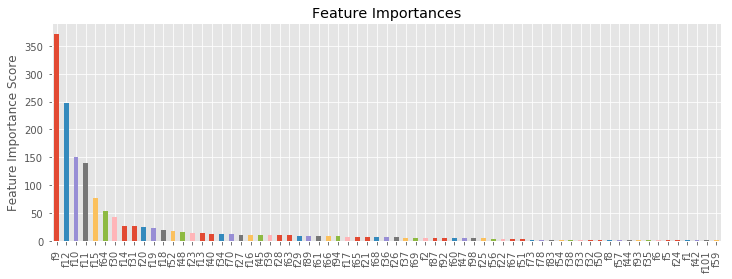

In [172]:
xgb_k_scaledX90 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=3000,
 max_depth=3,
 min_child_weight=4,
 gamma=0.3,
 subsample=0.65,
 colsample_bytree=0.75,
 reg_alpha=0.00009,
 objective= 'binary:logistic',
 nthread=2,
 scale_pos_weight=1)

modelfit(xgb_k_scaledX90, scaled_X90_plus_kpred_df, y, predictors)

In [42]:
soumission12 = xgb_k_scaledX45.predict_proba(test_preds_scaled_plus_kpred_df.values)

np.savetxt("Sub_12.csv", xgb_k_scaledX45.columns, delimiter=",")

In [193]:
feat_list = list(feat_imp.index.str.replace('f',''))
new_feat_list = [int(x)+1 for x in feat_list]

In [194]:
test_preds_scaled_plus_kpred_df.columns.get_values()[[new_feat_list]]


array(['scaled_rawX_xgb', 'scaled_X_nn', 'scaled_X_regr', 'scaled_X_lgb',
       'CurrentTotalBalance_rel_month_9', 'TRANSACTION_logAMT_month_10',
       'CurrentTotalBalance_rel_month_1',
       'CurrentTotalBalance_rel_month_13', 'DelqCycle_month_11',
       'CurrentTotalBalance_rel_month_7', 'DelqCycle_std',
       'CurrentTotalBalance_rel_month_8', 'DelqCycle_month_2',
       'DelqCycle_month_3', 'CurrentTotalBalance_rel_month_6',
       'CurrentTotalBalance_rel_month_12', 'DelqCycle_month_8',
       'DelqCycle_month_9', 'CurrentTotalBalance_sign_month_12',
       'CurrentTotalBalance_rel_month_3',
       'CurrentTotalBalance_rel_month_11', 'DelqCycle_month_7',
       'CurrentTotalBalance_log_month_11',
       'CurrentTotalBalance_rel_month_2', 'TRANSACTION_relAMT_month_13',
       'TRANSACTION_logAMT_month_13',
       'C(CreditLimit_cat)[T.[20000, 30000)]',
       'TRANSACTION_logAMT_month_7', 'TRANSACTION_logAMT_month_2',
       'C(CreditLimit_cat)[T.[30000, 40000)]',
       'Cur

In [145]:
#feat_imprtance = xgb_k_scaledX90.get_booster().get_score(importance_type='weight').sort_values(ascending=False)
test_preds_scaled_plus_kpred_df.columns.get_values()[[feat_imp]]

IndexError: index 372 is out of bounds for axis 1 with size 104

In [98]:
np_scaled_predict_X90_df.head()

,0,1,2,3,4,5,6,7,8,9,...,TRANSACTION_relAMT_month_11,"C(CreditLimit_cat)[T.[30000, 40000)]","C(CreditLimit_cat)[T.[40000, 50000)]",TRANSACTION_logAMT_month_1,TRANSACTION_relAMT_month_7,"C(CreditLimit_cat)[T.[60000, 70000)]","C(CreditLimit_cat)[T.[80000, 90000)]",TRANSACTION_relAMT_month_10,"C(CreditLimit_cat)[T.[70000, 80000)]","C(CreditLimit_cat)[T.[50000, 60000)]"
0,0.043633,0.025436,0.062999,0.041772,0.048274,0.151397,0.0,0.109058,0.0,0.0,...,0.094580,0.0,0.0,0.0,0.070319,0.0,0.0,0.097030,0.0,0.0
1,0.033057,0.030712,0.004601,0.011682,0.018198,0.017691,0.0,0.052618,0.0,0.0,...,0.067919,0.0,0.0,0.0,0.086669,0.0,0.0,0.018088,0.0,0.0
2,0.113044,0.082782,0.112237,0.086186,0.101112,0.131079,0.0,0.252101,0.0,0.0,...,0.070379,0.0,0.0,0.0,0.051178,0.0,0.0,0.052837,0.0,0.0
3,0.001131,0.000805,0.000182,0.002380,0.019078,0.010551,0.0,0.009433,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.116319,0.0,0.0,0.269638,0.0,0.0
4,0.109279,0.089882,0.166314,0.099849,0.136433,0.157440,0.0,0.349362,0.0,0.0,...,0.044148,0.0,0.0,0.0,0.252020,0.0,0.0,0.027296,0.0,0.0


In [63]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(np_scaled_raw_X)
    rmse= np.sqrt(-cross_val_score(model, np_scaled_raw_X, np_y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [ ]:
from sklearn.metrics import mean_squared_error



In [85]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=4,
                              learning_rate=0.05, n_estimators=700,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

model_lgb.fit(np_scaled_raw_X, np_y)



score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.3092 (0.0297)



In [93]:
import lightgbm as lgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=4,
                              learning_rate=0.05, n_estimators=700,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

count = 0
for train_index, test_index in kf.split(np_scaled_raw_X):
    KFold_X_train, KFold_X_test = np_scaled_raw_X[train_index], np_scaled_raw_X[test_index]
    KFold_y_train, KFold_y_test = np_y[train_index], np_y[test_index]

    model_lgb.fit(KFold_X_train, KFold_y_train)
    
    train_pred = model_lgb.predict(KFold_X_test)
    test_pred = model_lgb.predict(np_scaled_rawpredict_X)
                
    name = 'scaled_X_lgb'
    temp_name = 'temp_scaled_rawX_{}'.format(count)
    
    train_preds_df.loc[test_index,name] = train_pred#[:, 0].tolist()
    temp_test_preds_df[temp_name] = test_pred#[:, 0].tolist()
    count += 1
test_preds_df[name] = 0.25*temp_test_preds_df['temp_scaled_rawX_0'] + 0.25*temp_test_preds_df['temp_scaled_rawX_1'] + 0.25*temp_test_preds_df['temp_scaled_rawX_2'] + 0.25*temp_test_preds_df['temp_scaled_rawX_3']

In [53]:
from sklearn import linear_model

regr = linear_model.LogisticRegression()

count = 0
for train_index, test_index in kf.split(np_scaled_raw_X):
    KFold_X_train, KFold_X_test = np_scaled_raw_X[train_index], np_scaled_raw_X[test_index]
    KFold_y_train, KFold_y_test = np_y[train_index], np_y[test_index]

    regr.fit(KFold_X_train, KFold_y_train)
    
    train_pred = regr.predict_proba(KFold_X_test)
    test_pred = regr.predict_proba(np_scaled_rawpredict_X)
                
    name = 'scaled_X_regr'
    temp_name = 'temp_scaled_rawX_{}'.format(count)
    
    train_preds_df.loc[test_index,name] = train_pred[:, 1].tolist()
    temp_test_preds_df[temp_name] = test_pred[:, 1].tolist()
    count += 1
test_preds_df[name] = 0.25*temp_test_preds_df['temp_scaled_rawX_0'] + 0.25*temp_test_preds_df['temp_scaled_rawX_1'] + 0.25*temp_test_preds_df['temp_scaled_rawX_2'] + 0.25*temp_test_preds_df['temp_scaled_rawX_3']

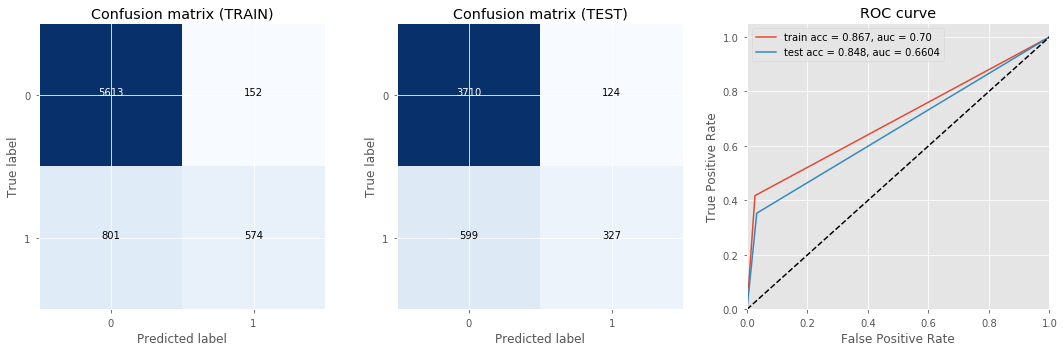

In [1216]:
from sklearn.neighbors import KNeighborsClassifier

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=16)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

threshold = 0.5

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

plot_cm(ax[0],  y_train, y_train_pred, [0,1], 'Confusion matrix (TRAIN)', threshold)
plot_cm(ax[1],  y_test, y_test_pred,   [0,1], 'Confusion matrix (TEST)', threshold)
plot_auc(ax[2], y_train, y_train_pred, y_test, y_test_pred, threshold)
    
plt.tight_layout()
plt.show()

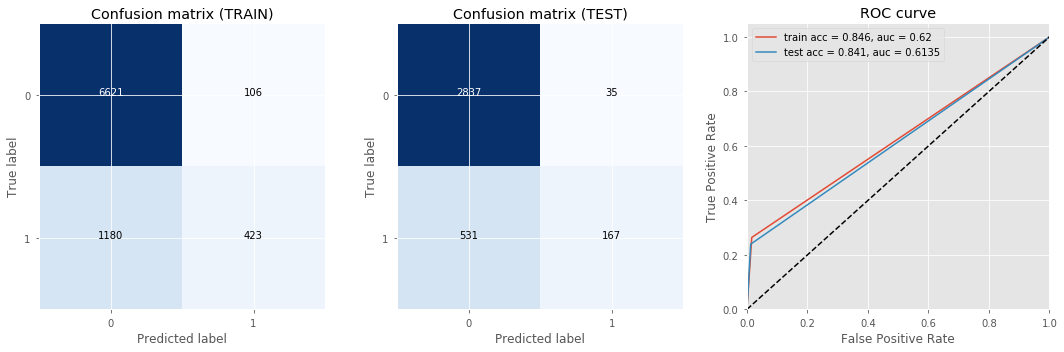

In [1229]:
#RAW KNN NEIGHBORS
# instantiate learning model (k = neighbors I want)
rawknn = KNeighborsClassifier(n_neighbors=16)

# fitting the model
rawknn.fit(rawX_train, rawy_train)

# predict the response
pred = rawknn.predict(rawX_test)

y_train_pred = rawknn.predict(rawX_train)
y_test_pred = rawknn.predict(rawX_test)

threshold = 0.5

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

plot_cm(ax[0],  rawy_train, y_train_pred, [0,1], 'Confusion matrix (TRAIN)', threshold)
plot_cm(ax[1],  rawy_test, y_test_pred,   [0,1], 'Confusion matrix (TEST)', threshold)
plot_auc(ax[2], rawy_train, y_train_pred, rawy_test, y_test_pred, threshold)
    
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score, log_loss, accuracy_score

rf = RandomForestClassifier(bootstrap = False,
    max_depth= 15,
    max_features= 8,
    min_samples_leaf= 2,
    min_samples_split=2,
    n_estimators= 302)

count = 0
for train_index, test_index in kf.split(np_scaled_raw_X):
    KFold_X_train, KFold_X_test = np_scaled_raw_X[train_index], np_scaled_raw_X[test_index]
    KFold_y_train, KFold_y_test = np_y[train_index], np_y[test_index]

    rf.fit(KFold_X_train, KFold_y_train)
    
    train_pred = rf.predict_proba(KFold_X_test)
    test_pred = rf.predict_proba(np_scaled_rawpredict_X)
                
    name = 'scaled_rawX_rf'
    temp_name = 'temp_scaled_rawX_{}'.format(count)
    
    train_preds_df.loc[test_index,name] = train_pred[:, 1].tolist()
    temp_test_preds_df[temp_name] = test_pred[:, 1].tolist()
    count += 1
test_preds_df[name] = 0.25*temp_test_preds_df['temp_scaled_rawX_0'] + 0.25*temp_test_preds_df['temp_scaled_rawX_1'] + 0.25*temp_test_preds_df['temp_scaled_rawX_2'] + 0.25*temp_test_preds_df['temp_scaled_rawX_3']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score, log_loss, accuracy_score

rf = RandomForestClassifier(bootstrap = False,
    max_depth= 15,
    max_features= 8,
    min_samples_leaf= 2,
    min_samples_split=2,
    n_estimators= 302)

count = 0
for train_index, test_index in kf.split(np_scaled_raw_X):
    KFold_X_train, KFold_X_test = np_scaled_raw_X[train_index], np_scaled_raw_X[test_index]
    KFold_y_train, KFold_y_test = np_y[train_index], np_y[test_index]

    rf.fit(KFold_X_train, KFold_y_train)
    
    train_pred = rf.predict_proba(KFold_X_test)
    test_pred = rf.predict_proba(np_scaled_rawpredict_X)
                
    name = 'scaled_rawX_rf'
    temp_name = 'temp_scaled_rawX_{}'.format(count)
    
    train_preds_df.loc[test_index,name] = train_pred[:, 1].tolist()
    temp_test_preds_df[temp_name] = test_pred[:, 1].tolist()
    count += 1
test_preds_df[name] = 0.25*temp_test_preds_df['temp_scaled_rawX_0'] + 0.25*temp_test_preds_df['temp_scaled_rawX_1'] + 0.25*temp_test_preds_df['temp_scaled_rawX_2'] + 0.25*temp_test_preds_df['temp_scaled_rawX_3']

NameError: name 'rawy_train' is not defined

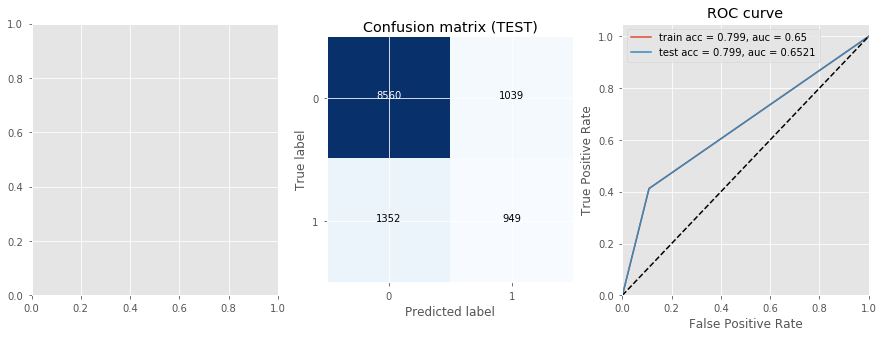

In [283]:
threshold = 0.5
y_train_pred = train_preds_df.iloc[:,0]
y_test_pred = train_preds_df.iloc[:,0]
y_pred_randf = train_preds_df.iloc[:,0]

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

plot_cm(ax[1],  np_y, y_test_pred,   [0,1], 'Confusion matrix (TEST)', threshold)
plot_auc(ax[2], np_y, y_train_pred, np_y, y_test_pred, threshold)

plot_auc(ax[2], rawy_train, y_train_pred, rawy_test, y_test_pred, threshold)
    
plt.tight_layout()
plt.show()

In [288]:
test_preds_df.iloc[10:]

,scaled_X90_k1,scaled_X90_k3,scaled_X90_k7,scaled_X45_k1,scaled_X45_k3,scaled_X45_k7,scaled_rawX_k1,scaled_rawX_k3,scaled_rawX_k7,scaled_rawX_rf
10,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.014863
11,0.25,0.250000,0.107143,0.25,0.250000,0.107143,0.00,0.166667,0.178571,0.015309
12,0.00,0.083333,0.107143,0.00,0.166667,0.250000,0.00,0.083333,0.107143,0.353890
13,0.00,0.250000,0.142857,0.25,0.333333,0.285714,0.25,0.250000,0.250000,0.302983
14,0.00,0.333333,0.464286,0.75,0.500000,0.214286,0.75,0.500000,0.428571,0.123764
15,0.00,0.083333,0.107143,0.75,0.333333,0.214286,0.00,0.000000,0.107143,0.098995
16,0.25,0.250000,0.214286,0.00,0.000000,0.107143,0.00,0.000000,0.000000,0.125380
17,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.072343
18,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.050907
19,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.008407


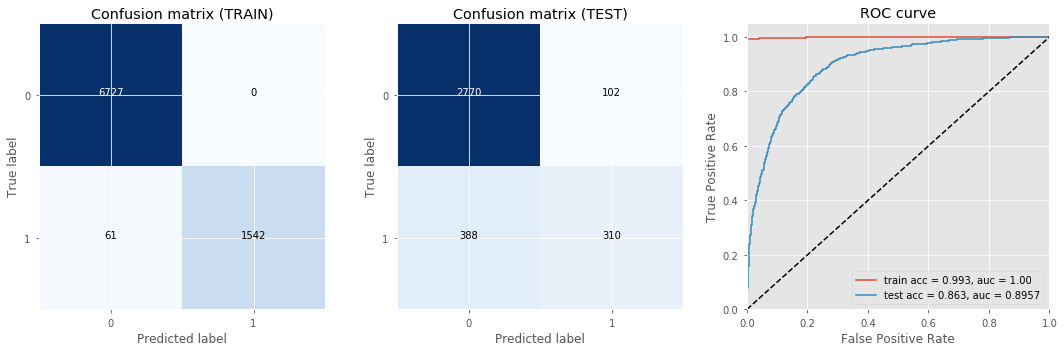

In [1330]:
#RAW RANDOM FOREST CLASSIFIER

rf = RandomForestClassifier(bootstrap = False,
    max_depth= 15,
    max_features= 8,
    min_samples_leaf= 2,
    min_samples_split=2,
    n_estimators= 302)
rf.fit(rawX_train,rawy_train)

threshold = 0.5
y_train_pred = rf.predict_proba(rawX_train)[:,1]
y_test_pred = rf.predict_proba(rawX_test)[:,1]
#y_pred_randf = rf.predict_proba(X_predict)[:,1]
np.savetxt("DesjPred_ultime_RawNormalizedRandforest.csv", y_pred_randf, delimiter=",")
np.savetxt("DesjPred_ultime_randforest.csv", y_pred_randf, delimiter=",")

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

plot_cm(ax[0],  rawy_train, y_train_pred, [0,1], 'Confusion matrix (TRAIN)', threshold)
plot_cm(ax[1],  rawy_test, y_test_pred,   [0,1], 'Confusion matrix (TEST)', threshold)
plot_auc(ax[2], rawy_train, y_train_pred, rawy_test, y_test_pred, threshold)
    
plt.tight_layout()
plt.show()

In [1267]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 300, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 35, 60, 85, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 150, 200, 250, 300]}


In [1269]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 25, cv = 3, verbose=2, n_jobs = -1)

# Fit the random search model
rf_random.fit(rawX, y)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 11.8min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=25, n_jobs=-1,
          param_distributions={'n_estimators': [100, 150, 200, 250, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 35, 60, 85, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [1270]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': False}

In [1273]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.4f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(rawX_train, rawy_train)
base_accuracy = evaluate(base_model, rawX_test, rawy_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, rawX_test, rawy_test)

print('Improvement of {:0.4f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


Model Performance
Average Error: 0.1991 degrees.
Accuracy = -inf%.
Model Performance
Average Error: 0.1363 degrees.
Accuracy = -inf%.
Improvement of nan%.


In [1303]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [15],
    'max_features': [8],
    'min_samples_leaf': [2],
    'min_samples_split': [2],
    'n_estimators': [302]
}

# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 4, n_jobs = -1, verbose = 2)

In [1329]:
rawrf = RandomForestRegressor(bootstrap = False,
    max_depth= 15,
    max_features= 8,
    min_samples_leaf= 2,
    min_samples_split=2,
    n_estimators= 302)
rawrf.fit(rawX, y)
y_rawpred_randf = rawrf.predict(rawpredict_X)
np.savetxt("DesjPred_ultime_Rawrandforest.csv", y_rawpred_randf, delimiter=",")

In [1292]:
# Fit the grid search to the data
grid_search.fit(rawX, y)
grid_search.best_params_

best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, rawX_test, rawy_test)

print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))


Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:  1.0min remaining:   15.1s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.3min finished


Model Performance
Average Error: 0.0695 degrees.
Accuracy = -inf%.
Improvement of nan%.


In [1293]:
pprint(grid_search.best_params_)

{'bootstrap': False,
 'max_depth': 15,
 'max_features': 8,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 302}


In [112]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV   #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 12, 4

In [113]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = dtrain
        cvresult = alg.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds, verbose_eval=True,  stratified=False)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Default'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(XX)
    dtrain_predprob = alg.predict_proba(XX)[:,1]
    
    best_auc_mean = cvresult['test-auc-mean'].iloc[alg.get_params()['n_estimators']-1]
    
    #Print model report:
    print("\nModel Report")
    print("Model best iteration : {} with an auc score of : {}".format(alg.get_params()['n_estimators'], best_auc_mean))
    print("Accuracy : {}".format(metrics.accuracy_score(y.values, dtrain_predictions)))
    print("AUC Score (Train): {}".format(metrics.roc_auc_score(y, dtrain_predprob)))  
                    
    #feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False))
    feat_imp = pd.Series(alg.get_booster().get_score(importance_type='weight')).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [114]:
#XGBdtrain = xgb.DMatrix(X_train, label=y_train)
#XGBdtest = xgb.DMatrix(X_test, label=y_test)
#XGBdpred = xgb.DMatrix(X_predict)
target = 'Default'
predictors = [x for x in X.columns]
train = xgb.DMatrix(XX, label=y)

NameError: name 'XX' is not defined

[0]	train-auc:0.879177+0.00411045	test-auc:0.860371+0.00684331
[1]	train-auc:0.890889+0.00341268	test-auc:0.869893+0.00689686
[2]	train-auc:0.896472+0.00292444	test-auc:0.876098+0.00555031
[3]	train-auc:0.899376+0.00193664	test-auc:0.879232+0.0057772
[4]	train-auc:0.902663+0.001592	test-auc:0.881508+0.00508353
[5]	train-auc:0.904968+0.00139087	test-auc:0.882439+0.00538993
[6]	train-auc:0.9075+0.00204531	test-auc:0.883235+0.00556698
[7]	train-auc:0.909668+0.00173676	test-auc:0.884494+0.00601572
[8]	train-auc:0.911106+0.00159679	test-auc:0.885051+0.00639942
[9]	train-auc:0.912513+0.00141997	test-auc:0.885569+0.00600117
[10]	train-auc:0.913719+0.00160953	test-auc:0.886447+0.00460362
[11]	train-auc:0.915148+0.0014583	test-auc:0.887284+0.00503377
[12]	train-auc:0.916891+0.00102683	test-auc:0.887501+0.00566189
[13]	train-auc:0.91822+0.000933429	test-auc:0.887425+0.00541861
[14]	train-auc:0.919536+0.000639919	test-auc:0.88844+0.00572917
[15]	train-auc:0.920766+0.000580309	test-auc:0.888551+0.

c:\users\marcp\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Model best iteration : 47 with an auc score of : 0.8919674000000001
Accuracy : 0.8976470588235295
AUC Score (Train): 0.94126651701505


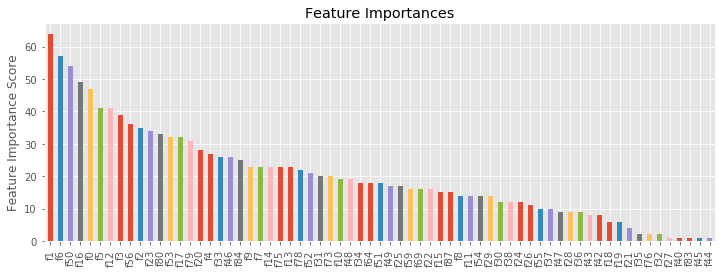

In [1480]:
#Choose all predictors except target & IDcols
#predictors = [x for x in train.columns if x not in [target, IDcol]]
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, train, predictors)

In [1481]:
X.columns[top_indices]

Index(['CurrentTotalBalance_rel_month_12', 'CurrentTotalBalance_rel_month_13',
       'CurrentTotalBalance_rel_month_9', 'CurrentTotalBalance_rel_month_11',
       'CurrentTotalBalance_rel_month_10', 'CurrentTotalBalance_rel_month_8',
       'DelqCycle_std', 'CurrentTotalBalance_rel_month_7', 'DelqCycle_avg',
       'DelqCycle_month_13', 'CurrentTotalBalance_rel_month_6',
       'CurrentTotalBalance_rel_month_5', 'CurrentTotalBalance_rel_month_4',
       'DelqCycle_month_12', 'CurrentTotalBalance_rel_month_3',
       'CurrentTotalBalance_rel_month_2', 'TRANSACTION_logAMT_month_13',
       'CurrentTotalBalance_rel_month_1', 'DelqCycle_month_11',
       'DelqCycle_month_10', 'TRANSACTION_logAMT_month_12',
       'DelqCycle_month_9', 'CurrentTotalBalance_log_month_12',
       'CurrentTotalBalance_log_month_13', 'CurrentTotalBalance_avg_log',
       'TRANSACTION_AMT_avg_log', 'CurrentTotalBalance_log_month_11',
       'DelqCycle_month_8', 'CurrentTotalBalance_log_month_10',
       'Current

In [1487]:
param_test1 = {
 'max_depth':np.arange(3,10,2),
 'min_child_weight':np.arange(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=50, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch1.fit(XX,y)
#gsearch1.fit(train[predictors,train[target])

gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.88533, std: 0.01804, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.88531, std: 0.01786, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.88612, std: 0.01836, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.88520, std: 0.01567, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.88493, std: 0.01637, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.88540, std: 0.01620, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.88454, std: 0.01602, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.88381, std: 0.01496, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.88458, std: 0.01586, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.88229, std: 0.01551, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: 0.88077, std: 0.01562, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: 0.88423, std: 0.01536, params: {'max_depth': 9, 'min_child_weight': 5}],
 {'max_depth': 3, 'min_child_weight': 5

In [1489]:
param_test1 = {
 'max_depth':[1,2,3],
 'min_child_weight':[4,5,6]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=50, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch1.fit(XX,y)
#gsearch1.fit(train[predictors,train[target])

gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.88018, std: 0.02352, params: {'max_depth': 1, 'min_child_weight': 4},
  mean: 0.88018, std: 0.02352, params: {'max_depth': 1, 'min_child_weight': 5},
  mean: 0.88018, std: 0.02352, params: {'max_depth': 1, 'min_child_weight': 6},
  mean: 0.88302, std: 0.01959, params: {'max_depth': 2, 'min_child_weight': 4},
  mean: 0.88298, std: 0.01952, params: {'max_depth': 2, 'min_child_weight': 5},
  mean: 0.88315, std: 0.01936, params: {'max_depth': 2, 'min_child_weight': 6},
  mean: 0.88556, std: 0.01849, params: {'max_depth': 3, 'min_child_weight': 4},
  mean: 0.88612, std: 0.01836, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.88512, std: 0.01762, params: {'max_depth': 3, 'min_child_weight': 6}],
 {'max_depth': 3, 'min_child_weight': 5},
 0.8861178924444099)

In [1493]:
param_test3 = {
 #'gamma':[i/20.0 for i in range(2,5)] first test
 'gamma':[i/20.0 for i in range(2,10)] # second test
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(XX,y)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.88462, std: 0.01434, params: {'gamma': 0.1},
  mean: 0.88462, std: 0.01434, params: {'gamma': 0.15},
  mean: 0.88459, std: 0.01435, params: {'gamma': 0.2},
  mean: 0.88485, std: 0.01445, params: {'gamma': 0.25},
  mean: 0.88485, std: 0.01445, params: {'gamma': 0.3},
  mean: 0.88485, std: 0.01445, params: {'gamma': 0.35},
  mean: 0.88467, std: 0.01402, params: {'gamma': 0.4},
  mean: 0.88467, std: 0.01402, params: {'gamma': 0.45}],
 {'gamma': 0.25},
 0.8848505979867973)

[0]	train-auc:0.85192+0.00370704	test-auc:0.844509+0.00388301
[1]	train-auc:0.863936+0.00457328	test-auc:0.854537+0.00682644
[2]	train-auc:0.872428+0.00363046	test-auc:0.862758+0.00753797
[3]	train-auc:0.877104+0.00307229	test-auc:0.868815+0.00807662
[4]	train-auc:0.879245+0.00276547	test-auc:0.872133+0.00667127
[5]	train-auc:0.881645+0.00330828	test-auc:0.873863+0.0064605
[6]	train-auc:0.883867+0.00273703	test-auc:0.875818+0.00658213
[7]	train-auc:0.885373+0.00239418	test-auc:0.878082+0.00756485
[8]	train-auc:0.886726+0.0021346	test-auc:0.878881+0.00746858
[9]	train-auc:0.887807+0.00237905	test-auc:0.879661+0.00676244
[10]	train-auc:0.88855+0.00240858	test-auc:0.88021+0.00642219
[11]	train-auc:0.890325+0.00194323	test-auc:0.881284+0.00638732
[12]	train-auc:0.892116+0.00107313	test-auc:0.882308+0.006823
[13]	train-auc:0.892511+0.00090952	test-auc:0.882912+0.00715046
[14]	train-auc:0.893157+0.00104419	test-auc:0.883452+0.00731846
[15]	train-auc:0.893823+0.00117336	test-auc:0.883974+0.00

[128]	train-auc:0.93259+0.00110387	test-auc:0.891906+0.00494563
[129]	train-auc:0.932795+0.00112115	test-auc:0.891913+0.00495949
[130]	train-auc:0.932956+0.00114305	test-auc:0.891897+0.00495298
[131]	train-auc:0.93316+0.00103829	test-auc:0.891907+0.00491613
[132]	train-auc:0.933326+0.00109335	test-auc:0.891915+0.004922
[133]	train-auc:0.933571+0.00112859	test-auc:0.891876+0.00491865
[134]	train-auc:0.933775+0.00105144	test-auc:0.891838+0.00488222
[135]	train-auc:0.934007+0.00108253	test-auc:0.891743+0.00486722
[136]	train-auc:0.934232+0.00107181	test-auc:0.891811+0.00475207
[137]	train-auc:0.934471+0.00101186	test-auc:0.891743+0.00485404
[138]	train-auc:0.934667+0.0010218	test-auc:0.891776+0.00484539
[139]	train-auc:0.934894+0.00102026	test-auc:0.891675+0.00487404
[140]	train-auc:0.935088+0.000983964	test-auc:0.891726+0.00485488
[141]	train-auc:0.935314+0.00100608	test-auc:0.891784+0.00477361
[142]	train-auc:0.935509+0.00103505	test-auc:0.891826+0.00482791
[143]	train-auc:0.935705+0.00

c:\users\marcp\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Model best iteration : 95 with an auc score of : 0.8929752000000001
Accuracy : 0.8810924369747899
AUC Score (Train): 0.9195433538523655


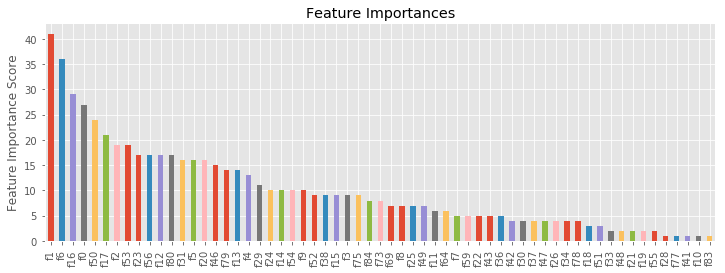

In [1494]:
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=5,
 gamma=0.25,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb2, train, predictors)

In [1495]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=95, max_depth=3,
 min_child_weight=5, gamma=0.25, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(XX,y)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.88541, std: 0.01421, params: {'colsample_bytree': 0.6, 'subsample': 0.6},
  mean: 0.88581, std: 0.01540, params: {'colsample_bytree': 0.6, 'subsample': 0.7},
  mean: 0.88537, std: 0.01535, params: {'colsample_bytree': 0.6, 'subsample': 0.8},
  mean: 0.88553, std: 0.01581, params: {'colsample_bytree': 0.6, 'subsample': 0.9},
  mean: 0.88430, std: 0.01472, params: {'colsample_bytree': 0.7, 'subsample': 0.6},
  mean: 0.88617, std: 0.01534, params: {'colsample_bytree': 0.7, 'subsample': 0.7},
  mean: 0.88460, std: 0.01554, params: {'colsample_bytree': 0.7, 'subsample': 0.8},
  mean: 0.88419, std: 0.01495, params: {'colsample_bytree': 0.7, 'subsample': 0.9},
  mean: 0.88494, std: 0.01487, params: {'colsample_bytree': 0.8, 'subsample': 0.6},
  mean: 0.88505, std: 0.01622, params: {'colsample_bytree': 0.8, 'subsample': 0.7},
  mean: 0.88605, std: 0.01592, params: {'colsample_bytree': 0.8, 'subsample': 0.8},
  mean: 0.88512, std: 0.01495, params: {'colsample_bytree': 0.8, 'subsample'

In [1498]:
param_test5 = {
 'subsample':[i/100.0 for i in range(65,80,5)],
 'colsample_bytree':[i/100.0 for i in range(65,80,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=95, max_depth=3,
 min_child_weight=5, gamma=0.25, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27),  
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(XX,y)
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.88566, std: 0.01742, params: {'colsample_bytree': 0.65, 'subsample': 0.65},
  mean: 0.88600, std: 0.01669, params: {'colsample_bytree': 0.65, 'subsample': 0.7},
  mean: 0.88522, std: 0.01593, params: {'colsample_bytree': 0.65, 'subsample': 0.75},
  mean: 0.88581, std: 0.01665, params: {'colsample_bytree': 0.7, 'subsample': 0.65},
  mean: 0.88617, std: 0.01534, params: {'colsample_bytree': 0.7, 'subsample': 0.7},
  mean: 0.88535, std: 0.01570, params: {'colsample_bytree': 0.7, 'subsample': 0.75},
  mean: 0.88640, std: 0.01727, params: {'colsample_bytree': 0.75, 'subsample': 0.65},
  mean: 0.88573, std: 0.01623, params: {'colsample_bytree': 0.75, 'subsample': 0.7},
  mean: 0.88565, std: 0.01566, params: {'colsample_bytree': 0.75, 'subsample': 0.75}],
 {'colsample_bytree': 0.75, 'subsample': 0.65},
 0.88639613164359)

In [1499]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=95, max_depth=3,
 min_child_weight=5, gamma=0.25, subsample=0.65, colsample_bytree=0.75,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6.fit(XX,y)
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

([mean: 0.88640, std: 0.01727, params: {'reg_alpha': 1e-05},
  mean: 0.88593, std: 0.01654, params: {'reg_alpha': 0.01},
  mean: 0.88616, std: 0.01650, params: {'reg_alpha': 0.1},
  mean: 0.88544, std: 0.01650, params: {'reg_alpha': 1},
  mean: 0.88376, std: 0.02070, params: {'reg_alpha': 100}],
 {'reg_alpha': 1e-05},
 0.88639613164359)

In [1503]:
param_test7 = {
 'reg_alpha':[0.00009, 0.0001, 0.00011]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=95, max_depth=3,
 min_child_weight=5, gamma=0.25, subsample=0.65, colsample_bytree=0.75,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27),
 param_grid = param_test7, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch7.fit(XX,y)
gsearch7.grid_scores_, gsearch7.best_params_, gsearch7.best_score_

([mean: 0.88640, std: 0.01727, params: {'reg_alpha': 9e-05},
  mean: 0.88640, std: 0.01727, params: {'reg_alpha': 0.0001},
  mean: 0.88640, std: 0.01727, params: {'reg_alpha': 0.00011}],
 {'reg_alpha': 9e-05},
 0.886396358210869)

[0]	train-auc:0.855942+0.00196614	test-auc:0.848778+0.00682296
[1]	train-auc:0.868863+0.00422785	test-auc:0.863551+0.00697629
[2]	train-auc:0.874195+0.00529129	test-auc:0.868296+0.00469515
[3]	train-auc:0.878816+0.00265293	test-auc:0.87201+0.00437017
[4]	train-auc:0.880934+0.00320938	test-auc:0.874091+0.0063226
[5]	train-auc:0.882835+0.00319199	test-auc:0.875069+0.00555814
[6]	train-auc:0.884951+0.00296715	test-auc:0.877794+0.00556452
[7]	train-auc:0.886249+0.00253177	test-auc:0.878458+0.00643384
[8]	train-auc:0.887144+0.0025678	test-auc:0.878589+0.00602505
[9]	train-auc:0.887742+0.00221201	test-auc:0.878782+0.00578687
[10]	train-auc:0.889045+0.00200221	test-auc:0.8804+0.00655194
[11]	train-auc:0.889938+0.0017325	test-auc:0.880855+0.00659419
[12]	train-auc:0.891241+0.0018243	test-auc:0.881828+0.00694167
[13]	train-auc:0.891684+0.00191127	test-auc:0.882367+0.0061802
[14]	train-auc:0.892232+0.0018132	test-auc:0.883179+0.00660246
[15]	train-auc:0.893408+0.00255958	test-auc:0.88357+0.00646

[128]	train-auc:0.931585+0.00117246	test-auc:0.892178+0.00406954
[129]	train-auc:0.931775+0.00121263	test-auc:0.892218+0.00412617
[130]	train-auc:0.931944+0.00122457	test-auc:0.892178+0.00409839
[131]	train-auc:0.932119+0.00126356	test-auc:0.892121+0.00411414
[132]	train-auc:0.93231+0.00120916	test-auc:0.892198+0.004101
[133]	train-auc:0.932523+0.00113784	test-auc:0.892257+0.00402546
[134]	train-auc:0.932779+0.0010262	test-auc:0.892175+0.00396589
[135]	train-auc:0.933104+0.00109989	test-auc:0.892158+0.00390353
[136]	train-auc:0.93342+0.00112595	test-auc:0.892232+0.00392951
[137]	train-auc:0.933645+0.00113655	test-auc:0.892291+0.00396201
[138]	train-auc:0.933895+0.00113668	test-auc:0.892007+0.00408042
[139]	train-auc:0.934187+0.0011046	test-auc:0.892089+0.00401948
[140]	train-auc:0.934374+0.00107039	test-auc:0.891957+0.00392116
[141]	train-auc:0.934548+0.00106908	test-auc:0.891998+0.00391958
[142]	train-auc:0.934724+0.00100917	test-auc:0.892098+0.00398509
[143]	train-auc:0.934923+0.0009

c:\users\marcp\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Model best iteration : 95 with an auc score of : 0.8926587999999999
Accuracy : 0.8808403361344538
AUC Score (Train): 0.9193587228569685


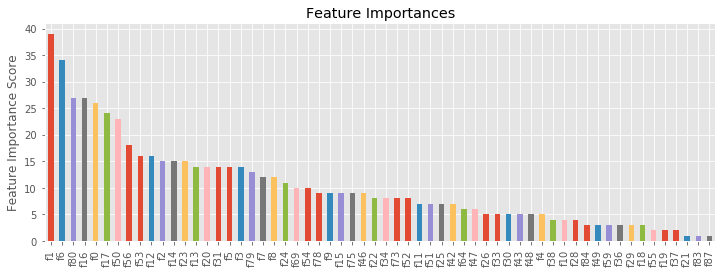

In [1504]:
xgb3 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=5,
 gamma=0.25,
 subsample=0.65,
 colsample_bytree=0.75,
 reg_alpha=0.00009,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb3, train, predictors)

[0]	train-auc:0.855942+0.00196614	test-auc:0.848778+0.00682296
[1]	train-auc:0.86631+0.00318393	test-auc:0.859831+0.0075029
[2]	train-auc:0.86935+0.00352948	test-auc:0.862932+0.0075271
[3]	train-auc:0.872396+0.0027342	test-auc:0.86718+0.00877581
[4]	train-auc:0.876474+0.00348416	test-auc:0.869923+0.00847829
[5]	train-auc:0.878031+0.0031041	test-auc:0.870761+0.00880627
[6]	train-auc:0.878664+0.00317811	test-auc:0.871302+0.00977468
[7]	train-auc:0.879658+0.00323734	test-auc:0.871927+0.0106266
[8]	train-auc:0.879874+0.00333185	test-auc:0.872778+0.0105678
[9]	train-auc:0.88043+0.00264046	test-auc:0.873546+0.0101662
[10]	train-auc:0.881364+0.00212487	test-auc:0.87394+0.00929223
[11]	train-auc:0.881575+0.00190194	test-auc:0.874479+0.0090292
[12]	train-auc:0.881711+0.00205299	test-auc:0.874518+0.00890636
[13]	train-auc:0.882451+0.00179038	test-auc:0.875898+0.00681843
[14]	train-auc:0.882689+0.00170308	test-auc:0.875991+0.00690773
[15]	train-auc:0.882826+0.00182515	test-auc:0.875921+0.00706483

[129]	train-auc:0.894423+0.00128873	test-auc:0.884447+0.00659574
[130]	train-auc:0.894451+0.00128325	test-auc:0.884408+0.00659836
[131]	train-auc:0.894485+0.00128408	test-auc:0.884494+0.00651916
[132]	train-auc:0.894533+0.0012994	test-auc:0.884554+0.0065101
[133]	train-auc:0.894575+0.00129491	test-auc:0.884557+0.00653061
[134]	train-auc:0.894925+0.00139066	test-auc:0.884515+0.00654536
[135]	train-auc:0.894938+0.0014226	test-auc:0.88451+0.00651631
[136]	train-auc:0.895013+0.00143922	test-auc:0.884437+0.00657109
[137]	train-auc:0.895172+0.00152226	test-auc:0.884745+0.00620415
[138]	train-auc:0.895239+0.00151198	test-auc:0.884769+0.00621709
[139]	train-auc:0.895292+0.00151418	test-auc:0.884807+0.00623079
[140]	train-auc:0.895398+0.00158109	test-auc:0.885052+0.00595308
[141]	train-auc:0.895453+0.00161216	test-auc:0.885131+0.00594191
[142]	train-auc:0.895548+0.00160864	test-auc:0.885169+0.00592614
[143]	train-auc:0.895828+0.00124271	test-auc:0.885477+0.00607349
[144]	train-auc:0.895859+0.00

[256]	train-auc:0.902065+0.00118807	test-auc:0.889528+0.00590764
[257]	train-auc:0.902084+0.00119278	test-auc:0.889559+0.00589188
[258]	train-auc:0.902126+0.00118598	test-auc:0.889546+0.00587749
[259]	train-auc:0.902163+0.00117591	test-auc:0.889569+0.00586883
[260]	train-auc:0.902202+0.00118918	test-auc:0.889587+0.00587757
[261]	train-auc:0.90225+0.00118024	test-auc:0.889595+0.00585748
[262]	train-auc:0.902304+0.00115961	test-auc:0.88963+0.00587157
[263]	train-auc:0.902357+0.00114736	test-auc:0.889653+0.00590206
[264]	train-auc:0.902412+0.00118295	test-auc:0.889625+0.00596996
[265]	train-auc:0.902473+0.00118727	test-auc:0.889622+0.00599182
[266]	train-auc:0.902523+0.00117171	test-auc:0.889659+0.00599401
[267]	train-auc:0.902574+0.00117456	test-auc:0.889671+0.00603164
[268]	train-auc:0.902624+0.00116891	test-auc:0.889671+0.0060189
[269]	train-auc:0.902694+0.00115642	test-auc:0.889672+0.00603654
[270]	train-auc:0.902738+0.00116022	test-auc:0.889674+0.00601831
[271]	train-auc:0.902789+0.0

[383]	train-auc:0.907694+0.00109296	test-auc:0.891326+0.00587018
[384]	train-auc:0.907745+0.00109599	test-auc:0.891324+0.00584224
[385]	train-auc:0.907782+0.00109337	test-auc:0.891323+0.00583697
[386]	train-auc:0.907827+0.00109503	test-auc:0.891317+0.00586201
[387]	train-auc:0.907866+0.00109543	test-auc:0.891318+0.00585004
[388]	train-auc:0.907912+0.00110274	test-auc:0.891331+0.00586289
[389]	train-auc:0.907948+0.00109612	test-auc:0.891334+0.00585328
[390]	train-auc:0.907986+0.00109356	test-auc:0.891325+0.00585144
[391]	train-auc:0.908037+0.00108935	test-auc:0.891359+0.0058586
[392]	train-auc:0.90807+0.00108062	test-auc:0.891358+0.00587535
[393]	train-auc:0.908103+0.00107407	test-auc:0.891378+0.00587363
[394]	train-auc:0.90815+0.00109209	test-auc:0.891381+0.00587165
[395]	train-auc:0.90819+0.00108566	test-auc:0.891403+0.00585509
[396]	train-auc:0.908231+0.00109442	test-auc:0.891449+0.00583016
[397]	train-auc:0.908265+0.00109807	test-auc:0.891497+0.00578949
[398]	train-auc:0.908301+0.00

[511]	train-auc:0.912265+0.0010756	test-auc:0.89246+0.00525626
[512]	train-auc:0.912299+0.00107232	test-auc:0.892482+0.0052548
[513]	train-auc:0.912334+0.00106363	test-auc:0.892504+0.00527805
[514]	train-auc:0.912367+0.00105709	test-auc:0.892512+0.00527918
[515]	train-auc:0.912397+0.00104651	test-auc:0.892521+0.0053005
[516]	train-auc:0.912433+0.00103518	test-auc:0.892532+0.00527754
[517]	train-auc:0.912471+0.00102855	test-auc:0.892528+0.00527224
[518]	train-auc:0.912512+0.00102612	test-auc:0.892522+0.00526946
[519]	train-auc:0.912548+0.0010304	test-auc:0.892507+0.00525593
[520]	train-auc:0.912574+0.00103558	test-auc:0.892512+0.00525292
[521]	train-auc:0.912589+0.00103827	test-auc:0.892509+0.00524999
[522]	train-auc:0.912621+0.00105354	test-auc:0.892523+0.00523587
[523]	train-auc:0.912649+0.00105047	test-auc:0.892551+0.00523484
[524]	train-auc:0.912686+0.00105262	test-auc:0.892568+0.00521414
[525]	train-auc:0.912713+0.00105425	test-auc:0.892564+0.00520269
[526]	train-auc:0.91275+0.0010

[638]	train-auc:0.91632+0.00101178	test-auc:0.892901+0.00505127
[639]	train-auc:0.916352+0.00100376	test-auc:0.89292+0.00505489
[640]	train-auc:0.916387+0.0010058	test-auc:0.892923+0.00507204
[641]	train-auc:0.916421+0.00100712	test-auc:0.892908+0.00505774
[642]	train-auc:0.916461+0.00101569	test-auc:0.892903+0.00506722
[643]	train-auc:0.916494+0.00101733	test-auc:0.892904+0.00505175
[644]	train-auc:0.916526+0.00101077	test-auc:0.89291+0.00504002
[645]	train-auc:0.916552+0.00101032	test-auc:0.892905+0.00500115
[646]	train-auc:0.916588+0.00100878	test-auc:0.892916+0.00498478
[647]	train-auc:0.916623+0.00101519	test-auc:0.892905+0.00497876
[648]	train-auc:0.91666+0.00102072	test-auc:0.892905+0.00497737
[649]	train-auc:0.916692+0.00101414	test-auc:0.892913+0.00498517
[650]	train-auc:0.916718+0.0010082	test-auc:0.892908+0.00499149
[651]	train-auc:0.916756+0.00100067	test-auc:0.892916+0.00498696
[652]	train-auc:0.916774+0.00100461	test-auc:0.892931+0.00498095
[653]	train-auc:0.916802+0.0009

[764]	train-auc:0.920118+0.000992551	test-auc:0.893211+0.0048274
[765]	train-auc:0.920144+0.000994397	test-auc:0.893208+0.0048231
[766]	train-auc:0.920169+0.000996494	test-auc:0.893209+0.00481911
[767]	train-auc:0.920192+0.000989122	test-auc:0.893222+0.00481979
[768]	train-auc:0.920216+0.000984895	test-auc:0.89321+0.00481112
[769]	train-auc:0.92024+0.000988058	test-auc:0.893219+0.00482662
[770]	train-auc:0.920264+0.000989916	test-auc:0.893235+0.00482547
[771]	train-auc:0.920302+0.00099103	test-auc:0.893237+0.0048176
[772]	train-auc:0.920334+0.000986978	test-auc:0.893243+0.0048169
[773]	train-auc:0.920364+0.000989337	test-auc:0.893248+0.00482619
[774]	train-auc:0.920387+0.000987552	test-auc:0.893265+0.0048195
[775]	train-auc:0.920419+0.000988382	test-auc:0.893263+0.00482579
[776]	train-auc:0.920453+0.00099716	test-auc:0.89325+0.00481763
[777]	train-auc:0.920473+0.000988355	test-auc:0.893256+0.00482085
[778]	train-auc:0.920498+0.000985167	test-auc:0.893239+0.00481142
[779]	train-auc:0.92

[889]	train-auc:0.923559+0.00081847	test-auc:0.893467+0.0046388
[890]	train-auc:0.92358+0.000818618	test-auc:0.893481+0.00463723
[891]	train-auc:0.923605+0.000826855	test-auc:0.893481+0.00463671
[892]	train-auc:0.923637+0.000820459	test-auc:0.89349+0.00463614
[893]	train-auc:0.923656+0.000822614	test-auc:0.893498+0.00465569
[894]	train-auc:0.923679+0.000823494	test-auc:0.893497+0.00466416
[895]	train-auc:0.923701+0.000822548	test-auc:0.893489+0.00464154
[896]	train-auc:0.923729+0.000809864	test-auc:0.893482+0.0046361
[897]	train-auc:0.923751+0.000806899	test-auc:0.893492+0.00463211
[898]	train-auc:0.923779+0.000797238	test-auc:0.893492+0.00464512
[899]	train-auc:0.92381+0.000800105	test-auc:0.893489+0.00466411
[900]	train-auc:0.923828+0.000794856	test-auc:0.893492+0.00465209
[901]	train-auc:0.923857+0.000789013	test-auc:0.893489+0.00466049
[902]	train-auc:0.923887+0.000783531	test-auc:0.893503+0.0046454
[903]	train-auc:0.923911+0.000776501	test-auc:0.893487+0.00463836
[904]	train-auc:0

[1014]	train-auc:0.926816+0.000743719	test-auc:0.893514+0.00454512
[1015]	train-auc:0.926837+0.000740017	test-auc:0.893504+0.00453779
[1016]	train-auc:0.926863+0.000736018	test-auc:0.89351+0.00453765
[1017]	train-auc:0.92689+0.000735409	test-auc:0.893518+0.00453617
[1018]	train-auc:0.926909+0.000733842	test-auc:0.893501+0.00454227
[1019]	train-auc:0.92693+0.000731669	test-auc:0.893495+0.00454145
[1020]	train-auc:0.926955+0.000735787	test-auc:0.893481+0.00454461
[1021]	train-auc:0.926972+0.00072684	test-auc:0.893489+0.0045399
[1022]	train-auc:0.927002+0.000728425	test-auc:0.893505+0.00454665
[1023]	train-auc:0.927025+0.000726239	test-auc:0.8935+0.00453704
[1024]	train-auc:0.927046+0.000721693	test-auc:0.893489+0.00453089
[1025]	train-auc:0.927067+0.00072356	test-auc:0.893479+0.00453361
[1026]	train-auc:0.927091+0.000717131	test-auc:0.893489+0.00454013
[1027]	train-auc:0.927113+0.000707963	test-auc:0.893488+0.00452994
[1028]	train-auc:0.927142+0.00069916	test-auc:0.893497+0.0045389
[1029

c:\users\marcp\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Model best iteration : 984 with an auc score of : 0.8935898
Accuracy : 0.8821848739495798
AUC Score (Train): 0.9212768387841355


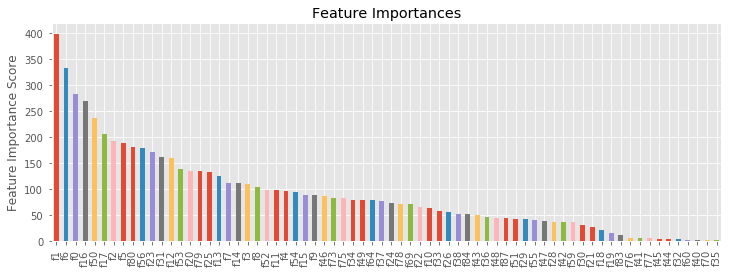

In [1506]:
xgb4 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=3000,
 max_depth=3,
 min_child_weight=5,
 gamma=0.25,
 subsample=0.65,
 colsample_bytree=0.75,
 reg_alpha=0.00009,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb4, train, predictors)

In [1341]:
num_round = 678
evallist  = [(dtest,'eval'), (dtrain,'train')]
param = {'objective':'binary:logistic', 
         'silent':1, 
         'eval_metric': ['auc'], 
         'eta':0.01, 
         'max_depth':5, 
         'subsample':0.58, 
         'colsample_bytree':1}

bst = xgb.train(param, dtrain, num_round, evallist)

[0]	eval-auc:0.861537	train-auc:0.871388
[1]	eval-auc:0.880949	train-auc:0.885481
[2]	eval-auc:0.88409	train-auc:0.88996
[3]	eval-auc:0.884881	train-auc:0.893532
[4]	eval-auc:0.885464	train-auc:0.894634
[5]	eval-auc:0.889317	train-auc:0.897347
[6]	eval-auc:0.890313	train-auc:0.89774
[7]	eval-auc:0.890348	train-auc:0.898378
[8]	eval-auc:0.890128	train-auc:0.899007
[9]	eval-auc:0.890705	train-auc:0.898628
[10]	eval-auc:0.890947	train-auc:0.89858
[11]	eval-auc:0.891097	train-auc:0.898965
[12]	eval-auc:0.890803	train-auc:0.899304
[13]	eval-auc:0.890464	train-auc:0.89943
[14]	eval-auc:0.890869	train-auc:0.899948
[15]	eval-auc:0.890382	train-auc:0.900074
[16]	eval-auc:0.890998	train-auc:0.900204
[17]	eval-auc:0.891191	train-auc:0.90057
[18]	eval-auc:0.891277	train-auc:0.90077
[19]	eval-auc:0.891717	train-auc:0.90081
[20]	eval-auc:0.891762	train-auc:0.901066
[21]	eval-auc:0.892204	train-auc:0.901139
[22]	eval-auc:0.892121	train-auc:0.901359
[23]	eval-auc:0.893183	train-auc:0.902914
[24]	eval-

[195]	eval-auc:0.901529	train-auc:0.922374
[196]	eval-auc:0.901496	train-auc:0.922468
[197]	eval-auc:0.9015	train-auc:0.922542
[198]	eval-auc:0.901495	train-auc:0.922641
[199]	eval-auc:0.901481	train-auc:0.922684
[200]	eval-auc:0.901529	train-auc:0.922689
[201]	eval-auc:0.90157	train-auc:0.92276
[202]	eval-auc:0.901623	train-auc:0.922869
[203]	eval-auc:0.901551	train-auc:0.923046
[204]	eval-auc:0.901645	train-auc:0.923103
[205]	eval-auc:0.901638	train-auc:0.923184
[206]	eval-auc:0.901659	train-auc:0.92326
[207]	eval-auc:0.901637	train-auc:0.923341
[208]	eval-auc:0.90161	train-auc:0.923404
[209]	eval-auc:0.901626	train-auc:0.923434
[210]	eval-auc:0.901627	train-auc:0.923497
[211]	eval-auc:0.901666	train-auc:0.923624
[212]	eval-auc:0.901706	train-auc:0.923833
[213]	eval-auc:0.90175	train-auc:0.923946
[214]	eval-auc:0.901726	train-auc:0.924083
[215]	eval-auc:0.901679	train-auc:0.924158
[216]	eval-auc:0.901695	train-auc:0.924248
[217]	eval-auc:0.901713	train-auc:0.924497
[218]	eval-auc:0.9

[387]	eval-auc:0.902687	train-auc:0.939268
[388]	eval-auc:0.902691	train-auc:0.939331
[389]	eval-auc:0.902728	train-auc:0.939454
[390]	eval-auc:0.902684	train-auc:0.939545
[391]	eval-auc:0.902669	train-auc:0.939642
[392]	eval-auc:0.902632	train-auc:0.939695
[393]	eval-auc:0.902606	train-auc:0.939741
[394]	eval-auc:0.902603	train-auc:0.939838
[395]	eval-auc:0.902612	train-auc:0.939861
[396]	eval-auc:0.902621	train-auc:0.939914
[397]	eval-auc:0.902636	train-auc:0.940061
[398]	eval-auc:0.902643	train-auc:0.940106
[399]	eval-auc:0.902562	train-auc:0.94018
[400]	eval-auc:0.902573	train-auc:0.940242
[401]	eval-auc:0.902623	train-auc:0.940366
[402]	eval-auc:0.902611	train-auc:0.94046
[403]	eval-auc:0.902599	train-auc:0.94054
[404]	eval-auc:0.902578	train-auc:0.940624
[405]	eval-auc:0.902557	train-auc:0.940685
[406]	eval-auc:0.902565	train-auc:0.940778
[407]	eval-auc:0.902525	train-auc:0.94089
[408]	eval-auc:0.902578	train-auc:0.940994
[409]	eval-auc:0.902589	train-auc:0.941003
[410]	eval-auc:

[579]	eval-auc:0.902683	train-auc:0.951653
[580]	eval-auc:0.902689	train-auc:0.951672
[581]	eval-auc:0.902701	train-auc:0.951738
[582]	eval-auc:0.902687	train-auc:0.951799
[583]	eval-auc:0.902678	train-auc:0.951847
[584]	eval-auc:0.902691	train-auc:0.951917
[585]	eval-auc:0.902692	train-auc:0.951966
[586]	eval-auc:0.902723	train-auc:0.952051
[587]	eval-auc:0.902711	train-auc:0.952121
[588]	eval-auc:0.902683	train-auc:0.952149
[589]	eval-auc:0.902674	train-auc:0.952188
[590]	eval-auc:0.902672	train-auc:0.952263
[591]	eval-auc:0.902652	train-auc:0.952296
[592]	eval-auc:0.902652	train-auc:0.952381
[593]	eval-auc:0.902639	train-auc:0.952434
[594]	eval-auc:0.902637	train-auc:0.952492
[595]	eval-auc:0.902666	train-auc:0.952578
[596]	eval-auc:0.902664	train-auc:0.952604
[597]	eval-auc:0.902668	train-auc:0.952726
[598]	eval-auc:0.902656	train-auc:0.952847
[599]	eval-auc:0.902632	train-auc:0.952875
[600]	eval-auc:0.902636	train-auc:0.952952
[601]	eval-auc:0.902634	train-auc:0.953026
[602]	eval-

In [ ]:
threshold = 0.5
y_train_pred = bst.predict(dtrain)
y_test_pred = bst.predict(dtest)
y_pred_pred = bst.predict(dpred)

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

plot_cm(ax[0],  y_train, y_train_pred, [0,1], 'Confusion matrix (TRAIN)', threshold)
plot_cm(ax[1],  y_test, y_test_pred,   [0,1], 'Confusion matrix (TEST)', threshold)
plot_auc(ax[2], y_train, y_train_pred, y_test, y_test_pred, threshold)
    
plt.tight_layout()
plt.show()
np.savetxt("DesjPred_ultime.csv", y_pred_pred, delimiter=",")

In [109]:
for train_index, test_index in kf.split(np_scaled_raw_X):
    KFold_X_train, KFold_X_test = np_scaled_raw_X[train_index], np_scaled_raw_X[test_index]
    KFold_y_train, KFold_y_test = np_y[train_index], np_y[test_index]
  
valid_set = (KFold_X_test,KFold_y_test)

In [104]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_classification
from keras.models import Sequential
from keras.utils import np_utils
from keras.callbacks import Callback, EarlyStopping
from sklearn.metrics import roc_auc_score
from keras.optimizers import Adam
from sklearn import roc_auc_score

def auc_roc(y_true, y_pred):
    # any tensorflow metric
    value, update_op = tf.contrib.metrics.streaming_auc(y_pred, y_true)

    # find all variables created for this metric
    metric_vars = [i for i in tf.local_variables() if 'auc_roc' in i.name.split('/')[1]]

    # Add metric variables to GLOBAL_VARIABLES collection.
    # They will be initialized for new session.
    for v in metric_vars:
        tf.add_to_collection(tf.GraphKeys.GLOBAL_VARIABLES, v)

    # force to update metric values
    with tf.control_dependencies([update_op]):
        value = tf.identity(value)
        return value

In [114]:
model = Sequential()
model.add(Dense(320, input_dim=KFold_X_train.shape[1], activation='relu'))

#model.add(Dense(256, activation='relu'))
#model.add(Dense(64, activation='relu'))
#model.add(Dense(64, activation='relu'))
#model.add(Dense(10, activation='relu'))
#model.add(Dense(10, activation='sigmoid'))
#model.add(Dense(1,  activation='sigmoid'))

model.add(Dense(160, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#model.add(Dense(2, activation='softmax'))
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', auc_roc])
model.compile(Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy', auc_roc])

my_callbacks = [EarlyStopping(monitor='auc_roc', patience=20, verbose=1, mode='max')]

#model.fit(KFold_X_train, KFold_y_train,
#         epochs=20, 
#         validation_split = 0.05,
#         batch_size = 5, 
#         verbose=2,
#         callbacks=my_callbacks)


model.fit(KFold_X_train, KFold_y_train,
         epochs=10, 
         batch_size = 32, 
         verbose=2,
         callbacks=my_callbacks,
         shuffle=True)

model.fit(KFold_X_train, KFold_y_train,
         epochs=1000, 
         batch_size = 32, 
         verbose=2,
         callbacks=my_callbacks,
         shuffle=False)

prediction1000 = model.predict(KFold_X_test)
np.savetxt("500_epoch.csv", predictionss, delimiter=",")

Epoch 1/10
 - 4s - loss: 0.3954 - acc: 0.8345 - auc_roc: 0.6856
Epoch 2/10
 - 1s - loss: 0.3113 - acc: 0.8633 - auc_roc: 0.8316
Epoch 3/10
 - 1s - loss: 0.3036 - acc: 0.8657 - auc_roc: 0.8572
Epoch 4/10
 - 1s - loss: 0.2994 - acc: 0.8654 - auc_roc: 0.8688
Epoch 5/10
 - 1s - loss: 0.2956 - acc: 0.8676 - auc_roc: 0.8759
Epoch 6/10
 - 1s - loss: 0.2920 - acc: 0.8717 - auc_roc: 0.8805
Epoch 7/10
 - 1s - loss: 0.2903 - acc: 0.8695 - auc_roc: 0.8838
Epoch 8/10
 - 1s - loss: 0.2886 - acc: 0.8726 - auc_roc: 0.8869
Epoch 9/10
 - 1s - loss: 0.2873 - acc: 0.8713 - auc_roc: 0.8892
Epoch 10/10
 - 1s - loss: 0.2850 - acc: 0.8729 - auc_roc: 0.8907
Epoch 1/1000
 - 1s - loss: 0.2803 - acc: 0.8748 - auc_roc: 0.8924
Epoch 2/1000
 - 1s - loss: 0.2783 - acc: 0.8769 - auc_roc: 0.8941
Epoch 3/1000
 - 1s - loss: 0.2764 - acc: 0.8768 - auc_roc: 0.8957
Epoch 4/1000
 - 1s - loss: 0.2747 - acc: 0.8779 - auc_roc: 0.8971
Epoch 5/1000
 - 1s - loss: 0.2728 - acc: 0.8783 - auc_roc: 0.8984
Epoch 6/1000
 - 1s - loss: 0.

Epoch 114/1000
 - 1s - loss: 0.0615 - acc: 0.9764 - auc_roc: 0.9702
Epoch 115/1000
 - 1s - loss: 0.0619 - acc: 0.9743 - auc_roc: 0.9705
Epoch 116/1000
 - 1s - loss: 0.0621 - acc: 0.9758 - auc_roc: 0.9708
Epoch 117/1000
 - 1s - loss: 0.0738 - acc: 0.9701 - auc_roc: 0.9711
Epoch 118/1000
 - 1s - loss: 0.0696 - acc: 0.9723 - auc_roc: 0.9713
Epoch 119/1000
 - 1s - loss: 0.0749 - acc: 0.9695 - auc_roc: 0.9716
Epoch 120/1000
 - 1s - loss: 0.0705 - acc: 0.9720 - auc_roc: 0.9718
Epoch 121/1000
 - 1s - loss: 0.0763 - acc: 0.9697 - auc_roc: 0.9721
Epoch 122/1000
 - 1s - loss: 0.0789 - acc: 0.9676 - auc_roc: 0.9723
Epoch 123/1000
 - 1s - loss: 0.0830 - acc: 0.9645 - auc_roc: 0.9725
Epoch 124/1000
 - 1s - loss: 0.0840 - acc: 0.9652 - auc_roc: 0.9726
Epoch 125/1000
 - 1s - loss: 0.1005 - acc: 0.9564 - auc_roc: 0.9728
Epoch 126/1000
 - 1s - loss: 0.0964 - acc: 0.9578 - auc_roc: 0.9729
Epoch 127/1000
 - 1s - loss: 0.0813 - acc: 0.9646 - auc_roc: 0.9731
Epoch 128/1000
 - 1s - loss: 0.0722 - acc: 0.971

Epoch 235/1000
 - 1s - loss: 0.0256 - acc: 0.9909 - auc_roc: 0.9879
Epoch 236/1000
 - 1s - loss: 0.1130 - acc: 0.9624 - auc_roc: 0.9879
Epoch 237/1000
 - 1s - loss: 0.0379 - acc: 0.9852 - auc_roc: 0.9879
Epoch 238/1000
 - 1s - loss: 0.0243 - acc: 0.9918 - auc_roc: 0.9880
Epoch 239/1000
 - 1s - loss: 0.0260 - acc: 0.9908 - auc_roc: 0.9880
Epoch 240/1000
 - 1s - loss: 0.0219 - acc: 0.9927 - auc_roc: 0.9881
Epoch 241/1000
 - 1s - loss: 0.0204 - acc: 0.9928 - auc_roc: 0.9882
Epoch 242/1000
 - 1s - loss: 0.0215 - acc: 0.9922 - auc_roc: 0.9883
Epoch 243/1000
 - 1s - loss: 0.0210 - acc: 0.9925 - auc_roc: 0.9883
Epoch 244/1000
 - 1s - loss: 0.0189 - acc: 0.9933 - auc_roc: 0.9884
Epoch 245/1000
 - 1s - loss: 0.0192 - acc: 0.9932 - auc_roc: 0.9885
Epoch 246/1000
 - 1s - loss: 0.0176 - acc: 0.9938 - auc_roc: 0.9885
Epoch 247/1000
 - 1s - loss: 0.0190 - acc: 0.9931 - auc_roc: 0.9886
Epoch 248/1000
 - 1s - loss: 0.0210 - acc: 0.9927 - auc_roc: 0.9887
Epoch 249/1000
 - 1s - loss: 0.0275 - acc: 0.990

Epoch 356/1000
 - 1s - loss: 0.0650 - acc: 0.9774 - auc_roc: 0.9932
Epoch 357/1000
 - 1s - loss: 0.0280 - acc: 0.9898 - auc_roc: 0.9932
Epoch 358/1000
 - 1s - loss: 0.0137 - acc: 0.9955 - auc_roc: 0.9933
Epoch 359/1000
 - 1s - loss: 0.0095 - acc: 0.9974 - auc_roc: 0.9933
Epoch 360/1000
 - 1s - loss: 0.0066 - acc: 0.9987 - auc_roc: 0.9933
Epoch 361/1000
 - 1s - loss: 0.0060 - acc: 0.9988 - auc_roc: 0.9934
Epoch 362/1000
 - 1s - loss: 0.0053 - acc: 0.9993 - auc_roc: 0.9934
Epoch 363/1000
 - 1s - loss: 0.0055 - acc: 0.9990 - auc_roc: 0.9934
Epoch 364/1000
 - 1s - loss: 0.0052 - acc: 0.9987 - auc_roc: 0.9934
Epoch 365/1000
 - 1s - loss: 0.0052 - acc: 0.9989 - auc_roc: 0.9935
Epoch 366/1000
 - 1s - loss: 0.0472 - acc: 0.9872 - auc_roc: 0.9935
Epoch 367/1000
 - 1s - loss: 0.0422 - acc: 0.9835 - auc_roc: 0.9935
Epoch 368/1000
 - 1s - loss: 0.0180 - acc: 0.9933 - auc_roc: 0.9935
Epoch 369/1000
 - 1s - loss: 0.0075 - acc: 0.9988 - auc_roc: 0.9936
Epoch 370/1000
 - 1s - loss: 0.0061 - acc: 0.999

Epoch 477/1000
 - 1s - loss: 0.0622 - acc: 0.9789 - auc_roc: 0.9956
Epoch 478/1000
 - 1s - loss: 0.0217 - acc: 0.9911 - auc_roc: 0.9956
Epoch 479/1000
 - 1s - loss: 0.0083 - acc: 0.9980 - auc_roc: 0.9956
Epoch 480/1000
 - 1s - loss: 0.0047 - acc: 0.9990 - auc_roc: 0.9956
Epoch 481/1000
 - 1s - loss: 0.0027 - acc: 1.0000 - auc_roc: 0.9956
Epoch 482/1000
 - 1s - loss: 0.0020 - acc: 1.0000 - auc_roc: 0.9956
Epoch 483/1000
 - 1s - loss: 0.0017 - acc: 1.0000 - auc_roc: 0.9956
Epoch 484/1000
 - 1s - loss: 0.0016 - acc: 1.0000 - auc_roc: 0.9956
Epoch 485/1000
 - 1s - loss: 0.0015 - acc: 1.0000 - auc_roc: 0.9957
Epoch 486/1000
 - 1s - loss: 0.0016 - acc: 1.0000 - auc_roc: 0.9957
Epoch 487/1000
 - 1s - loss: 0.0015 - acc: 0.9999 - auc_roc: 0.9957
Epoch 488/1000
 - 1s - loss: 0.0019 - acc: 1.0000 - auc_roc: 0.9957
Epoch 489/1000
 - 1s - loss: 0.0613 - acc: 0.9807 - auc_roc: 0.9957
Epoch 490/1000
 - 1s - loss: 0.0154 - acc: 0.9953 - auc_roc: 0.9957
Epoch 491/1000
 - 1s - loss: 0.0087 - acc: 0.997

Epoch 597/1000
 - 1s - loss: 0.0020 - acc: 0.9997 - auc_roc: 0.9968
Epoch 598/1000
 - 1s - loss: 0.0010 - acc: 1.0000 - auc_roc: 0.9968
Epoch 599/1000
 - 1s - loss: 8.6613e-04 - acc: 1.0000 - auc_roc: 0.9968
Epoch 600/1000
 - 1s - loss: 6.6878e-04 - acc: 1.0000 - auc_roc: 0.9968
Epoch 601/1000
 - 1s - loss: 6.1804e-04 - acc: 1.0000 - auc_roc: 0.9968
Epoch 602/1000
 - 1s - loss: 5.1322e-04 - acc: 1.0000 - auc_roc: 0.9968
Epoch 603/1000
 - 1s - loss: 5.0128e-04 - acc: 1.0000 - auc_roc: 0.9968
Epoch 604/1000
 - 1s - loss: 5.6117e-04 - acc: 1.0000 - auc_roc: 0.9968
Epoch 605/1000
 - 1s - loss: 0.0489 - acc: 0.9843 - auc_roc: 0.9969
Epoch 606/1000
 - 1s - loss: 0.0086 - acc: 0.9971 - auc_roc: 0.9969
Epoch 607/1000
 - 1s - loss: 0.0062 - acc: 0.9981 - auc_roc: 0.9969
Epoch 608/1000
 - 1s - loss: 0.0155 - acc: 0.9956 - auc_roc: 0.9969
Epoch 609/1000
 - 1s - loss: 0.0052 - acc: 0.9985 - auc_roc: 0.9969
Epoch 610/1000
 - 1s - loss: 0.0032 - acc: 0.9991 - auc_roc: 0.9969
Epoch 611/1000
 - 1s - l

 - 1s - loss: 0.0038 - acc: 0.9985 - auc_roc: 0.9975
Epoch 716/1000
 - 1s - loss: 0.0051 - acc: 0.9987 - auc_roc: 0.9975
Epoch 717/1000
 - 1s - loss: 0.0161 - acc: 0.9936 - auc_roc: 0.9975
Epoch 718/1000
 - 1s - loss: 0.0103 - acc: 0.9962 - auc_roc: 0.9975
Epoch 719/1000
 - 1s - loss: 0.0136 - acc: 0.9947 - auc_roc: 0.9975
Epoch 720/1000
 - 1s - loss: 0.0030 - acc: 0.9993 - auc_roc: 0.9975
Epoch 721/1000
 - 1s - loss: 0.0010 - acc: 1.0000 - auc_roc: 0.9975
Epoch 722/1000
 - 1s - loss: 7.5179e-04 - acc: 1.0000 - auc_roc: 0.9975
Epoch 723/1000
 - 1s - loss: 6.2101e-04 - acc: 1.0000 - auc_roc: 0.9976
Epoch 724/1000
 - 1s - loss: 4.4814e-04 - acc: 1.0000 - auc_roc: 0.9976
Epoch 725/1000
 - 1s - loss: 4.8170e-04 - acc: 1.0000 - auc_roc: 0.9976
Epoch 726/1000
 - 1s - loss: 5.8819e-04 - acc: 1.0000 - auc_roc: 0.9976
Epoch 727/1000
 - 1s - loss: 5.5079e-04 - acc: 0.9999 - auc_roc: 0.9976
Epoch 728/1000
 - 1s - loss: 0.0455 - acc: 0.9862 - auc_roc: 0.9976
Epoch 729/1000
 - 1s - loss: 0.0047 - a

Epoch 832/1000
 - 1s - loss: 0.0637 - acc: 0.9824 - auc_roc: 0.9980
Epoch 833/1000
 - 1s - loss: 0.0049 - acc: 0.9987 - auc_roc: 0.9980
Epoch 834/1000
 - 1s - loss: 0.0033 - acc: 0.9991 - auc_roc: 0.9980
Epoch 835/1000
 - 1s - loss: 0.0017 - acc: 0.9996 - auc_roc: 0.9980
Epoch 836/1000
 - 1s - loss: 0.0011 - acc: 0.9996 - auc_roc: 0.9980
Epoch 837/1000
 - 1s - loss: 3.9878e-04 - acc: 1.0000 - auc_roc: 0.9980
Epoch 838/1000
 - 1s - loss: 3.3772e-04 - acc: 1.0000 - auc_roc: 0.9980
Epoch 839/1000
 - 1s - loss: 2.5833e-04 - acc: 1.0000 - auc_roc: 0.9980
Epoch 840/1000
 - 1s - loss: 2.2844e-04 - acc: 1.0000 - auc_roc: 0.9980
Epoch 841/1000
 - 1s - loss: 1.9785e-04 - acc: 1.0000 - auc_roc: 0.9980
Epoch 842/1000
 - 1s - loss: 1.7726e-04 - acc: 1.0000 - auc_roc: 0.9980
Epoch 843/1000
 - 1s - loss: 1.6673e-04 - acc: 1.0000 - auc_roc: 0.9980
Epoch 844/1000
 - 1s - loss: 1.5203e-04 - acc: 1.0000 - auc_roc: 0.9980
Epoch 845/1000
 - 1s - loss: 1.4830e-04 - acc: 1.0000 - auc_roc: 0.9980
Epoch 846/10

Epoch 949/1000
 - 1s - loss: 9.4802e-05 - acc: 1.0000 - auc_roc: 0.9983
Epoch 950/1000
 - 1s - loss: 8.6408e-05 - acc: 1.0000 - auc_roc: 0.9983
Epoch 951/1000
 - 1s - loss: 8.1282e-05 - acc: 1.0000 - auc_roc: 0.9983
Epoch 952/1000
 - 1s - loss: 7.1574e-05 - acc: 1.0000 - auc_roc: 0.9983
Epoch 953/1000
 - 1s - loss: 6.8392e-05 - acc: 1.0000 - auc_roc: 0.9983
Epoch 954/1000
 - 1s - loss: 6.5971e-05 - acc: 1.0000 - auc_roc: 0.9983
Epoch 955/1000
 - 1s - loss: 8.1076e-05 - acc: 1.0000 - auc_roc: 0.9984
Epoch 956/1000
 - 1s - loss: 7.3172e-05 - acc: 1.0000 - auc_roc: 0.9984
Epoch 957/1000
 - 1s - loss: 0.0841 - acc: 0.9760 - auc_roc: 0.9983
Epoch 958/1000
 - 1s - loss: 0.0058 - acc: 0.9984 - auc_roc: 0.9983
Epoch 959/1000
 - 1s - loss: 0.0014 - acc: 0.9998 - auc_roc: 0.9984
Epoch 960/1000
 - 1s - loss: 7.8493e-04 - acc: 1.0000 - auc_roc: 0.9984
Epoch 961/1000
 - 1s - loss: 6.8596e-04 - acc: 0.9999 - auc_roc: 0.9984
Epoch 962/1000
 - 1s - loss: 3.2023e-04 - acc: 1.0000 - auc_roc: 0.9984
Epoc

In [207]:
from datetime import datetime
from sklearn.metrics import log_loss, roc_auc_score
from sklearn.model_selection import StratifiedKFold

from keras.models import load_model
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, Activation
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger, Callback
from keras.wrappers.scikit_learn import KerasClassifier

class roc_auc_callback(Callback):
    def __init__(self,training_data,validation_data):
        self.x = training_data[0]
        self.y = training_data[1]
        self.x_val = validation_data[0]
        self.y_val = validation_data[1]

    def on_train_begin(self, logs={}):
        return

    def on_train_end(self, logs={}):
        return

    def on_epoch_begin(self, epoch, logs={}):
        return

    def on_epoch_end(self, epoch, logs={}):
        y_pred = self.model.predict_proba(self.x, verbose=0)
        roc = roc_auc_score(self.y, y_pred)
        logs['roc_auc'] = roc_auc_score(self.y, y_pred)
        logs['norm_gini'] = ( roc_auc_score(self.y, y_pred) * 2 ) - 1

        y_pred_val = self.model.predict_proba(self.x_val, verbose=0)
        roc_val = roc_auc_score(self.y_val, y_pred_val)
        logs['roc_auc_val'] = roc_auc_score(self.y_val, y_pred_val)
        logs['norm_gini_val'] = ( roc_auc_score(self.y_val, y_pred_val) * 2 ) - 1

        print('\rroc_auc: %s - roc_auc_val: %s - norm_gini: %s - norm_gini_val: %s' % (str(round(roc,5)),str(round(roc_val,5)),str(round((roc*2-1),5)),str(round((roc_val*2-1),5))), end=10*' '+'\n')
        return

    def on_batch_begin(self, batch, logs={}):
        return

    def on_batch_end(self, batch, logs={}):
        return

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod(
            (datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' %
              (thour, tmin, round(tsec, 2)))

def scale_data(X, scaler=None):
    if not scaler:
        scaler = MinMaxScaler(feature_range=(-1, 1))
        scaler.fit(X)
    X = scaler.transform(X)
    return X, scaler

folds = 4
runs = 2


cv_LL = 0
cv_AUC = 0
cv_gini = 0
fpred = []
avpred = []
avreal = []
#avids = []

patience = 20
batchsize = 32

# Let's split the data into folds. I always use the same random number for reproducibility, 
# and suggest that you do the same (you certainly don't have to use 1001).

skf = StratifiedKFold(n_splits=folds)
starttime = timer(None)
#for i, (train_index, test_index) in enumerate(skf.split(np_scaled_raw_X, np_y)):
    
    #X_train, X_val = np_scaled_raw_X[train_index], np_scaled_raw_X[test_index]
    #y_train, y_val = np_y[train_index], np_y[test_index]
    #train_ids, val_ids = tr_ids[train_index], tr_ids[test_index]
    
for train_index, test_index in kf.split(np_scaled_raw_X):
    X_train, X_val = np_scaled_raw_X[train_index], np_scaled_raw_X[test_index]
    y_train, y_val = np_y[train_index], np_y[test_index]    
    start_time = timer(None)
    count = 0
# This is where we define and compile the model. These parameters are not optimal, as they were chosen 
# to get a notebook to complete in 60 minutes. Other than leaving BatchNormalization and last sigmoid 
# activation alone, virtually everything else can be optimized: number of neurons, types of initializers, 
# activation functions, dropout values. The same goes for the optimizer at the end.

#########
# Never move this model definition to the beginning of the file or anywhere else outside of this loop. 
# The model needs to be initialized anew every time you run a different fold. If not, it will continue 
# the training from a previous model, and that is not what you want.
#########

    # This definition must be within the for loop or else it will continue training previous model
    def baseline_model():
        model = Sequential()
        model.add(Dense(200,input_dim=X_train.shape[1],kernel_initializer='glorot_normal',))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        model.add(Dense(100, kernel_initializer='glorot_normal'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.25))
        model.add(Dense(50, kernel_initializer='glorot_normal'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.15))
        model.add(Dense(25, kernel_initializer='glorot_normal'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.1))
        model.add(Dense(1, activation='sigmoid'))

        # Compile model
        model.compile(optimizer='adam', metrics = ['accuracy'], loss='binary_crossentropy')

        return model

# This is where we repeat the runs for each fold. If you choose runs=1 above, it will run a 
# regular N-fold procedure.

#########
# It is important to leave the call to random seed here, so each run starts with a different seed.
#########

    for run in range(runs):
        print('\n Fold %d - Run %d\n' % ((i + 1), (run + 1)))
        np.random.seed()

# Lots to unpack here.

# The first callback prints out roc_auc and gini values at the end of each epoch. It must be listed 
# before the EarlyStopping callback, which monitors gini values saved in the previous callback. Make 
# sure to set the mode to "max" because the default value ("auto") will not handle gini properly 
# (it will act as if the model is not improving even when roc/gini go up).

# CSVLogger creates a record of all iterations. Not really needed but it doesn't hurt to have it.

# ModelCheckpoint saves a model each time gini improves. Its mode also must be set to "max" for reasons 
# explained above.

        callbacks = [
            roc_auc_callback(training_data=(X_train, y_train),validation_data=(X_val, y_val)),  # call this before EarlyStopping
            EarlyStopping(monitor='norm_gini_val', patience=patience, mode='max', verbose=1),
            #CSVLogger('keras-5fold-run-01-v1-epochs.log', separator=',', append=False),
            ModelCheckpoint(
                    'keras-5fold-run-01-v1-fold-' + str('%02d' % (i + 1)) + '-run-' + str('%02d' % (run + 1)) + '.check',
                    monitor='norm_gini_val', mode='max', # mode must be set to max or Keras will be confused
                    save_best_only=True,
                    verbose=1)
        ]

# The classifier is defined here. Epochs should be be set to a very large number (not 3 like below) which 
# will never be reached anyway because of early stopping. I usually put 5000 there. Because why not.

        nnet = KerasClassifier(
            build_fn=baseline_model,
# Epoch needs to be set to a very large number ; early stopping will prevent it from reaching
            epochs=5000,
            batch_size=batchsize,
            validation_data=(X_val, y_val),
            verbose=2,
            shuffle=True,
            callbacks=callbacks)

        fit = nnet.fit(X_train, y_train)
        
# We want the best saved model - not the last one where the training stopped. So we delete the old 
# model instance and load the model from the last saved checkpoint. Next we predict values both for 
# validation and test data, and create a summary of parameters for each run.

        del nnet
        nnet = load_model('keras-5fold-run-01-v1-fold-' + str('%02d' % (i + 1)) + '-run-' + str('%02d' % (run + 1)) + '.check')
        scores_val_run = nnet.predict_proba(X_val, verbose=0)
        LL_run = log_loss(y_val, scores_val_run)
        print('\n Fold %d Run %d Log-loss: %.5f' % ((i + 1), (run + 1), LL_run))
        AUC_run = roc_auc_score(y_val, scores_val_run)
        print(' Fold %d Run %d AUC: %.5f' % ((i + 1), (run + 1), AUC_run))
        print(' Fold %d Run %d normalized gini: %.5f' % ((i + 1), (run + 1), AUC_run*2-1))
        y_pred_run = nnet.predict_proba(np_scaled_raw_X, verbose=0)
        if run > 0:
            scores_val = scores_val + scores_val_run
            y_pred = y_pred + y_pred_run
        else:
            scores_val = scores_val_run
            y_pred = y_pred_run
            
# We average all runs from the same fold and provide a parameter summary for each fold. Unless something 
# is wrong, the numbers printed here should be better than any of the individual runs.

    scores_val = scores_val / runs
    y_pred = y_pred / runs
    LL = log_loss(y_val, scores_val)
    print('\n Fold %d Log-loss: %.5f' % ((i + 1), LL))
    AUC = roc_auc_score(y_val, scores_val)
    print(' Fold %d AUC: %.5f' % ((i + 1), AUC))
    print(' Fold %d normalized gini: %.5f' % ((i + 1), AUC*2-1))
    timer(start_time)
    
# We add up predictions on the test data for each fold. Create out-of-fold predictions for validation data.

    train_pred = nnet.predict_proba(KFold_X_test)
    test_pred = nnet.predict_proba(np_scaled_rawpredict_X)
                
    name = 'scaled_X_nn'
    temp_name = 'temp_scaled_rawX_{}'.format(count)
    
    train_preds_df.loc[test_index,name] = train_pred.T
    temp_test_preds_df[temp_name] = test_pred.T
    count += 1

    if i > 0:
        fpred = pred + y_pred
        avreal = np.concatenate((avreal, y_val), axis=0)
        avpred = np.concatenate((avpred, scores_val), axis=0)
        #avids = np.concatenate((avids, val_ids), axis=0)
    else:
        fpred = y_pred
        avreal = y_val
        avpred = scores_val
        #avids = val_ids
    pred = fpred
    cv_LL = cv_LL + LL
    cv_AUC = cv_AUC + AUC
    cv_gini = cv_gini + (AUC*2-1)
    
test_preds_df[name] = 0.25*temp_test_preds_df['temp_scaled_rawX_0'] + 0.25*temp_test_preds_df['temp_scaled_rawX_1'] + 0.25*temp_test_preds_df['temp_scaled_rawX_2'] + 0.25*temp_test_preds_df['temp_scaled_rawX_3']


 Fold 1 - Run 1

Train on 8925 samples, validate on 2975 samples
Epoch 1/5000
 - 12s - loss: 0.5010 - acc: 0.7752 - val_loss: 0.4040 - val_acc: 0.8434
roc_auc: 0.8766 - roc_auc_val: 0.86133 - norm_gini: 0.75321 - norm_gini_val: 0.72267          

Epoch 00001: norm_gini_val improved from -inf to 0.72267, saving model to keras-5fold-run-01-v1-fold-01-run-01.check
Epoch 2/5000
 - 3s - loss: 0.3726 - acc: 0.8404 - val_loss: 0.3435 - val_acc: 0.8508
roc_auc: 0.88263 - roc_auc_val: 0.86989 - norm_gini: 0.76525 - norm_gini_val: 0.73978          

Epoch 00002: norm_gini_val improved from 0.72267 to 0.73978, saving model to keras-5fold-run-01-v1-fold-01-run-01.check
Epoch 3/5000
 - 3s - loss: 0.3519 - acc: 0.8422 - val_loss: 0.3362 - val_acc: 0.8541
roc_auc: 0.89176 - roc_auc_val: 0.87215 - norm_gini: 0.78352 - norm_gini_val: 0.7443          

Epoch 00003: norm_gini_val improved from 0.73978 to 0.74430, saving model to keras-5fold-run-01-v1-fold-01-run-01.check
Epoch 4/5000
 - 3s - loss: 0.336

 - 3s - loss: 0.2956 - acc: 0.8638 - val_loss: 0.3575 - val_acc: 0.8545
roc_auc: 0.91222 - roc_auc_val: 0.88035 - norm_gini: 0.82445 - norm_gini_val: 0.7607          

Epoch 00033: norm_gini_val did not improve from 0.77326
Epoch 34/5000
 - 3s - loss: 0.2978 - acc: 0.8645 - val_loss: 0.3283 - val_acc: 0.8568
roc_auc: 0.91505 - roc_auc_val: 0.88075 - norm_gini: 0.83011 - norm_gini_val: 0.76149          

Epoch 00034: norm_gini_val did not improve from 0.77326
Epoch 35/5000
 - 3s - loss: 0.3023 - acc: 0.8599 - val_loss: 0.3265 - val_acc: 0.8561
roc_auc: 0.9138 - roc_auc_val: 0.88386 - norm_gini: 0.8276 - norm_gini_val: 0.76772          

Epoch 00035: norm_gini_val did not improve from 0.77326
Epoch 36/5000
 - 3s - loss: 0.2976 - acc: 0.8635 - val_loss: 0.3285 - val_acc: 0.8531
roc_auc: 0.91731 - roc_auc_val: 0.88383 - norm_gini: 0.83462 - norm_gini_val: 0.76766          

Epoch 00036: norm_gini_val did not improve from 0.77326
Epoch 37/5000
 - 3s - loss: 0.3034 - acc: 0.8634 - val_loss: 

 - 3s - loss: 0.3097 - acc: 0.8571 - val_loss: 0.3269 - val_acc: 0.8558
roc_auc: 0.9104 - roc_auc_val: 0.88296 - norm_gini: 0.8208 - norm_gini_val: 0.76591          

Epoch 00020: norm_gini_val did not improve from 0.76893
Epoch 21/5000
 - 3s - loss: 0.3078 - acc: 0.8616 - val_loss: 0.3841 - val_acc: 0.8272
roc_auc: 0.90383 - roc_auc_val: 0.87337 - norm_gini: 0.80765 - norm_gini_val: 0.74673          

Epoch 00021: norm_gini_val did not improve from 0.76893
Epoch 22/5000
 - 3s - loss: 0.3059 - acc: 0.8615 - val_loss: 0.3360 - val_acc: 0.8568
roc_auc: 0.90957 - roc_auc_val: 0.88113 - norm_gini: 0.81914 - norm_gini_val: 0.76226          

Epoch 00022: norm_gini_val did not improve from 0.76893
Epoch 23/5000
 - 3s - loss: 0.3046 - acc: 0.8616 - val_loss: 0.3285 - val_acc: 0.8568
roc_auc: 0.91227 - roc_auc_val: 0.881 - norm_gini: 0.82455 - norm_gini_val: 0.76199          

Epoch 00023: norm_gini_val did not improve from 0.76893
Epoch 24/5000
 - 3s - loss: 0.3069 - acc: 0.8597 - val_loss: 0

ValueError: Length of values does not match length of index

In [213]:
temp_test_preds_df

,temp_scaled_X90_k1_0,temp_scaled_X90_k1_1,temp_scaled_X90_k1_2,temp_scaled_X90_k1_3,temp_scaled_X90_k3_0,temp_scaled_X90_k3_1,temp_scaled_X90_k3_2,temp_scaled_X90_k3_3,temp_scaled_X90_k7_0,temp_scaled_X90_k7_1,...,temp_scaled_rawX_k3_3,temp_scaled_rawX_k7_0,temp_scaled_rawX_k7_1,temp_scaled_rawX_k7_2,temp_scaled_rawX_k7_3,temp_scaled_rawX_0,temp_scaled_rawX_1,temp_scaled_rawX_2,temp_scaled_rawX_3,temp_scaled_rawX_4
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.014891,0.006111,-0.001901,0.012509,0.028723
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.007553,-0.010092,-0.011368,-0.015901,0.014321
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.333333,0.000000,0.285714,0.285714,...,0.000000,0.142857,0.142857,0.285714,0.000000,0.032948,0.016659,0.042220,0.031593,0.122392
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046017,0.094779,0.058918,0.069502,0.048957
4,0.0,0.0,0.0,0.0,0.000000,0.333333,0.333333,0.333333,0.142857,0.142857,...,0.333333,0.142857,0.285714,0.142857,0.142857,0.136332,0.153658,0.124354,0.132836,0.185075
5,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.142857,0.019672,-0.007912,0.004275,-0.006204,0.014033
6,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.333333,0.142857,0.142857,0.142857,0.142857,0.023851,0.042042,0.065067,0.055476,0.040372
7,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.011201,-0.009090,-0.000533,-0.006831,0.018772
8,1.0,0.0,0.0,0.0,0.333333,0.000000,0.000000,0.000000,0.142857,0.285714,...,0.000000,0.142857,0.142857,0.142857,0.000000,0.027590,0.026415,-0.005150,0.002392,0.049264
9,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.007064,0.007495,0.032786,0.024527,0.011748
